# Getting Data

In [1]:
import sys
import os
import shutil
import datetime
import re
import pandas as pd
from collections import Counter
sys.path.append(os.path.abspath("/home/jose/Dropbox/Doktorarbeit/"))
from reading_robot import load_data, tei2text, text2features, classify, process_labels, describe_data,feature_analysis, cull_data, st_tests
import scipy.stats as stats
from shutil import copyfile


/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [2]:
original_wdir = "/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/"

In [3]:
wdir = "/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/"

In [4]:
metadata_df = load_data.load_metadata(wdir ="/home/jose/Dropbox/Doktorarbeit/novelasespanolas/", metadata_table = "metadata_quantified-subgenres.csv", sep = "\t").fillna("")
metadata_df.shape

metadata and class shape: 	 (358, 196)


(358, 196)

In [100]:
corpora_lt = [
             "refranario",
             "dpde",
            "tokens", "multiwords","pos_diff_tokens",
            "pos_diff_multiwords", "pos_diff_multiwords_ord_ent_pragmatic"]
len(corpora_lt)

7

In [101]:
for corpus in corpora_lt:
    try:
        shutil.copytree(original_wdir+corpus, wdir + "corpora/"+corpus)
    except:
        pass

## Getting Labels

In [7]:
del metadata_df["costumbrista"]

In [8]:
del metadata_df["social"]

In [9]:
labels_lt = process_labels.get_set_labels(wdir, metadata_df[["subgenre.cligs"]], save = False)
labels_lt

['adventure',
 'antireligous',
 'autobiographical',
 'bildungsroman',
 'comedy',
 'costumbrista',
 'crime-fiction',
 'dialogue',
 'erotic',
 'fantastic',
 'farce',
 'historical',
 'memoir',
 'modernist',
 'moralist',
 'naturalist',
 'philosophical',
 'political-fiction',
 'psicological',
 'realist',
 'religious',
 'science-fiction',
 'sentimental',
 'social',
 'spiritual',
 'symbolic',
 'vanguardist',
 'war-novel']

In [10]:
metadata_labels_quantified_df = process_labels.count_labels_from_sources(labels_lt, metadata_df, ["subgenre.cligs"], wdir)

subgenre.cligs adventure
subgenre.cligs adventure
subgenre.cligs adventure
subgenre.cligs adventure
subgenre.cligs adventure
subgenre.cligs adventure
subgenre.cligs adventure
subgenre.cligs adventure
subgenre.cligs adventure
subgenre.cligs adventure
subgenre.cligs adventure
subgenre.cligs adventure
subgenre.cligs adventure
subgenre.cligs adventure
subgenre.cligs adventure
subgenre.cligs adventure
subgenre.cligs adventure
subgenre.cligs adventure
subgenre.cligs adventure
subgenre.cligs adventure
subgenre.cligs adventure
subgenre.cligs adventure
subgenre.cligs adventure
subgenre.cligs adventure
subgenre.cligs adventure
subgenre.cligs adventure
subgenre.cligs adventure
subgenre.cligs adventure
subgenre.cligs adventure
subgenre.cligs adventure
subgenre.cligs adventure
subgenre.cligs adventure
subgenre.cligs adventure
subgenre.cligs adventure
subgenre.cligs adventure
subgenre.cligs adventure
subgenre.cligs adventure
subgenre.cligs adventure
subgenre.cligs adventure
subgenre.cligs adventure


subgenre.cligs antireligous
subgenre.cligs antireligous
subgenre.cligs antireligous
subgenre.cligs antireligous
subgenre.cligs antireligous
subgenre.cligs antireligous
subgenre.cligs antireligous
subgenre.cligs antireligous
subgenre.cligs antireligous
subgenre.cligs antireligous
subgenre.cligs antireligous
subgenre.cligs antireligous
subgenre.cligs antireligous
subgenre.cligs antireligous
subgenre.cligs antireligous
subgenre.cligs antireligous
subgenre.cligs antireligous
subgenre.cligs antireligous
subgenre.cligs antireligous
subgenre.cligs antireligous
subgenre.cligs antireligous
subgenre.cligs antireligous
subgenre.cligs antireligous
subgenre.cligs antireligous
subgenre.cligs antireligous
subgenre.cligs antireligous
subgenre.cligs antireligous
subgenre.cligs antireligous
subgenre.cligs antireligous
subgenre.cligs antireligous
subgenre.cligs antireligous
subgenre.cligs antireligous
subgenre.cligs antireligous
subgenre.cligs antireligous
subgenre.cligs antireligous
subgenre.cligs antir

subgenre.cligs bildungsroman
subgenre.cligs bildungsroman
subgenre.cligs bildungsroman
subgenre.cligs bildungsroman
subgenre.cligs bildungsroman
subgenre.cligs bildungsroman
subgenre.cligs bildungsroman
subgenre.cligs bildungsroman
subgenre.cligs bildungsroman
subgenre.cligs bildungsroman
subgenre.cligs bildungsroman
subgenre.cligs bildungsroman
subgenre.cligs bildungsroman
subgenre.cligs bildungsroman
subgenre.cligs bildungsroman
subgenre.cligs bildungsroman
subgenre.cligs bildungsroman
subgenre.cligs bildungsroman
subgenre.cligs bildungsroman
subgenre.cligs bildungsroman
subgenre.cligs bildungsroman
subgenre.cligs bildungsroman
subgenre.cligs bildungsroman
subgenre.cligs bildungsroman
subgenre.cligs bildungsroman
subgenre.cligs bildungsroman
subgenre.cligs bildungsroman
subgenre.cligs bildungsroman
subgenre.cligs bildungsroman
subgenre.cligs bildungsroman
subgenre.cligs bildungsroman
subgenre.cligs bildungsroman
subgenre.cligs bildungsroman
subgenre.cligs bildungsroman
subgenre.cligs

subgenre.cligs costumbrista
subgenre.cligs costumbrista
subgenre.cligs costumbrista
subgenre.cligs costumbrista
subgenre.cligs costumbrista
subgenre.cligs costumbrista
subgenre.cligs costumbrista
subgenre.cligs costumbrista
subgenre.cligs costumbrista
subgenre.cligs costumbrista
subgenre.cligs costumbrista
subgenre.cligs costumbrista
subgenre.cligs costumbrista
subgenre.cligs costumbrista
subgenre.cligs costumbrista
subgenre.cligs costumbrista
subgenre.cligs costumbrista
subgenre.cligs costumbrista
subgenre.cligs costumbrista
subgenre.cligs costumbrista
subgenre.cligs costumbrista
subgenre.cligs costumbrista
subgenre.cligs costumbrista
subgenre.cligs costumbrista
subgenre.cligs costumbrista
subgenre.cligs costumbrista
subgenre.cligs costumbrista
subgenre.cligs costumbrista
subgenre.cligs costumbrista
subgenre.cligs costumbrista
subgenre.cligs costumbrista
subgenre.cligs costumbrista
subgenre.cligs costumbrista
subgenre.cligs costumbrista
subgenre.cligs costumbrista
subgenre.cligs costu

subgenre.cligs dialogue
subgenre.cligs dialogue
subgenre.cligs dialogue
subgenre.cligs dialogue
subgenre.cligs dialogue
subgenre.cligs dialogue
subgenre.cligs dialogue
subgenre.cligs dialogue
subgenre.cligs dialogue
subgenre.cligs dialogue
subgenre.cligs dialogue
subgenre.cligs dialogue
subgenre.cligs dialogue
subgenre.cligs dialogue
subgenre.cligs dialogue
subgenre.cligs dialogue
subgenre.cligs dialogue
subgenre.cligs dialogue
subgenre.cligs dialogue
subgenre.cligs dialogue
subgenre.cligs dialogue
subgenre.cligs dialogue
subgenre.cligs dialogue
subgenre.cligs dialogue
subgenre.cligs dialogue
subgenre.cligs dialogue
subgenre.cligs dialogue
subgenre.cligs dialogue
subgenre.cligs dialogue
subgenre.cligs dialogue
subgenre.cligs dialogue
subgenre.cligs dialogue
subgenre.cligs dialogue
subgenre.cligs dialogue
subgenre.cligs dialogue
subgenre.cligs dialogue
subgenre.cligs dialogue
subgenre.cligs dialogue
subgenre.cligs dialogue
subgenre.cligs dialogue
subgenre.cligs dialogue
subgenre.cligs d

subgenre.cligs fantastic
subgenre.cligs fantastic
subgenre.cligs fantastic
subgenre.cligs fantastic
subgenre.cligs fantastic
subgenre.cligs fantastic
subgenre.cligs fantastic
subgenre.cligs fantastic
subgenre.cligs fantastic
subgenre.cligs fantastic
subgenre.cligs fantastic
subgenre.cligs fantastic
subgenre.cligs fantastic
subgenre.cligs fantastic
subgenre.cligs fantastic
subgenre.cligs fantastic
subgenre.cligs fantastic
subgenre.cligs fantastic
subgenre.cligs fantastic
subgenre.cligs fantastic
subgenre.cligs fantastic
subgenre.cligs fantastic
subgenre.cligs fantastic
subgenre.cligs fantastic
subgenre.cligs fantastic
subgenre.cligs fantastic
subgenre.cligs fantastic
subgenre.cligs fantastic
subgenre.cligs fantastic
subgenre.cligs fantastic
subgenre.cligs fantastic
subgenre.cligs fantastic
subgenre.cligs fantastic
subgenre.cligs fantastic
subgenre.cligs fantastic
subgenre.cligs fantastic
subgenre.cligs fantastic
subgenre.cligs fantastic
subgenre.cligs fantastic
subgenre.cligs fantastic


subgenre.cligs historical
subgenre.cligs historical
subgenre.cligs historical
subgenre.cligs historical
subgenre.cligs historical
subgenre.cligs historical
subgenre.cligs historical
subgenre.cligs historical
subgenre.cligs historical
subgenre.cligs historical
subgenre.cligs historical
subgenre.cligs historical
subgenre.cligs historical
subgenre.cligs historical
subgenre.cligs historical
subgenre.cligs historical
subgenre.cligs historical
subgenre.cligs historical
subgenre.cligs historical
subgenre.cligs historical
subgenre.cligs historical
subgenre.cligs historical
subgenre.cligs historical
subgenre.cligs historical
subgenre.cligs historical
subgenre.cligs historical
subgenre.cligs historical
subgenre.cligs historical
subgenre.cligs historical
subgenre.cligs historical
subgenre.cligs historical
subgenre.cligs historical
subgenre.cligs historical
subgenre.cligs historical
subgenre.cligs historical
subgenre.cligs historical
subgenre.cligs historical
subgenre.cligs historical
subgenre.cli

subgenre.cligs modernist
subgenre.cligs modernist
subgenre.cligs modernist
subgenre.cligs modernist
subgenre.cligs modernist
subgenre.cligs modernist
subgenre.cligs modernist
subgenre.cligs modernist
subgenre.cligs modernist
subgenre.cligs modernist
subgenre.cligs modernist
subgenre.cligs modernist
subgenre.cligs modernist
subgenre.cligs modernist
subgenre.cligs modernist
subgenre.cligs modernist
subgenre.cligs modernist
subgenre.cligs modernist
subgenre.cligs modernist
subgenre.cligs modernist
subgenre.cligs modernist
subgenre.cligs modernist
subgenre.cligs modernist
subgenre.cligs modernist
subgenre.cligs modernist
subgenre.cligs modernist
subgenre.cligs modernist
subgenre.cligs modernist
subgenre.cligs modernist
subgenre.cligs modernist
subgenre.cligs modernist
subgenre.cligs modernist
subgenre.cligs modernist
subgenre.cligs modernist
subgenre.cligs modernist
subgenre.cligs modernist
subgenre.cligs modernist
subgenre.cligs modernist
subgenre.cligs modernist
subgenre.cligs modernist


subgenre.cligs naturalist
subgenre.cligs naturalist
subgenre.cligs naturalist
subgenre.cligs naturalist
subgenre.cligs naturalist
subgenre.cligs naturalist
subgenre.cligs naturalist
subgenre.cligs naturalist
subgenre.cligs naturalist
subgenre.cligs naturalist
subgenre.cligs naturalist
subgenre.cligs naturalist
subgenre.cligs naturalist
subgenre.cligs naturalist
subgenre.cligs naturalist
subgenre.cligs naturalist
subgenre.cligs naturalist
subgenre.cligs naturalist
subgenre.cligs naturalist
subgenre.cligs naturalist
subgenre.cligs naturalist
subgenre.cligs naturalist
subgenre.cligs naturalist
subgenre.cligs naturalist
subgenre.cligs naturalist
subgenre.cligs naturalist
subgenre.cligs naturalist
subgenre.cligs naturalist
subgenre.cligs naturalist
subgenre.cligs naturalist
subgenre.cligs naturalist
subgenre.cligs naturalist
subgenre.cligs naturalist
subgenre.cligs naturalist
subgenre.cligs naturalist
subgenre.cligs naturalist
subgenre.cligs naturalist
subgenre.cligs naturalist
subgenre.cli

subgenre.cligs political-fiction
subgenre.cligs political-fiction
subgenre.cligs political-fiction
subgenre.cligs political-fiction
subgenre.cligs political-fiction
subgenre.cligs political-fiction
subgenre.cligs political-fiction
subgenre.cligs political-fiction
subgenre.cligs political-fiction
subgenre.cligs political-fiction
subgenre.cligs political-fiction
subgenre.cligs political-fiction
subgenre.cligs political-fiction
subgenre.cligs political-fiction
subgenre.cligs political-fiction
subgenre.cligs political-fiction
subgenre.cligs political-fiction
subgenre.cligs political-fiction
subgenre.cligs political-fiction
subgenre.cligs political-fiction
subgenre.cligs political-fiction
subgenre.cligs political-fiction
subgenre.cligs political-fiction
subgenre.cligs political-fiction
subgenre.cligs political-fiction
subgenre.cligs political-fiction
subgenre.cligs political-fiction
subgenre.cligs political-fiction
subgenre.cligs political-fiction
subgenre.cligs political-fiction
subgenre.c

subgenre.cligs realist
subgenre.cligs realist
subgenre.cligs realist
subgenre.cligs realist
subgenre.cligs realist
subgenre.cligs realist
subgenre.cligs realist
subgenre.cligs realist
subgenre.cligs realist
subgenre.cligs realist
subgenre.cligs realist
subgenre.cligs realist
subgenre.cligs realist
subgenre.cligs realist
subgenre.cligs realist
subgenre.cligs realist
subgenre.cligs realist
subgenre.cligs realist
subgenre.cligs realist
subgenre.cligs realist
subgenre.cligs realist
subgenre.cligs realist
subgenre.cligs realist
subgenre.cligs realist
subgenre.cligs realist
subgenre.cligs realist
subgenre.cligs realist
subgenre.cligs realist
subgenre.cligs realist
subgenre.cligs realist
subgenre.cligs realist
subgenre.cligs realist
subgenre.cligs realist
subgenre.cligs realist
subgenre.cligs realist
subgenre.cligs realist
subgenre.cligs realist
subgenre.cligs realist
subgenre.cligs realist
subgenre.cligs realist
subgenre.cligs realist
subgenre.cligs realist
subgenre.cligs realist
subgenre.cl

subgenre.cligs science-fiction
subgenre.cligs science-fiction
subgenre.cligs science-fiction
subgenre.cligs science-fiction
subgenre.cligs science-fiction
subgenre.cligs science-fiction
subgenre.cligs science-fiction
subgenre.cligs science-fiction
subgenre.cligs science-fiction
subgenre.cligs science-fiction
subgenre.cligs science-fiction
subgenre.cligs science-fiction
subgenre.cligs science-fiction
subgenre.cligs science-fiction
subgenre.cligs science-fiction
subgenre.cligs science-fiction
subgenre.cligs science-fiction
subgenre.cligs science-fiction
subgenre.cligs science-fiction
subgenre.cligs science-fiction
subgenre.cligs science-fiction
subgenre.cligs science-fiction
subgenre.cligs science-fiction
subgenre.cligs science-fiction
subgenre.cligs science-fiction
subgenre.cligs science-fiction
subgenre.cligs science-fiction
subgenre.cligs science-fiction
subgenre.cligs science-fiction
subgenre.cligs science-fiction
subgenre.cligs science-fiction
subgenre.cligs science-fiction
subgenre

subgenre.cligs social
subgenre.cligs social
subgenre.cligs social
subgenre.cligs social
subgenre.cligs social
subgenre.cligs social
subgenre.cligs social
subgenre.cligs social
subgenre.cligs social
subgenre.cligs social
subgenre.cligs social
subgenre.cligs social
subgenre.cligs social
subgenre.cligs social
subgenre.cligs social
subgenre.cligs social
subgenre.cligs social
subgenre.cligs social
subgenre.cligs social
subgenre.cligs social
subgenre.cligs social
subgenre.cligs social
subgenre.cligs social
subgenre.cligs social
subgenre.cligs social
subgenre.cligs social
subgenre.cligs social
subgenre.cligs social
subgenre.cligs social
subgenre.cligs social
subgenre.cligs social
subgenre.cligs social
subgenre.cligs social
subgenre.cligs social
subgenre.cligs social
subgenre.cligs social
subgenre.cligs social
subgenre.cligs social
subgenre.cligs social
subgenre.cligs social
subgenre.cligs social
subgenre.cligs social
subgenre.cligs social
subgenre.cligs social
subgenre.cligs social
subgenre.c

subgenre.cligs symbolic
subgenre.cligs symbolic
subgenre.cligs symbolic
subgenre.cligs symbolic
subgenre.cligs symbolic
subgenre.cligs symbolic
subgenre.cligs symbolic
subgenre.cligs symbolic
subgenre.cligs symbolic
subgenre.cligs symbolic
subgenre.cligs symbolic
subgenre.cligs symbolic
subgenre.cligs symbolic
subgenre.cligs symbolic
subgenre.cligs symbolic
subgenre.cligs symbolic
subgenre.cligs symbolic
subgenre.cligs symbolic
subgenre.cligs symbolic
subgenre.cligs symbolic
subgenre.cligs symbolic
subgenre.cligs symbolic
subgenre.cligs symbolic
subgenre.cligs symbolic
subgenre.cligs symbolic
subgenre.cligs symbolic
subgenre.cligs symbolic
subgenre.cligs symbolic
subgenre.cligs symbolic
subgenre.cligs symbolic
subgenre.cligs symbolic
subgenre.cligs symbolic
subgenre.cligs symbolic
subgenre.cligs symbolic
subgenre.cligs symbolic
subgenre.cligs symbolic
subgenre.cligs symbolic
subgenre.cligs symbolic
subgenre.cligs symbolic
subgenre.cligs symbolic
subgenre.cligs symbolic
subgenre.cligs s

subgenre.cligs vanguardist
subgenre.cligs vanguardist
subgenre.cligs vanguardist
subgenre.cligs vanguardist
subgenre.cligs vanguardist
subgenre.cligs vanguardist
subgenre.cligs vanguardist
subgenre.cligs vanguardist
subgenre.cligs vanguardist
subgenre.cligs vanguardist
subgenre.cligs vanguardist
subgenre.cligs vanguardist
subgenre.cligs vanguardist
subgenre.cligs vanguardist
subgenre.cligs war-novel
subgenre.cligs war-novel
subgenre.cligs war-novel
subgenre.cligs war-novel
subgenre.cligs war-novel
subgenre.cligs war-novel
subgenre.cligs war-novel
subgenre.cligs war-novel
subgenre.cligs war-novel
subgenre.cligs war-novel
subgenre.cligs war-novel
subgenre.cligs war-novel
subgenre.cligs war-novel
subgenre.cligs war-novel
subgenre.cligs war-novel
subgenre.cligs war-novel
subgenre.cligs war-novel
subgenre.cligs war-novel
subgenre.cligs war-novel
subgenre.cligs war-novel
subgenre.cligs war-novel
subgenre.cligs war-novel
subgenre.cligs war-novel
subgenre.cligs war-novel
subgenre.cligs war-nov

In [11]:
metadata_labels_quantified_df.values.max()

2

In [12]:
metadata_labels_quantified_df = (metadata_labels_quantified_df > 0).astype(int)

In [13]:
metadata_df = pd.concat([metadata_df, metadata_labels_quantified_df], axis=1)

In [14]:
sorted(metadata_df[labels_lt].columns.tolist())

['adventure',
 'antireligous',
 'autobiographical',
 'bildungsroman',
 'comedy',
 'costumbrista',
 'crime-fiction',
 'dialogue',
 'erotic',
 'fantastic',
 'farce',
 'historical',
 'memoir',
 'modernist',
 'moralist',
 'naturalist',
 'philosophical',
 'political-fiction',
 'psicological',
 'realist',
 'religious',
 'science-fiction',
 'sentimental',
 'social',
 'spiritual',
 'symbolic',
 'vanguardist',
 'war-novel']

In [15]:
len(metadata_df[labels_lt].columns.tolist())

28

In [16]:
metadata_df[labels_lt].sum().sort_values()

antireligous           1
science-fiction        1
costumbrista           1
religious              2
vanguardist            3
farce                  3
crime-fiction          6
dialogue               9
political-fiction     13
psicological          13
erotic                16
autobiographical      20
fantastic             20
symbolic              21
war-novel             21
moralist              27
spiritual             31
comedy                33
modernist             35
adventure             39
memoir                52
bildungsroman         60
naturalist            78
philosophical         88
historical            92
social               178
sentimental          182
realist              220
dtype: int64

## Getting Corpora

In [17]:
metadata_df["am.tokens"].sum()

22566863

In [18]:
len(set(metadata_df["author.name"]))

73

In [19]:
corpora_lt = [
  "tokens_freq_table_raw_10000_T.parquet",
  "pos_diff_tokens_freq_table_raw_10000_T.parquet",
  "multiwords_corpus_10000_T.parquet", 
  "pos_diff_multiwords_freq_table_raw_10000_T.parquet",
  "pos_diff_multiwords_ord_ent_pragmatic_freq_table_raw_10000_T.parquet",
]
for corpus in corpora_lt:
    copyfile("/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/"+corpus, wdir+"corpora/"+corpus)

In [96]:
tokens_df = pd.read_parquet(wdir+"corpora/tokens_freq_table_raw_10000_T.parquet").T.iloc[:,0:10000]
pos_diff_tokens_df = pd.read_parquet(wdir+"corpora/pos_diff_tokens_freq_table_raw_10000_T.parquet").T.iloc[:,0:10000]
multiwords_df = pd.read_parquet(wdir+"corpora/multiwords_corpus_10000_T.parquet").T.iloc[:,0:10000]
pos_diff_multiwords_df = pd.read_parquet(wdir+"corpora/pos_diff_multiwords_freq_table_raw_10000_T.parquet").T.iloc[:,0:10000]
pos_diff_multiwords_pragmatic_df = pd.read_parquet(wdir+"corpora/pos_diff_multiwords_ord_ent_pragmatic_freq_table_raw_10000_T.parquet").T.iloc[:,0:10000]


corpora_dc = {
             "tokens": tokens_df,
             "pos_tokens": pos_diff_tokens_df,
             "multiwords": multiwords_df,
             "pos_multiwords" : pos_diff_multiwords_df,
             "pos_multiwords_pragmatic" : pos_diff_multiwords_pragmatic_df,
             }

In [21]:
multiwords_df.head()

,     .    de    el    la     y   que     a    en    se   ...     \
ne0001  3448  2805  2797  2523  2041  1905  1324  1572  1162  1070   ...      
ne0002  8003  7034  4435  2673  3170  3128  3217  2294  1786  1724   ...      
ne0003  6493  4772  3192  2317  2220  2636  2725  1716  1321  1060   ...      
ne0004  7411  5436  3753  2542  2607  2630  2737  1982  1553  1146   ...      
ne0005  4827  4483  2839  1642  1685  1878  1990  1265  1024   914   ...      

        lagos  nacidos  libertario  instituciones  pagando  sujetando  \
ne0001      0        0           0              0        0          2   
ne0002      1        1           0              0        2          0   
ne0003      0        0           0              1        0          0   
ne0004      0        0           0              2        0          0   
ne0005      0        0           0              1        0          0   

        interrogar  jameson  presumir  alumbra  
ne0001           3        0         0        0  
ne0002           0        0         0        0  
ne0003           2        0         1        0  
ne0004           3        0         0        1  
ne0005           0        0         1        0  

[5 rows x 10000 columns]

In [102]:
tokens_df = load_data.load_corpus(wdir+"corpora/", wsdir= "tokens/", freq_table="", sep="\t",
                                                verbose=True, min_MFF=0, max_MFF=False, lowercase=True,
                                                keep_punctuation = True, text_format="txt")

tokens_df.head()


* Loading corpus
* Loading texts from folder
reading texts!
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/tokens/*.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/tokens/ne0352.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/tokens/ne0229.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/tokens/ne0341.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/tokens/ne0097.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/tokens/ne0334.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/tokens/ne0251.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/tokens/ne0276.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/tokens/ne0133.txt


/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/tokens/ne0084.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/tokens/ne0156.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/tokens/ne0257.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/tokens/ne0177.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/tokens/ne0333.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/tokens/ne0008.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/tokens/ne0066.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/tokens/ne0157.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/tokens/ne0050.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 P

/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/tokens/ne0306.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/tokens/ne0142.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/tokens/ne0227.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/tokens/ne0063.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/tokens/ne0033.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/tokens/ne0113.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/tokens/ne0173.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/tokens/ne0083.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/tokens/ne0102.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 P

/home/jose/Dropbox/Doktorarbeit/reading_robot/load_data.py:102: ResourceWarning: unclosed file <_io.TextIOWrapper name='/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/mff.txt' mode='w' encoding='UTF-8'>
  lowercase=lowercase, freq_table_name=freq_table_name)


corpus' shape: 	 (358, 247070)


,     .    de    la     y   que    el    en     a  los   ...     \
ne0001  3414  2780  2628  2003  1914  1335  1646  1211  1218  767   ...      
ne0002  8003  7249  4270  3087  3161  3256  1638  1872  1934  894   ...      
ne0003  6493  4845  3020  2186  2650  2756  1532  1385  1453  706   ...      
ne0004  7411  5703  3675  2552  2640  2768  1575  1616  1631  755   ...      
ne0005  4827  4682  2670  1610  1887  2022   984  1059  1023  517   ...      

        háganselo  hágasele  hágole  hála  hállabase  hállalos  hálle  \
ne0001          0         0       0     0          0         0      0   
ne0002          0         0       0     0          0         0      0   
ne0003          0         0       0     0          0         0      0   
ne0004          0         0       0     0          0         0      0   
ne0005          0         0       0     0          0         0      0   

        hállele  hállense  güeraes  
ne0001        0         0        0  
ne0002        0         0        0  
ne0003        0         0        0  
ne0004        0         0        0  
ne0005        0         0        0  

[5 rows x 247070 columns]

In [103]:
tokens_df.shape

(358, 247070)

In [104]:
pos_diff_tokens_df = load_data.load_corpus(wdir+"corpora/", wsdir= "pos_diff_tokens/", freq_table="", sep="\t",
                                                verbose=True, min_MFF=0, max_MFF=False, lowercase=True,
                                                keep_punctuation = True, text_format="txt")

pos_diff_tokens_df.head()


* Loading corpus
* Loading texts from folder
reading texts!
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_tokens/*.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_tokens/ne0352.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_tokens/ne0229.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_tokens/ne0341.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_tokens/ne0097.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_tokens/ne0334.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_tokens/ne0251.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_tokens/ne0276.txt
/home/jose/Dropbox/Doktorarbeit/p

/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_tokens/ne0228.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_tokens/ne0382.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_tokens/ne0390.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_tokens/ne0286.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_tokens/ne0189.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_tokens/ne0277.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_tokens/ne0355.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_tokens/ne0091.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/p

/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_tokens/ne0011.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_tokens/ne0098.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_tokens/ne0324.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_tokens/ne0196.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_tokens/ne0342.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_tokens/ne0039.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_tokens/ne0088.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_tokens/ne0236.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/p

/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_tokens/ne0079.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_tokens/ne0323.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_tokens/ne0165.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_tokens/ne0026.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_tokens/ne0171.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_tokens/ne0202.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_tokens/ne0332.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_tokens/ne0217.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/p

/home/jose/Dropbox/Doktorarbeit/reading_robot/load_data.py:102: ResourceWarning: unclosed file <_io.TextIOWrapper name='/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/mff.txt' mode='w' encoding='UTF-8'>
  lowercase=lowercase, freq_table_name=freq_table_name)


corpus' shape: 	 (358, 272307)


_punctuation     ,     .  de_adposition  el_determiner  la_determiner  \
ne0001         10472  3448  2805           3032           2544           1944   
ne0002         17324  8003  7034           4716           2698           2895   
ne0003         13318  6493  4772           3419           2327           2031   
ne0004         15446  7411  5436           4033           2558           2450   
ne0005         10390  4827  4483           2996           1654           1500   

        y_conjunction  a_adposition  en_adposition  se_pronoun     ...      \
ne0001           1910          1690           1221        1070     ...       
ne0002           3156          2430           1868        1729     ...       
ne0003           2650          1813           1385        1062     ...       
ne0004           2640          2104           1615        1149     ...       
ne0005           1887          1344           1058         919     ...       

        empléanse_noun  empnjan_verb  pobre_trini_noun  pobre_tonny_noun  \
ne0001               0             0                 0                 0   
ne0002               0             0                 0                 0   
ne0003               0             0                 0                 0   
ne0004               0             0                 0                 0   
ne0005               0             0                 0                 0   

        pobre_tonet_noun  pobre_toledo_noun  pobre_tito_noun  \
ne0001                 0                  0                0   
ne0002                 0                  0                0   
ne0003                 0                  0                0   
ne0004                 0                  0                0   
ne0005                 0                  0                0   

        empobrecidos_verb  empobreciese_verb  üores_noun  
ne0001                  0                  0           0  
ne0002                  0                  0           0  
ne0003                  0                  0           0  
ne0004                  0                  0           0  
ne0005                  0                  0           0  

[5 rows x 272307 columns]

In [105]:
pos_diff_tokens_df.shape

(358, 272307)

In [106]:
pos_diff_tokens_df.shape[1] - tokens_df.shape[1]

25237

In [ ]:
subfolder = "multiwords"

In [ ]:
xpaths_dict = {
                "//tei:anno[@type='multiwords']/tei:w": ["@form"],
              }

tei2text.teia_features2files("/home/jose/Dropbox/Doktorarbeit/novelasespanolas/annotated/", xpaths_dict,
                             "/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/",
                             format_="txt", use_chapter=False, append_attribute=False,
                             outdirs = subfolder)

In [ ]:
multiwords_df = load_data.load_corpus("/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/", wsdir= "multiwords/", freq_table="", sep="\t",
                                                verbose=True, min_MFF=0, max_MFF=False, lowercase=True,
                                                keep_punctuation = True, text_format="txt")

multiwords_df.head()


In [67]:
multiwords_df.iloc[:,0:10000].T.to_parquet("/home/jose/Dropbox/Doktorarbeit/novelasespanolas/exported/multiwords_corpus_10000_T.parquet")

In [16]:
pos_diff_multiwords_df = load_data.load_corpus(wdir+"corpora/", wsdir= "pos_diff_multiwords/", freq_table="", sep="\t",
                                                verbose=True, min_MFF=0, max_MFF=False, lowercase=True,
                                                keep_punctuation = True, text_format="txt")

pos_diff_multiwords_df.head()


* Loading corpus
* Loading texts from folder
reading texts!
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords/*.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords/ne0352.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords/ne0229.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords/ne0341.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords/ne0097.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords/ne0334.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords/ne0251.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords/ne0276.txt
/

/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords/ne0053.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords/ne0308.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords/ne0294.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords/ne0010.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords/ne0289.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords/ne0243.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords/ne0040.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords/ne0290.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 Ph

/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords/ne0156.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords/ne0257.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords/ne0177.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords/ne0333.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords/ne0008.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords/ne0066.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords/ne0157.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords/ne0050.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 Ph

/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords/ne0021.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords/ne0167.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords/ne0195.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords/ne0238.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords/ne0052.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords/ne0292.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords/ne0281.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords/ne0297.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 Ph

<class 'pandas.core.frame.DataFrame'>
           !  "  #  &   '    (    )   *  +      , ...  ťélť_noun  \
ne0352  1041  5  0  0  24  175  181  24  0  11718 ...          0   
ne0229   710  0  0  0   1   36   36  39  0   4579 ...          0   
ne0341   106  2  0  0   4    7    7   3  0   2287 ...          0   
ne0097   294  0  0  0   0   19   19   0  0   6438 ...          0   
ne0334     5  0  0  0   0    6    6   0  0    396 ...          0   

        σπευδε_βραδεως_noun  соmedorcito_noun  соpitas_noun   –     —   ’  “  \
ne0352                    0                 0             0   0  4037   5  0   
ne0229                    0                 0             0   0  2164   0  0   
ne0341                    0                 0             0   0  1011   1  0   
ne0097                    0                 0             0  70  2438  14  0   
ne0334                    0                 0             0   0     2   0  0   

        •   …  
ne0352  2   0  
ne0229  0   0  
ne0341  3   0  
ne0097  

/home/jose/Dropbox/Doktorarbeit/reading_robot/load_data.py:102: ResourceWarning: unclosed file <_io.TextIOWrapper name='/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/mff.txt' mode='w' encoding='UTF-8'>
  lowercase=lowercase, freq_table_name=freq_table_name)


corpus' shape: 	 (358, 276108)


_punctuation     ,     .  de_adposition  el_determiner  la_determiner  \
ne0001         10472  3448  2805           2797           2519           1935   
ne0002         17324  8003  7034           4435           2673           2871   
ne0003         13318  6493  4772           3192           2317           2024   
ne0004         15446  7411  5436           3753           2542           2441   
ne0005         10390  4827  4483           2839           1642           1491   

        y_conjunction  a_adposition  en_adposition  se_pronoun      ...        \
ne0001           1904          1570           1161        1070      ...         
ne0002           3126          2294           1786        1724      ...         
ne0003           2636          1716           1321        1060      ...         
ne0004           2630          1982           1552        1146      ...         
ne0005           1878          1265           1023         914      ...         

        interferir_verb  interesábamos_verb  interfecto_adjective  \
ne0001                0                   0                     0   
ne0002                0                   0                     0   
ne0003                0                   0                     0   
ne0004                0                   0                     0   
ne0005                0                   0                     0   

        interfectas_noun  interesóse_noun  interesóme_noun  interesás_adverb  \
ne0001                 0                0                0                 0   
ne0002                 0                0                0                 0   
ne0003                 0                0                0                 0   
ne0004                 0                0                0                 0   
ne0005                 0                0                0                 0   

        interesáronme_adjective  interesábase_noun  heródoto_noun  
ne0001                        0                  0              0  
ne0002                        0                  0              0  
ne0003                        0                  0              0  
ne0004                        0                  0              0  
ne0005                        0                  0              0  

[5 rows x 276108 columns]

In [17]:
pos_diff_multiwords_df.shape

(358, 276108)

In [18]:
pos_diff_multiwords_ord_ent_df = load_data.load_corpus(wdir+"corpora/", wsdir= "pos_diff_multiwords_ord_ent/", freq_table="", sep="\t",
                                                verbose=True, min_MFF=0, max_MFF=False, lowercase=True,
                                                keep_punctuation = True, text_format="txt")

pos_diff_multiwords_ord_ent_df.head()

* Loading corpus
* Loading texts from folder
reading texts!
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords_ord_ent/*.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords_ord_ent/ne0352.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords_ord_ent/ne0229.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords_ord_ent/ne0341.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords_ord_ent/ne0097.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords_ord_ent/ne0334.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords_ord_ent/ne0251.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRo

/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords_ord_ent/ne0266.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords_ord_ent/ne0309.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords_ord_ent/ne0077.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords_ord_ent/ne0175.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords_ord_ent/ne0215.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords_ord_ent/ne0274.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords_ord_ent/ne0025.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords_ord_ent/ne0

/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords_ord_ent/ne0335.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords_ord_ent/ne0239.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords_ord_ent/ne0158.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords_ord_ent/ne0271.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords_ord_ent/ne0170.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords_ord_ent/ne0036.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords_ord_ent/ne0056.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords_ord_ent/ne0

/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords_ord_ent/ne0184.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords_ord_ent/ne0365.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords_ord_ent/ne0304.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords_ord_ent/ne0181.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords_ord_ent/ne0326.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords_ord_ent/ne0346.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords_ord_ent/ne0401.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords_ord_ent/ne0

/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords_ord_ent/ne0207.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords_ord_ent/ne0007.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords_ord_ent/ne0121.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords_ord_ent/ne0362.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords_ord_ent/ne0404.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords_ord_ent/ne0055.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords_ord_ent/ne0221.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords_ord_ent/ne0

/home/jose/Dropbox/Doktorarbeit/reading_robot/load_data.py:102: ResourceWarning: unclosed file <_io.TextIOWrapper name='/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/mff.txt' mode='w' encoding='UTF-8'>
  lowercase=lowercase, freq_table_name=freq_table_name)


corpus' shape: 	 (358, 230704)


form_punctuation@pos     ,     .  de@form_adposition@pos  \
ne0001                 10472  3448  2804                    2797   
ne0002                 17324  8003  7032                    4435   
ne0003                 13318  6493  4772                    3192   
ne0004                 15446  7411  5436                    3753   
ne0005                 10390  4827  4483                    2839   

        el@form_determiner@pos  la@form_determiner@pos  \
ne0001                    2519                    1935   
ne0002                    2673                    2871   
ne0003                    2317                    2024   
ne0004                    2542                    2441   
ne0005                    1642                    1491   

        y@form_conjunction@pos  a@form_adposition@pos  en@form_adposition@pos  \
ne0001                    1904                   1570                    1161   
ne0002                    3126                   2294                    1786   
ne0003                    2636                   1716                    1321   
ne0004                    2630                   1982                    1552   
ne0005                    1878                   1265                    1023   

        se@form_pronoun@pos              ...               \
ne0001                 1070              ...                
ne0002                 1724              ...                
ne0003                 1060              ...                
ne0004                 1146              ...                
ne0005                  914              ...                

        san_lesmes@form_noun@pos  espondió@form_verb@pos  \
ne0001                         0                       0   
ne0002                         1                       0   
ne0003                         0                       0   
ne0004                         0                       0   
ne0005                         0                       0   

        espongiarios@form_noun@pos  san_leovigildo@form_noun@pos  \
ne0001                           0                             0   
ne0002                           0                             0   
ne0003                           0                             0   
ne0004                           0                             0   
ne0005                           0                             0   

        san_leopardi@form_noun@pos  san_leodegardo@form_noun@pos  \
ne0001                           0                             0   
ne0002                           0                             0   
ne0003                           0                             0   
ne0004                           0                             0   
ne0005                           0                             0   

        esponjamientos@form_noun@pos  san_lamberto@form_noun@pos  \
ne0001                             0                           0   
ne0002                             0                           0   
ne0003                             0                           0   
ne0004                             0                           0   
ne0005                             0                           0   

        esponjaron@form_verb@pos  útilísimo@form_adjective@pos  
ne0001                         0                             0  
ne0002                         0                             0  
ne0003                         0                             0  
ne0004                         0                             0  
ne0005                         0                             0  

[5 rows x 230704 columns]

In [19]:
pos_diff_multiwords_ord_ent_df.shape

(358, 230704)

In [20]:
pos_diff_multiwords_ord_ent_pragmatic_df = load_data.load_corpus(wdir+"corpora/", wsdir= "pos_diff_multiwords_ord_ent_pragmatic/", freq_table="", sep="\t",
                                                verbose=True, min_MFF=0, max_MFF=False, lowercase=True,
                                                keep_punctuation = True, text_format="txt")

pos_diff_multiwords_ord_ent_pragmatic_df.head()

* Loading corpus
* Loading texts from folder
reading texts!
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords_ord_ent_pragmatic/*.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords_ord_ent_pragmatic/ne0352.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords_ord_ent_pragmatic/ne0229.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords_ord_ent_pragmatic/ne0341.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords_ord_ent_pragmatic/ne0097.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords_ord_ent_pragmatic/ne0334.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords_ord_ent_pragmatic/ne02

/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords_ord_ent_pragmatic/ne0336.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords_ord_ent_pragmatic/ne0321.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords_ord_ent_pragmatic/ne0266.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords_ord_ent_pragmatic/ne0309.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords_ord_ent_pragmatic/ne0077.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords_ord_ent_pragmatic/ne0175.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords_ord_ent_pragmatic/ne0215.txt
/home/jose/Dropbox/Doktorarbeit/publications/201

/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords_ord_ent_pragmatic/ne0074.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords_ord_ent_pragmatic/ne0242.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords_ord_ent_pragmatic/ne0150.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords_ord_ent_pragmatic/ne0161.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords_ord_ent_pragmatic/ne0246.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords_ord_ent_pragmatic/ne0004.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords_ord_ent_pragmatic/ne0073.txt
/home/jose/Dropbox/Doktorarbeit/publications/201

/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords_ord_ent_pragmatic/ne0098.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords_ord_ent_pragmatic/ne0324.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords_ord_ent_pragmatic/ne0196.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords_ord_ent_pragmatic/ne0342.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords_ord_ent_pragmatic/ne0039.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords_ord_ent_pragmatic/ne0088.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords_ord_ent_pragmatic/ne0236.txt
/home/jose/Dropbox/Doktorarbeit/publications/201

/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords_ord_ent_pragmatic/ne0310.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords_ord_ent_pragmatic/ne0232.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords_ord_ent_pragmatic/ne0001.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords_ord_ent_pragmatic/ne0288.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords_ord_ent_pragmatic/ne0356.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords_ord_ent_pragmatic/ne0187.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords_ord_ent_pragmatic/ne0283.txt
/home/jose/Dropbox/Doktorarbeit/publications/201

/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords_ord_ent_pragmatic/ne0358.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords_ord_ent_pragmatic/ne0087.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords_ord_ent_pragmatic/ne0293.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/pos_diff_multiwords_ord_ent_pragmatic/ne0006.txt
corpus with: 	 358  samples 
<class 'pandas.core.frame.DataFrame'>
           !  "  #  &   '    (    )   *  +      , ...  ťy@form_adverb@pos  \
ne0352  1041  5  0  0  24  175  181  24  0  11718 ...                   0   
ne0229   710  0  0  0   1   36   36  39  0   4579 ...                   0   
ne0341   106  2  0  0   4    7    7   3  0   2287 ...                   0   
ne0097   294  0  0  0   0   19   19   0  0   6438 ...                   0   
ne03

/home/jose/Dropbox/Doktorarbeit/reading_robot/load_data.py:102: ResourceWarning: unclosed file <_io.TextIOWrapper name='/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/mff.txt' mode='w' encoding='UTF-8'>
  lowercase=lowercase, freq_table_name=freq_table_name)


corpus' shape: 	 (358, 230928)


form_punctuation@pos     ,     .  de@form_adposition@pos  \
ne0001                 10472  3448  2804                    2797   
ne0002                 17324  8003  7032                    4435   
ne0003                 13318  6493  4772                    3192   
ne0004                 15446  7411  5436                    3753   
ne0005                 10390  4827  4483                    2839   

        el@form_determiner@pos  la@form_determiner@pos  \
ne0001                    2519                    1935   
ne0002                    2673                    2871   
ne0003                    2317                    2024   
ne0004                    2542                    2441   
ne0005                    1642                    1491   

        y@form_conjunction@pos  a@form_adposition@pos  en@form_adposition@pos  \
ne0001                    1904                   1570                    1161   
ne0002                    3126                   2294                    1786   
ne0003                    2636                   1716                    1321   
ne0004                    2630                   1982                    1552   
ne0005                    1878                   1265                    1023   

        se@form_pronoun@pos            ...              \
ne0001                 1070            ...               
ne0002                 1724            ...               
ne0003                 1060            ...               
ne0004                 1146            ...               
ne0005                  914            ...               

        imperializándose@form_verb@pos  imperialmente@form_adverb@pos  \
ne0001                               0                              0   
ne0002                               0                              0   
ne0003                               0                              0   
ne0004                               0                              0   
ne0005                               0                              0   

        imperii@form_noun@pos  imperio_celeste@form_noun@pos  \
ne0001                      0                              0   
ne0002                      0                              0   
ne0003                      0                              0   
ne0004                      0                              0   
ne0005                      0                              0   

        imperio_de_ebania@form_noun@pos  \
ne0001                                0   
ne0002                                0   
ne0003                                0   
ne0004                                0   
ne0005                                0   

        imperio_de_las_amazonas@form_noun@pos  \
ne0001                                      0   
ne0002                                      0   
ne0003                                      0   
ne0004                                      0   
ne0005                                      0   

        imperio_de_occidente@form_noun@pos  imperio_de_oriente@form_noun@pos  \
ne0001                                   0                                 0   
ne0002                                   0                                 0   
ne0003                                   0                                 0   
ne0004                                   0                                 0   
ne0005                                   0                                 0   

        imperios_de_el_sindostán@form_noun@pos  habilitaría@form_verb@pos  
ne0001                                       0                          0  
ne0002                                       0                          0  
ne0003                                       0                          0  
ne0004                                       0                          0  
ne0005                                       0                          0  

[5 rows x 230928 columns]

# Describing Annotation

## Freeling

In [99]:
pos_diff_tokens_df.head()

,_punctuation  de_adposition  ._punctuation  el_determiner  \
ne0001           3448           3032           2801           2544   
ne0002           8003           4716           3105           2698   
ne0003           6493           3419           2552           2327   
ne0004           7411           4033           3099           2558   
ne0005           4827           2996           2172           1654   

        la_determiner  y_conjunction  a_adposition  en_adposition  se_pronoun  \
ne0001           1944           1910          1690           1221        1070   
ne0002           2895           3156          2430           1868        1729   
ne0003           2031           2650          1813           1385        1062   
ne0004           2450           2640          2104           1615        1149   
ne0005           1500           1887          1344           1058         919   

        que_pronoun       ...        chabacanas_adjective  leia_noun  \
ne0001          794       ...                           0          0   
ne0002         1702       ...                           0          0   
ne0003         1420       ...                           0          0   
ne0004         1433       ...                           0          0   
ne0005         1027       ...                           0          0   

        leido_noun  leipzig_noun  cabera_noun  forano_noun  daisy_noun  \
ne0001           0             0            0            0           0   
ne0002           0             0            0            0           0   
ne0003           0             0            0            0           0   
ne0004           0             0            0            0           0   
ne0005           0             0            0            0           0   

        movilizaba_verb  cestillos_noun  hisopazos_noun  
ne0001                0               0               0  
ne0002                0               0               0  
ne0003                0               0               0  
ne0004                0               0               0  
ne0005                0               0               0  

[5 rows x 10000 columns]

In [100]:
for column in pos_diff_multiwords_df.columns.tolist()[0:1000]:
    if column not in pos_diff_tokens_df.columns.tolist():
        print(column)
        

dos_number
después_de_adposition
tres_number
antes_de_adposition
cuatro_number
dentro_de_adposition
junto_a_adposition
fuera_de_adposition
cinco_number
en_medio_de_adposition
delante_de_adposition
encima_de_adposition
diez_number
en_seguida_adverb
detrás_de_adposition
mil_number
a_pesar_de_adposition
frente_a_adposition
debajo_de_adposition
sino_que_conjunction
en_vez_de_adposition
seis_number
veinte_number
lejos_de_adposition
ocho_number


## DPDE

In [122]:
subfolder = "dpde"
feature_separator = "_"


xpaths_dict = {
                "//tei:anno[@source='dpde']//tei:phr": ["@form"],
              }

tei2text.teia_features2files("/home/jose/Dropbox/Doktorarbeit/novelasespanolas/annotated/",
                             xpaths_dict, original_wdir, feature_separator=feature_separator,
                             format_= "txt", use_chapter=False, append_attribute=False,
                             outdirs = subfolder)

ne0295 1 th file. Done  0.2 %
already extracted
2
--- 0 seconds --- 4
ne0120 2 th file. Done  0.5 %
already extracted
3
--- 0 seconds --- 4
ne0095 3 th file. Done  0.8 %
already extracted
4
--- 0 seconds --- 4
ne0290 4 th file. Done  1.1 %
already extracted
5
--- 0 seconds --- 4
ne0236 5 th file. Done  1.3 %
already extracted
6
--- 0 seconds --- 4
ne0390 6 th file. Done  1.6 %
already extracted
7
--- 0 seconds --- 4
ne0231 7 th file. Done  1.9 %
already extracted
8
--- 0 seconds --- 4
ne0244 8 th file. Done  2.2 %
already extracted
9
--- 0 seconds --- 4
ne0002 9 th file. Done  2.5 %
already extracted
10
--- 0 seconds --- 4
ne0306 10 th file. Done  2.7 %
already extracted
11
--- 0 seconds --- 4
ne0276 11 th file. Done  3.0 %
already extracted
12
--- 0 seconds --- 4
ne0185 12 th file. Done  3.3 %
already extracted
13
--- 0 seconds --- 4
ne0009 13 th file. Done  3.6 %
already extracted
14
--- 0 seconds --- 4
ne0069 14 th file. Done  3.9 %
already extracted
15
--- 0 seconds --- 4
ne0073 15

already extracted
204
--- 0 seconds --- 4
ne0099 204 th file. Done  56. %
already extracted
205
--- 0 seconds --- 4
ne0298 205 th file. Done  57. %
already extracted
206
--- 0 seconds --- 4
ne0053 206 th file. Done  57. %
already extracted
207
--- 0 seconds --- 4
ne0271 207 th file. Done  57. %
already extracted
208
--- 0 seconds --- 4
ne0136 208 th file. Done  58. %
already extracted
209
--- 0 seconds --- 4
ne0299 209 th file. Done  58. %
already extracted
210
--- 0 seconds --- 4
ne0275 210 th file. Done  58. %
already extracted
211
--- 0 seconds --- 4
ne0036 211 th file. Done  58. %
already extracted
212
--- 0 seconds --- 4
ne0302 212 th file. Done  59. %
already extracted
213
--- 0 seconds --- 4
ne0186 213 th file. Done  59. %
already extracted
214
--- 0 seconds --- 4
ne0241 214 th file. Done  59. %
already extracted
215
--- 0 seconds --- 4
ne0084 215 th file. Done  60. %
already extracted
216
--- 0 seconds --- 4
ne0278 216 th file. Done  60. %
already extracted
217
--- 0 seconds --

already extracted
316
--- 0 seconds --- 4
ne0177 316 th file. Done  88. %
already extracted
317
--- 0 seconds --- 4
ne0087 317 th file. Done  88. %
already extracted
318
--- 0 seconds --- 4
ne0152 318 th file. Done  88. %
already extracted
319
--- 0 seconds --- 4
ne0235 319 th file. Done  89. %
already extracted
320
--- 0 seconds --- 4
ne0352 320 th file. Done  89. %
already extracted
321
--- 0 seconds --- 4
ne0354 321 th file. Done  89. %
already extracted
322
--- 0 seconds --- 4
ne0340 322 th file. Done  89. %
already extracted
323
--- 0 seconds --- 4
ne0047 323 th file. Done  90. %
already extracted
324
--- 0 seconds --- 4
ne0130 324 th file. Done  90. %
already extracted
325
--- 0 seconds --- 4
ne0331 325 th file. Done  90. %
already extracted
326
--- 0 seconds --- 4
ne0028 326 th file. Done  91. %
already extracted
327
--- 0 seconds --- 4
ne0008 327 th file. Done  91. %
already extracted
328
--- 0 seconds --- 4
ne0305 328 th file. Done  91. %
already extracted
329
--- 0 seconds --

In [123]:
subfolder = "refranario"

feature_separator = "_"


xpaths_dict = {
                "//tei:anno[@source='refranario']//tei:phr": ["@form"],
              }

tei2text.teia_features2files("/home/jose/Dropbox/Doktorarbeit/novelasespanolas/annotated/",
                             xpaths_dict, original_wdir, feature_separator=feature_separator,
                             format_= "txt", use_chapter=False, append_attribute=False,
                             outdirs = subfolder)

ne0295 1 th file. Done  0.2 %
already extracted
2
--- 0 seconds --- 4
ne0120 2 th file. Done  0.5 %
already extracted
3
--- 0 seconds --- 4
ne0095 3 th file. Done  0.8 %
already extracted
4
--- 0 seconds --- 4
ne0290 4 th file. Done  1.1 %
already extracted
5
--- 0 seconds --- 4
ne0236 5 th file. Done  1.3 %
already extracted
6
--- 0 seconds --- 4
ne0390 6 th file. Done  1.6 %
already extracted
7
--- 0 seconds --- 4
ne0231 7 th file. Done  1.9 %
already extracted
8
--- 0 seconds --- 4
ne0244 8 th file. Done  2.2 %
already extracted
9
--- 0 seconds --- 4
ne0002 9 th file. Done  2.5 %
already extracted
10
--- 0 seconds --- 4
ne0306 10 th file. Done  2.7 %
already extracted
11
--- 0 seconds --- 4
ne0276 11 th file. Done  3.0 %
already extracted
12
--- 0 seconds --- 4
ne0185 12 th file. Done  3.3 %
already extracted
13
--- 0 seconds --- 4
ne0009 13 th file. Done  3.6 %
already extracted
14
--- 0 seconds --- 4
ne0069 14 th file. Done  3.9 %
already extracted
15
--- 0 seconds --- 4
ne0073 15

already extracted
199
--- 0 seconds --- 4
ne0088 199 th file. Done  55. %
already extracted
200
--- 0 seconds --- 4
ne0134 200 th file. Done  55. %
already extracted
201
--- 0 seconds --- 4
ne0078 201 th file. Done  56. %
already extracted
202
--- 0 seconds --- 4
ne0081 202 th file. Done  56. %
already extracted
203
--- 0 seconds --- 4
ne0332 203 th file. Done  56. %
already extracted
204
--- 0 seconds --- 4
ne0099 204 th file. Done  56. %
already extracted
205
--- 0 seconds --- 4
ne0298 205 th file. Done  57. %
already extracted
206
--- 0 seconds --- 4
ne0053 206 th file. Done  57. %
already extracted
207
--- 0 seconds --- 4
ne0271 207 th file. Done  57. %
already extracted
208
--- 0 seconds --- 4
ne0136 208 th file. Done  58. %
already extracted
209
--- 0 seconds --- 4
ne0299 209 th file. Done  58. %
already extracted
210
--- 0 seconds --- 4
ne0275 210 th file. Done  58. %
already extracted
211
--- 0 seconds --- 4
ne0036 211 th file. Done  58. %
already extracted
212
--- 0 seconds --

In [124]:
dpde_df = load_data.load_corpus(wdir+"corpora/", wsdir= "dpde/", freq_table="", sep="\t",
                                                verbose=True, min_MFF=0, max_MFF=False, lowercase=True,
                                                keep_punctuation = True, text_format="txt")

dpde_df.head()

* Loading corpus
* Loading texts from folder
reading texts!
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/dpde/*.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/dpde/ne0352.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/dpde/ne0229.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/dpde/ne0341.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/dpde/ne0097.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/dpde/ne0334.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/dpde/ne0251.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/dpde/ne0276.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/dpde/ne0133.txt
/home/jose/Dropbox

corpus' shape: 	 (358, 151)


/home/jose/Dropbox/Doktorarbeit/reading_robot/load_data.py:102: ResourceWarning: unclosed file <_io.TextIOWrapper name='/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/mff.txt' mode='w' encoding='UTF-8'>
  lowercase=lowercase, freq_table_name=freq_table_name)


sin_embargo@form  o_sea@form  o_mejor@form  y_todo@form  por_eso@form  \
ne0001                 3           2             3            4             3   
ne0002                 0          20            15           10             6   
ne0003                 0          17            10           19            10   
ne0004                 1          18            13           10             6   
ne0005                 0          11            11            8             8   

        sobre_todo@form  por_fin@form  con_todo@form  en_cambio@form  \
ne0001                6             1              2               4   
ne0002                4            21             14               1   
ne0003                6            15             11               4   
ne0004                6             3             18               1   
ne0005                2            18             10               1   

        en_efecto@form           ...            por_así_decir@form  \
ne0001               0           ...                             0   
ne0002               9           ...                             0   
ne0003               7           ...                             0   
ne0004              11           ...                             0   
ne0005               2           ...                             0   

        era_un_decir@form  de_igual_forma@form  precisamente_por_ello@form  \
ne0001                  0                    0                           0   
ne0002                  0                    0                           0   
ne0003                  0                    0                           0   
ne0004                  0                    0                           0   
ne0005                  0                    0                           0   

        a_pesar_de_todo_ello@form  de_igual_forma_que@form  a_tu_vez@form  \
ne0001                          0                        0              0   
ne0002                          0                        0              0   
ne0003                          0                        0              0   
ne0004                          0                        0              0   
ne0005                          0                        0              0   

        por_ello_precisamente@form  bien_al_contrario@form  \
ne0001                           0                       0   
ne0002                           0                       0   
ne0003                           0                       0   
ne0004                           0                       0   
ne0005                           0                       0   

        digámoslo_de_paso@form  
ne0001                       0  
ne0002                       0  
ne0003                       0  
ne0004                       0  
ne0005                       0  

[5 rows x 151 columns]

In [125]:
dpde_df = pd.read_parquet(wdir+"corpora/dpde_freq_table_raw__T.parquet").T

In [126]:
dpde_df.sum().head(30)

sin_embargo@form     4946
o_sea@form           3597
o_mejor@form         3409
y_todo@form          3379
por_eso@form         3320
sobre_todo@form      3006
por_fin@form         2486
con_todo@form        2118
en_cambio@form       2102
en_efecto@form       1711
de_repente@form      1275
ni_siquiera@form     1220
al_menos@form        1206
más_bien@form        1168
no_obstante@form     1108
por_esto@form        1075
por_último@form      1043
por_lo_menos@form     961
al_parecer@form       835
por_ahí@form          835
pues_bien@form        825
al_final@form         807
por_cierto@form       756
aún_más@form          667
a_su_vez@form         621
por_ello@form         619
a_lo_mejor@form       595
de_un_lado@form       587
eso_sí@form           575
a_propósito@form      560
dtype: int64

In [127]:
dpde_df.shape

(358, 151)

In [128]:
dpde_df.sum().sum()

59748

In [129]:
(dpde_df.sum().sum() / metadata_df["am.tokens"].sum().sum())*1000

2.6475988266512718

In [138]:
pos_diff_multiwords_df

,_punctuation  de_adposition  ._punctuation  el_determiner  \
ne0001           3448           2797           2801           2519   
ne0002           8003           4435           3105           2673   
ne0003           6493           3192           2552           2317   
ne0004           7411           3753           3099           2542   
ne0005           4827           2839           2172           1642   
ne0006          21743          13519          10193           8635   
ne0007           3496           2584           1045           1325   
ne0008           4912           3125           1697           1994   
ne0009          11901           7963           7139           4959   
ne0010           2447           2164           1257           2061   
ne0011           7207           5001           3878           2660   
ne0013           1346           1031           1137            864   
ne0014           1728           1231           1064            966   
ne0015           1387            931            895            799   
ne0016           1631           1211           1067            974   
ne0017           1374           1130            803           1112   
ne0018           1382            782            814            621   
ne0019           7663           6557           4385           4622   
ne0020           1642           1163            825           1231   
ne0021           1802           1257           1172           1543   
ne0022           1925           1269           1178           1266   
ne0023           1828           1982            956           1566   
ne0024           9854           6289           5002           4011   
ne0025           5115           4440           4478           3571   
ne0026           3360           2209           1161           1172   
ne0027           5300           4277           2894           2359   
ne0028           6343           4129           4118           2592   
ne0029          12018           8535           7735           4569   
ne0030           3920           2715           2545           2877   
ne0031           8029           4628           4212           3449   
...               ...            ...            ...            ...   
ne0360           2087           4141           2534           2393   
ne0361           5637           6000           3882           4468   
ne0362           2392           2591           1774           1812   
ne0363           3109           3681           2291           2314   
ne0364            613            593            812            470   
ne0365           5493           4148           4000           3324   
ne0370           3320           2562           2031           1921   
ne0373           3845           2729           1013           1150   
ne0378           3902           2610           3633           2379   
ne0379           1107            858           1029            793   
ne0380            578            604            416            243   
ne0381           3995           2906           3225           2013   
ne0382           3388           2393           3516           1784   
ne0384           2656           2786           1667           1684   
ne0385           6468           4240           2555           3091   
ne0387          11837           9099           3008           6331   
ne0388           4394           2205           3104           1619   
ne0390           6494           5531           3054           3713   
ne0391           4960           2656           3190           1913   
ne0392           5372           2803           3558           2006   
ne0393           8657           5404           6293           3593   
ne0394           5399           3633           4199           2286   
ne0395           2414           2171           1025           1559   
ne0396           3129           2332           1345           1533   
ne0397           2545           1836            669            979   
ne0398           3

In [130]:
import re

r = re.compile("sin_embargo.*?")
list(filter(r.match, pos_diff_multiwords_df.columns.tolist()))


[]

In [131]:
r = re.compile("o_sea.*?")
list(filter(r.match, pos_diff_multiwords_df.columns.tolist()))


[]

In [132]:
r = re.compile("o_mejor.*?")
list(filter(r.match, pos_diff_multiwords_df.columns.tolist()))

[]

In [133]:
r = re.compile("y_mejor.*?")
list(filter(r.match, pos_diff_multiwords_df.columns.tolist()))

[]

In [134]:
r = re.compile("sobre_todo.*?")
list(filter(r.match, pos_diff_multiwords_df.columns.tolist()))

[]

In [135]:
r = re.compile("por_fin.*?")
list(filter(r.match, pos_diff_multiwords_df.columns.tolist()))

[]

In [136]:
r = re.compile("con_todo.*?")
list(filter(r.match, pos_diff_multiwords_df.columns.tolist()))

[]

In [137]:
r = re.compile("más_bien.*?")
list(filter(r.match, pos_diff_multiwords_df.columns.tolist()))

[]

In [140]:
r = re.compile("embargo.*?")
list(filter(r.match, pos_diff_multiwords_df.columns.tolist()))

['embargo_noun']

## Refranario

In [105]:
refranario_df = load_data.load_corpus(wdir+"corpora/", wsdir= "refranario/", freq_table="", sep="\t",
                                                verbose=True, min_MFF=0, max_MFF=False, lowercase=True,
                                                keep_punctuation = True, text_format="txt")

refranario_df.head()

* Loading corpus
* Loading texts from folder
reading texts!
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/refranario/*.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/refranario/ne0352.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/refranario/ne0229.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/refranario/ne0341.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/refranario/ne0097.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/refranario/ne0334.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/refranario/ne0251.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/refranario/ne0276.txt
/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and

corpus' shape: 	 (358, 73)


/home/jose/Dropbox/Doktorarbeit/reading_robot/load_data.py:102: ResourceWarning: unclosed file <_io.TextIOWrapper name='/home/jose/Dropbox/Doktorarbeit/publications/20190531 PhraseoRom/code and data/corpora/mff.txt' mode='w' encoding='UTF-8'>
  lowercase=lowercase, freq_table_name=freq_table_name)


las_paredes_oyen@form  un_día_es_un_día@form  del_mal_el_menos@form  \
ne0001                      0                      0                      0   
ne0002                      0                      0                      0   
ne0003                      0                      0                      0   
ne0004                      0                      0                      0   
ne0005                      0                      0                      0   

        cada_mochuelo_a_su_olivo@form  de_casta_le_viene_al_galgo@form  \
ne0001                              0                                1   
ne0002                              0                                0   
ne0003                              0                                0   
ne0004                              0                                0   
ne0005                              0                                0   

        la_cabra_tira_al_monte@form  adelante_con_los_faroles@form  \
ne0001                            0                              0   
ne0002                            0                              0   
ne0003                            0                              0   
ne0004                            0                              0   
ne0005                            0                              0   

        los_negocios_son_los_negocios@form  amor_con_amor_se_paga@form  \
ne0001                                   0                           0   
ne0002                                   0                           0   
ne0003                                   0                           0   
ne0004                                   0                           0   
ne0005                                   0                           0   

        el_que_no_corre_vuela@form              ...                \
ne0001                           0              ...                 
ne0002                           0              ...                 
ne0003                           0              ...                 
ne0004                           0              ...                 
ne0005                           0              ...                 

        el_que_a_buen_árbol_se_arrima_buena_sombra_le_cobija@form  \
ne0001                                                  0           
ne0002                                                  0           
ne0003                                                  0           
ne0004                                                  0           
ne0005                                                  0           

        el_movimiento_se_demuestra_andando@form  \
ne0001                                        0   
ne0002                                        0   
ne0003                                        0   
ne0004                                        0   
ne0005                                        0   

        dime_con_quién_andas_y_te_diré_quién_eres@form  \
ne0001                                               0   
ne0002                                               0   
ne0003                                               0   
ne0004                                               0   
ne0005                                               0   

        el_miedo_guarda_la_viña@form  mi_gozo_en_un_pozo@form  \
ne0001                             0                        0   
ne0002                             0                        0   
ne0003                             0                        0   
ne0004                             0                        0   
ne0005                             0                        1   

        el_hábito_hace_al_monje@form  el_hambre_es_mala_consejera@form  \
ne0001                             0                                 0   
ne0002                             0                                 0   
ne0003                             0                                 0   
ne0004                             0             

In [60]:
refranario_df = pd.read_parquet(wdir+"corpora/refranario_freq_table_raw__T.parquet").T

/usr/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [61]:
refranario_df.sum().head(10)

las_paredes_oyen@form                 12
un_día_es_un_día@form                 10
del_mal_el_menos@form                 10
cada_mochuelo_a_su_olivo@form         10
de_casta_le_viene_al_galgo@form        8
la_cabra_tira_al_monte@form            7
adelante_con_los_faroles@form          6
los_negocios_son_los_negocios@form     6
amor_con_amor_se_paga@form             6
el_que_no_corre_vuela@form             6
dtype: int64

In [62]:
len(refranario_df.columns)

73

In [63]:
refranario_df.sum().sum()

212

In [64]:
(refranario_df.sum().sum() / metadata_df["am.tokens"].sum().sum())*1000000

9.394305269633621

In [65]:
rel_refranario_df = refranario_df.divide(metadata_df["am.tokens"],axis=0)

In [66]:
rel_refranario_df = rel_refranario_df.reindex_axis(rel_refranario_df.sum(axis=1).sort_values(ascending=False).index)

In [67]:
rel_refranario_df.head(10)

las_paredes_oyen@form  un_día_es_un_día@form  del_mal_el_menos@form  \
ne0114               0.000000               0.000000               0.000000   
ne0330               0.000000               0.000000               0.000000   
ne0152               0.000000               0.000000               0.000000   
ne0272               0.000000               0.000000               0.000000   
ne0189               0.000000               0.000000               0.000000   
ne0069               0.000033               0.000000               0.000000   
ne0273               0.000000               0.000000               0.000022   
ne0134               0.000006               0.000013               0.000000   
ne0201               0.000000               0.000000               0.000000   
ne0392               0.000000               0.000000               0.000017   

        cada_mochuelo_a_su_olivo@form  de_casta_le_viene_al_galgo@form  \
ne0114                       0.000000                         0.000000   
ne0330                       0.000000                         0.000000   
ne0152                       0.000014                         0.000014   
ne0272                       0.000000                         0.000000   
ne0189                       0.000000                         0.000000   
ne0069                       0.000000                         0.000000   
ne0273                       0.000000                         0.000000   
ne0134                       0.000000                         0.000006   
ne0201                       0.000000                         0.000015   
ne0392                       0.000000                         0.000000   

        la_cabra_tira_al_monte@form  adelante_con_los_faroles@form  \
ne0114                     0.000000                       0.000000   
ne0330                     0.000000                       0.000000   
ne0152                     0.000014                       0.000000   
ne0272                     0.000000                       0.000000   
ne0189                     0.000000                       0.000000   
ne0069                     0.000000                       0.000000   
ne0273                     0.000000                       0.000000   
ne0134                     0.000006                       0.000006   
ne0201                     0.000015                       0.000000   
ne0392                     0.000000                       0.000000   

        los_negocios_son_los_negocios@form  amor_con_amor_se_paga@form  \
ne0114                            0.000000                    0.000000   
ne0330                            0.000024                    0.000000   
ne0152                            0.000000                    0.000000   
ne0272                            0.000025                    0.000000   
ne0189                            0.000000                    0.000000   
ne0069                            0.000000                    0.000000   
ne0273                            0.000000                    0.000000   
ne0134                            0.000000                    0.000006   
ne0201                            0.000000                    0.000000   
ne0392                            0.000000                    0.000000   

        el_que_no_corre_vuela@form              ...                \
ne0114                    0.000000              ...                 
ne0330                    0.000071              ...                 
ne0152                    0.000000              ...                 
ne0272                    0.000000              ...                 
ne0189                    0.000000              ...                 
ne0069                    0.000000              ...                 
ne0273                    0.000000              ...                 
ne0134                    0.000000              ...                 
ne0201                    0.000000              ...                 
ne0392                    0.000000             

In [68]:
metadata_df.loc[rel_refranario_df.index][["title","author.name"]]

title   author.name
ne0114        PazGuerra       Unamuno
ne0330    Cinematografo     Carranque
ne0152          Juanita        Valera
ne0272        TigreJuan       RPAyala
ne0189      JuanMiseria        Coloma
ne0069             Abel       Unamuno
ne0273   CuranderoHonra       RPAyala
ne0134         Trabajos       Ganivet
ne0201            Jauja          Leon
ne0392         LunaHiel       RPAyala
ne0294      PaloAstilla        Pereda
ne0182        Submarino       RBaroja
ne0083           Prueba         Bazan
ne0399    MarcosVillari         Soler
ne0109         Aizgorri        Baroja
ne0099  RomanceFantasma         Peman
ne0082           Piedra         Bazan
ne0282          Odonell        Galdos
ne0076            Cisne         Bazan
ne0252             Flor  BlascoIbanez
ne0391   TrabajosUrbano       RPAyala
ne0236          Locuras        Baroja
ne0186             AMDG       RPAyala
ne0220           Barrio      Urabayen
ne0323       Fortunata3        Galdos
ne0163            Arroz  BlascoIbanez
ne0390       SieteCucas          Noel
ne0286          Canovas        Galdos
ne0221             Nona        Selgas
ne0324       Fortunata4        Galdos
...                 ...           ...
ne0205      TrenDirecto       Munilla
ne0223  TerriblesAmores     Bacarisse
ne0219            Acera       Herrera
ne0218        VidaDario         Dario
ne0217       Cancionero      AMachado
ne0216         Mallorca         Dario
ne0215        HombreOro         Dario
ne0212          Papeles        Valdes
ne0211         Sinfonia        Valdes
ne0210             Jose        Valdes
ne0209            Marta        Valdes
ne0208            Aldea        Valdes
ne0207        PanoPardo       Munilla
ne0206        Cleopatra       Munilla
ne0200      FrayAntonio         Lorca
ne0181           Velada         Azana
ne0198   HistoriaVulgar         Lorca
ne0196            Metal       CEspina
ne0195          Esfinge       CEspina
ne0403    CartasMujeres     Benavente
ne0193         Santiago         Lanza
ne0340         FlorAyer       CEspina
ne0342         LunaRoja       CEspina
ne0188              Boy        Coloma
ne0343             Rosa       CEspina
ne0185        Tinieblas       RPAyala
ne0184      DiarioPoeta  RamonJimenez
ne0345    RelatoInmoral      WFFlorez
ne0346           Ladron      WFFlorez
ne0194         CunaFosa         Lanza

[358 rows x 2 columns]

In [91]:
decade_proverbs_df = pd.DataFrame([rel_refranario_df.sum(axis=1).sort_index(),metadata_df["decade"]], index=["frequency of proverbs","decade"]).T

year_proverbs_df = pd.DataFrame([rel_refranario_df.sum(axis=1).sort_index(),metadata_df["year"]], index=["frequency of proverbs","year"]).T

decade_proverbs_df["decade"] = decade_proverbs_df["decade"].astype(int, inplace=True)


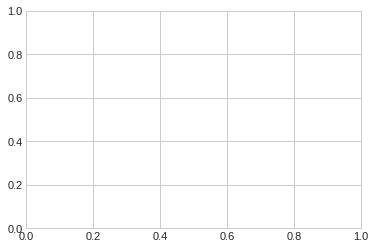

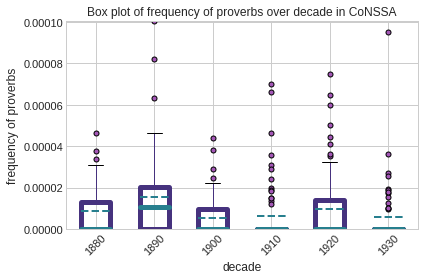

In [88]:
describe_data.boxplots(decade_proverbs_df, "frequency of proverbs","decade",wdir,"CoNSSA",figsize=[6,4])

In [94]:
describe_data.describe_corpus_scatter?

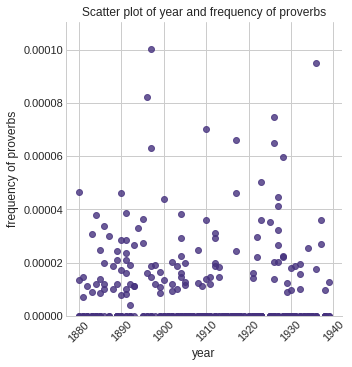

In [93]:
describe_data.describe_corpus_scatter(year_proverbs_df, wdir, "year", "frequency of proverbs", "CoNSSA", do_cull = False,fit_reg=False)


In [90]:
stats.linregress(decade_proverbs_df["decade"], decade_proverbs_df["frequency of proverbs"])

LinregressResult(slope=-7.51701546699971e-08, intercept=0.0001515173474204168, rvalue=-0.07834355219909368, pvalue=0.13902805098451215, stderr=5.069677013253956e-08)

In [119]:
refranario_df.shape

(358, 73)

In [142]:
276108+ refranario_df.shape[1] + dpde_df.shape[1] 

276332

# Classification

In [24]:
i = 0
for corpus_str, corpus_df in corpora_dc.items():
    print(corpus_str)
    rel_corpus_df = corpus_df.loc[:].div(corpus_df.sum(axis='columns'), axis="index")  
    
    results_df = classify.classify(wdir = wdir, freq_table  = rel_corpus_df,
                            metadata = metadata_df,
              classes = labels_lt, verbose = True,
              methods = ["DT", "KNN","LR","SVC",], 
              max_MFFs = [5000], 
              text_representations = ["log","raw","zscores","binary","tfidf"],
              typographies = [True], sampling_mode = "cross", make_relative = False, 
                            under_sample_method = "lpc", sampling_times = 5, outdir_results = wdir,
                                  minimal_value_samples= 7)
    
    results_df["feature_combination"] = corpus_str
    if i == 0:
        total_results_df = results_df.copy()
    else:
        total_results_df = pd.concat([results_df,total_results_df])
        
    i += 1
    total_results_df.to_csv(wdir+"total_results_5000.csv",sep="\t")

tokens
cut_raw_features                 ,         .        de        la         y       que        el  \
ne0001  0.066285  0.053975  0.051024  0.038889  0.037161  0.025920  0.031958   
ne0002  0.090968  0.082397  0.048536  0.035089  0.035930  0.037010  0.018619   
ne0003  0.096230  0.071805  0.044758  0.032398  0.039274  0.040845  0.022705   
ne0004  0.096881  0.074553  0.048042  0.033361  0.034512  0.036185  0.020589   
ne0005  0.088300  0.085647  0.048842  0.029452  0.034519  0.036988  0.018000   

              en         a       los   ...    agradezcan  lloviznando  \
ne0001  0.023512  0.023648  0.014892   ...           0.0          0.0   
ne0002  0.021279  0.021983  0.010162   ...           0.0          0.0   
ne0003  0.020526  0.021534  0.010463   ...           0.0          0.0   
ne0004  0.021125  0.021321  0.009870   ...           0.0          0.0   
ne0005  0.019372  0.018714  0.009457   ...           0.0          0.0   

        aparento  iznayas  azotándose  poniéndolas  pin

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  [',', '.', 'de']
The three last MFWs:  ['bullas', 'exornar', 'macasar']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (78,) (78, 5000) lpc
cross validation sampling of  adventure
(358,)
(358, 5000)
undersampling lpc
undersampled (78,) (78, 5000) lpc
cross validation sampling of  adventure
(358,)
(358, 5000)
undersampling lpc
undersampled (78,) (78, 5000) lpc
cross validation sampling of  adventure
(358,)
(358, 5000)
undersampling lpc
undersampled (78,) (78, 5000) lpc
cross validation sampling of  adventure
(358,)
(358, 5000)
undersampling lpc
undersampled (78,) (78, 5000) lpc
cross validation sampling of  adventure
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=4.578927447460779, pvalue=3.222643012356052e-05)
Class: 	 adventure
Scores:
 	 f1      0.580
rec     0.583
prec    0.597
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.07999

(358,)
(358, 5000)
undersampling lpc
undersampled (78,) (78, 5000) lpc
cross validation sampling of  adventure
(358,)
(358, 5000)
undersampling lpc
undersampled (78,) (78, 5000) lpc
cross validation sampling of  adventure
(358,)
(358, 5000)
undersampling lpc
undersampled (78,) (78, 5000) lpc
cross validation sampling of  adventure
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-inf, pvalue=0.0)
Class: 	 adventure
Scores:
 	 f1      0.0
rec     0.0
prec    0.0
dtype: float64
p-value:  0.0
Baseline: 		 0.5
KNN
-0.5
method used:	 LR
(358,)
(358, 5000)
undersampling lpc
undersampled (78,) (78, 5000) lpc
cross validation sampling of  adventure
(358,)
(358, 5000)
undersampling lpc
undersampled (78,) (78, 5000) lpc
cross validation sampling of  adventure
(358,)
(358, 5000)
undersampling lpc
undersampled (78,) (78, 5000) lpc
cross validation sampling of  adventure
(358,)
(358, 5000)
undersampling lpc
undersampled (78,) (78, 5000) lpc
cross validation sampling of  

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=2.356410161492502, pvalue=0.02249542198505415)
Class: 	 adventure
Scores:
 	 f1      0.554
rec     0.567
prec    0.567
dtype: float64
p-value:  0.0225
Baseline: 		 0.5
LR
0.05400000000000005
method used:	 SVC
(358,)
(358, 4974)
undersampling lpc
undersampled (78,) (78, 4525) lpc
cross validation sampling of  adventure
(358,)
(358, 4974)
undersampling lpc
undersampled (78,) (78, 4540) lpc
cross validation sampling of  adventure
(358,)
(358, 4974)
undersampling lpc
undersampled (78,) (78, 4526) lpc
cross validation sampling of  adventure
(358,)
(358, 4974)
undersampling lpc
undersampled (78,) (78, 4605) lpc
cross validation sampling of  adventure
(358,)
(358, 4974)
undersampling lpc
undersampled (78,) (78, 4553) lpc
cross validation sampling of  adventure
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-2.3726010471514556, pvalue=0.02163261807467906)
Class: 	 adventure
Scores:
 	 f1 

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(357, 9994)
MFW 5000
The three first MFWs:  [',', '.', 'de']
The three last MFWs:  ['piocha', 'macasar', 'embriagarme']
After culling the class antireligous  can't be divided in two groups. This category is going to be ignored
textual representation:  raw
Columns that are empty:  []
(357, 9994)
MFW 5000
The three first MFWs:  [',', '.', 'de']
The three last MFWs:  ['piocha', 'macasar', 'embriagarme']
After culling the class antireligous  can't be divided in two groups. This category is going to be ignored
textual representation:  zscores
Columns that are empty:  []
(357, 9994)
MFW 5000
The three first MFWs:  ['a', 'fue', 'también']
The three last MFWs:  ['enmendando', 'encogiéndome', 'hereditariamente']
After culling the class antireligous  can't be divided in two groups. This category is going to be ignored
textual representation:  binary
Columns that are empty:  []
(357, 9994)
MFW 5000
The three first MFWs:  [',', 'acompañó', '

(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 4329) lpc
cross validation sampling of  autobiographical
(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 4306) lpc
cross validation sampling of  autobiographical
(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 4261) lpc
cross validation sampling of  autobiographical
(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 4269) lpc
cross validation sampling of  autobiographical
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=2.0483639666019244, pvalue=0.04590146276965159)
Class: 	 autobiographical
Scores:
 	 f1      0.603
rec     0.650
prec    0.617
dtype: float64
p-value:  0.0459
Baseline: 		 0.5
SVC
0.10299999999999998
textual representation:  zscores
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  ['a', 'fue', 'también']
The three last MFWs:  ['encubiertos', 'oponemos', 'contrahaciendo']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc

The three first MFWs:  ['—', 'usted', '»']
The three last MFWs:  ['remangaba', 'retrechera', 'picio']
method used:	 DT
(358,)
(358, 4974)
undersampling lpc
undersampled (40,) (40, 4206) lpc
cross validation sampling of  autobiographical
(358,)
(358, 4974)
undersampling lpc
undersampled (40,) (40, 4258) lpc
cross validation sampling of  autobiographical
(358,)
(358, 4974)
undersampling lpc
undersampled (40,) (40, 4246) lpc
cross validation sampling of  autobiographical
(358,)
(358, 4974)
undersampling lpc
undersampled (40,) (40, 4197) lpc
cross validation sampling of  autobiographical
(358,)
(358, 4974)
undersampling lpc
undersampled (40,) (40, 4187) lpc
cross validation sampling of  autobiographical
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=1.036471384384908, pvalue=0.30507035017592926)
Class: 	 autobiographical
Scores:
 	 f1      0.363
rec     0.350
prec    0.417
dtype: float64
p-value:  0.3051
Baseline: 		 0.5
DT
-0.137
method used:	 KNN
(358,)
(358

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  [',', '.', 'de']
The three last MFWs:  ['bullas', 'exornar', 'macasar']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (120,) (120, 5000) lpc
cross validation sampling of  bildungsroman
(358,)
(358, 5000)
undersampling lpc
undersampled (120,) (120, 5000) lpc
cross validation sampling of  bildungsroman
(358,)
(358, 5000)
undersampling lpc
undersampled (120,) (120, 5000) lpc
cross validation sampling of  bildungsroman
(358,)
(358, 5000)
undersampling lpc
undersampled (120,) (120, 5000) lpc
cross validation sampling of  bildungsroman
(358,)
(358, 5000)
undersampling lpc
undersampled (120,) (120, 5000) lpc
cross validation sampling of  bildungsroman
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-0.5427650821212837, pvalue=0.5897519682175607)
Class: 	 bildungsroman
Scores:
 	 f1      0.466
rec     0.450
prec    0.494
dtype: float64
p-value:

(358,)
(358, 5000)
undersampling lpc
undersampled (120,) (120, 5000) lpc
cross validation sampling of  bildungsroman
(358,)
(358, 5000)
undersampling lpc
undersampled (120,) (120, 5000) lpc
cross validation sampling of  bildungsroman
(358,)
(358, 5000)
undersampling lpc
undersampled (120,) (120, 5000) lpc
cross validation sampling of  bildungsroman
(358,)
(358, 5000)
undersampling lpc
undersampled (120,) (120, 5000) lpc
cross validation sampling of  bildungsroman
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-9.993571704694718, pvalue=2.0565902576809574e-13)
Class: 	 bildungsroman
Scores:
 	 f1      0.0
rec     0.0
prec    0.0
dtype: float64
p-value:  0.0
Baseline: 		 0.5
KNN
-0.5
method used:	 LR
(358,)
(358, 5000)
undersampling lpc
undersampled (120,) (120, 5000) lpc
cross validation sampling of  bildungsroman
(358,)
(358, 5000)
undersampling lpc
undersampled (120,) (120, 5000) lpc
cross validation sampling of  bildungsroman
(358,)
(358, 5000)
undersamp

(358,)
(358, 4974)
undersampling lpc
undersampled (120,) (120, 4750) lpc
cross validation sampling of  bildungsroman
(358,)
(358, 4974)
undersampling lpc
undersampled (120,) (120, 4747) lpc
cross validation sampling of  bildungsroman
(358,)
(358, 4974)
undersampling lpc
undersampled (120,) (120, 4771) lpc
cross validation sampling of  bildungsroman
(358,)
(358, 4974)
undersampling lpc
undersampled (120,) (120, 4748) lpc
cross validation sampling of  bildungsroman
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=1.504023400575613, pvalue=0.13899405968930528)
Class: 	 bildungsroman
Scores:
 	 f1      0.472
rec     0.533
prec    0.442
dtype: float64
p-value:  0.139
Baseline: 		 0.5
LR
-0.028000000000000025
method used:	 SVC
(358,)
(358, 4974)
undersampling lpc
undersampled (120,) (120, 4749) lpc
cross validation sampling of  bildungsroman
(358,)
(358, 4974)
undersampling lpc
undersampled (120,) (120, 4745) lpc
cross validation sampling of  bildungsroman
(358,)


/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  [',', '.', 'de']
The three last MFWs:  ['bullas', 'exornar', 'macasar']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (66,) (66, 5000) lpc
cross validation sampling of  comedy
(358,)
(358, 5000)
undersampling lpc
undersampled (66,) (66, 5000) lpc
cross validation sampling of  comedy
(358,)
(358, 5000)
undersampling lpc
undersampled (66,) (66, 5000) lpc
cross validation sampling of  comedy
(358,)
(358, 5000)
undersampling lpc
undersampled (66,) (66, 5000) lpc
cross validation sampling of  comedy
(358,)
(358, 5000)
undersampling lpc
undersampled (66,) (66, 5000) lpc
cross validation sampling of  comedy
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=4.288725904876408, pvalue=8.4130362539745e-05)
Class: 	 comedy
Scores:
 	 f1      0.581
rec     0.600
prec    0.587
dtype: float64
p-value:  0.0001
Baseline: 		 0.5
DT
0.08099999999999996
meth

undersampled (66,) (66, 5000) lpc
cross validation sampling of  comedy
(358,)
(358, 5000)
undersampling lpc
undersampled (66,) (66, 5000) lpc
cross validation sampling of  comedy
(358,)
(358, 5000)
undersampling lpc
undersampled (66,) (66, 5000) lpc
cross validation sampling of  comedy
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-23.743714340723223, pvalue=1.5599375669273456e-28)
Class: 	 comedy
Scores:
 	 f1      0.067
rec     0.100
prec    0.050
dtype: float64
p-value:  0.0
Baseline: 		 0.5
KNN
-0.433
method used:	 LR
(358,)
(358, 5000)
undersampling lpc
undersampled (66,) (66, 5000) lpc
cross validation sampling of  comedy
(358,)
(358, 5000)
undersampling lpc
undersampled (66,) (66, 5000) lpc
cross validation sampling of  comedy
(358,)
(358, 5000)
undersampling lpc
undersampled (66,) (66, 5000) lpc
cross validation sampling of  comedy
(358,)
(358, 5000)
undersampling lpc
undersampled (66,) (66, 5000) lpc
cross validation sampling of  comedy
(358,)
(3

(358,)
(358, 4974)
undersampling lpc
undersampled (66,) (66, 4369) lpc
cross validation sampling of  comedy
(358,)
(358, 4974)
undersampling lpc
undersampled (66,) (66, 4405) lpc
cross validation sampling of  comedy
(358,)
(358, 4974)
undersampling lpc
undersampled (66,) (66, 4415) lpc
cross validation sampling of  comedy
(358,)
(358, 4974)
undersampling lpc
undersampled (66,) (66, 4434) lpc
cross validation sampling of  comedy
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-1.6545729157727291, pvalue=0.10440368255221708)
Class: 	 comedy
Scores:
 	 f1      0.402
rec     0.367
prec    0.492
dtype: float64
p-value:  0.1044
Baseline: 		 0.5
SVC
-0.09799999999999998


analysed class:	 costumbrista
* Culling data
labels done
Counter({'0': 357, '1': 1})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['1', 'n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  ['ne0363']
(358,)

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(357, 10000)
MFW 5000
The three first MFWs:  [',', '.', 'de']
The three last MFWs:  ['fíen', 'importas', 'macasar']
After culling the class costumbrista  can't be divided in two groups. This category is going to be ignored
textual representation:  raw
Columns that are empty:  []
(357, 10000)
MFW 5000
The three first MFWs:  [',', '.', 'de']
The three last MFWs:  ['fáustico', 'extrañara', 'macasar']
After culling the class costumbrista  can't be divided in two groups. This category is going to be ignored
textual representation:  zscores
Columns that are empty:  []
(357, 10000)
MFW 5000
The three first MFWs:  ['a', 'fue', 'también']
The three last MFWs:  ['cruelísimos', 'mochales', 'mantenencia']
After culling the class costumbrista  can't be divided in two groups. This category is going to be ignored
textual representation:  binary
Columns that are empty:  []
(357, 10000)
MFW 5000
The three first MFWs:  [',', 'dureza', 'pasará']
Th

(358,)
(358, 5000)
undersampling lpc
undersampled (18,) (18, 4053) lpc
cross validation sampling of  dialogue
(358,)
(358, 5000)
undersampling lpc
undersampled (18,) (18, 4065) lpc
cross validation sampling of  dialogue
(358,)
(358, 5000)
undersampling lpc
undersampled (18,) (18, 4068) lpc
cross validation sampling of  dialogue
(358,)
(358, 5000)
undersampling lpc
undersampled (18,) (18, 4047) lpc
cross validation sampling of  dialogue
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-0.5477637133497985, pvalue=0.5866223599029226)
Class: 	 dialogue
Scores:
 	 f1      0.444
rec     0.444
prec    0.444
dtype: float64
p-value:  0.5866
Baseline: 		 0.5
KNN
-0.055999999999999994
method used:	 LR
(358,)
(358, 5000)
undersampling lpc
undersampled (18,) (18, 4028) lpc
cross validation sampling of  dialogue
(358,)
(358, 5000)
undersampling lpc
undersampled (18,) (18, 4087) lpc
cross validation sampling of  dialogue
(358,)
(358, 5000)
undersampling lpc
undersampled (1

(358,)
(358, 5000)
undersampling lpc
undersampled (18,) (18, 4080) lpc
cross validation sampling of  dialogue
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=14.768345786413608, pvalue=1.162260324702687e-18)
Class: 	 dialogue
Scores:
 	 f1      0.963
rec     1.000
prec    0.944
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.46299999999999997
method used:	 SVC
(358,)
(358, 5000)
undersampling lpc
undersampled (18,) (18, 4039) lpc
cross validation sampling of  dialogue
(358,)
(358, 5000)
undersampling lpc
undersampled (18,) (18, 4087) lpc
cross validation sampling of  dialogue
(358,)
(358, 5000)
undersampling lpc
undersampled (18,) (18, 4131) lpc
cross validation sampling of  dialogue
(358,)
(358, 5000)
undersampling lpc
undersampled (18,) (18, 4055) lpc
cross validation sampling of  dialogue
(358,)
(358, 5000)
undersampling lpc
undersampled (18,) (18, 4086) lpc
cross validation sampling of  dialogue
result of comparing cross-validation to baseline Ttest_

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  [',', '.', 'de']
The three last MFWs:  ['bullas', 'exornar', 'macasar']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (32,) (32, 5000) lpc
cross validation sampling of  erotic
(358,)
(358, 5000)
undersampling lpc
undersampled (32,) (32, 5000) lpc
cross validation sampling of  erotic
(358,)
(358, 5000)
undersampling lpc
undersampled (32,) (32, 5000) lpc
cross validation sampling of  erotic
(358,)
(358, 5000)
undersampling lpc
undersampled (32,) (32, 5000) lpc
cross validation sampling of  erotic
(358,)
(358, 5000)
undersampling lpc
undersampled (32,) (32, 5000) lpc
cross validation sampling of  erotic
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=1.419344749748782, pvalue=0.16212907162046936)
Class: 	 erotic
Scores:
 	 f1      0.860
rec     0.850
prec    0.933
dtype: float64
p-value:  0.1621
Baseline: 		 0.5
DT
0.36
method used:	 KNN
(

(358,)
(358, 5000)
undersampling lpc
undersampled (32,) (32, 5000) lpc
cross validation sampling of  erotic
(358,)
(358, 5000)
undersampling lpc
undersampled (32,) (32, 5000) lpc
cross validation sampling of  erotic
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-36.50000000000001, pvalue=3.4299661492394573e-37)
Class: 	 erotic
Scores:
 	 f1      0.0
rec     0.0
prec    0.0
dtype: float64
p-value:  0.0
Baseline: 		 0.5
KNN
-0.5
method used:	 LR
(358,)
(358, 5000)
undersampling lpc
undersampled (32,) (32, 5000) lpc
cross validation sampling of  erotic
(358,)
(358, 5000)
undersampling lpc
undersampled (32,) (32, 5000) lpc
cross validation sampling of  erotic
(358,)
(358, 5000)
undersampling lpc
undersampled (32,) (32, 5000) lpc
cross validation sampling of  erotic
(358,)
(358, 5000)
undersampling lpc
undersampled (32,) (32, 5000) lpc
cross validation sampling of  erotic
(358,)
(358, 5000)
undersampling lpc
undersampled (32,) (32, 5000) lpc
cross validation s

(358,)
(358, 4974)
undersampling lpc
undersampled (32,) (32, 4173) lpc
cross validation sampling of  erotic
(358,)
(358, 4974)
undersampling lpc
undersampled (32,) (32, 4187) lpc
cross validation sampling of  erotic
(358,)
(358, 4974)
undersampling lpc
undersampled (32,) (32, 4185) lpc
cross validation sampling of  erotic
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=1.2513073717519938, pvalue=0.21676363139015892)
Class: 	 erotic
Scores:
 	 f1      0.567
rec     0.750
prec    0.467
dtype: float64
p-value:  0.2168
Baseline: 		 0.5
SVC
0.06699999999999995


analysed class:	 fantastic
* Culling data
labels done
Counter({'0': 338, '1': 20})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  20
Labels shape (358,) 
 Data shape (358, 10000)
size after culling data: (358, 10000) (358,)
typography  True


/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  [',', '.', 'de']
The three last MFWs:  ['bullas', 'exornar', 'macasar']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 5000) lpc
cross validation sampling of  fantastic
(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 5000) lpc
cross validation sampling of  fantastic
(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 5000) lpc
cross validation sampling of  fantastic
(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 5000) lpc
cross validation sampling of  fantastic
(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 5000) lpc
cross validation sampling of  fantastic
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=2.246867602546328, pvalue=0.029186851096704505)
Class: 	 fantastic
Scores:
 	 f1      0.437
rec     0.500
prec    0.400
dtype: float64
p-value:  0.0292
Baseline: 		 0.5
DT
-0.06

(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 5000) lpc
cross validation sampling of  fantastic
(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 5000) lpc
cross validation sampling of  fantastic
(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 5000) lpc
cross validation sampling of  fantastic
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-inf, pvalue=0.0)
Class: 	 fantastic
Scores:
 	 f1      0.0
rec     0.0
prec    0.0
dtype: float64
p-value:  0.0
Baseline: 		 0.5
KNN
-0.5
method used:	 LR
(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 5000) lpc
cross validation sampling of  fantastic
(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 5000) lpc
cross validation sampling of  fantastic
(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 5000) lpc
cross validation sampling of  fantastic
(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 5000) lpc
cross validation sampling of  

(358,)
(358, 4974)
undersampling lpc
undersampled (40,) (40, 4280) lpc
cross validation sampling of  fantastic
(358,)
(358, 4974)
undersampling lpc
undersampled (40,) (40, 4243) lpc
cross validation sampling of  fantastic
(358,)
(358, 4974)
undersampling lpc
undersampled (40,) (40, 4284) lpc
cross validation sampling of  fantastic
(358,)
(358, 4974)
undersampling lpc
undersampled (40,) (40, 4248) lpc
cross validation sampling of  fantastic
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-2.7433442395756185, pvalue=0.008472071690749537)
Class: 	 fantastic
Scores:
 	 f1      0.413
rec     0.400
prec    0.467
dtype: float64
p-value:  0.0085
Baseline: 		 0.5
SVC
-0.08700000000000002


analysed class:	 farce
* Culling data
labels done
Counter({'0': 355, '1': 3})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['1', 'n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  ['ne0033

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(355, 9991)
MFW 5000
The three first MFWs:  [',', '.', 'de']
The three last MFWs:  ['antagonistas', 'embrollaban', 'bursátil']
After culling the class farce  can't be divided in two groups. This category is going to be ignored
textual representation:  raw
Columns that are empty:  []
(355, 9991)
MFW 5000
The three first MFWs:  [',', '.', 'de']
The three last MFWs:  ['antagonistas', 'embrollaban', 'bursátil']
After culling the class farce  can't be divided in two groups. This category is going to be ignored
textual representation:  zscores
Columns that are empty:  []
(355, 9991)
MFW 5000
The three first MFWs:  ['a', 'fue', 'también']
The three last MFWs:  ['husmearon', 'engolado', 'defraudaba']
After culling the class farce  can't be divided in two groups. This category is going to be ignored
textual representation:  binary
Columns that are empty:  []
(355, 9991)
MFW 5000
The three first MFWs:  [',', 'asomaban', 'aprovechar']
The t

(358,)
(358, 5000)
undersampling lpc
undersampled (184,) (184, 4934) lpc
cross validation sampling of  historical
(358,)
(358, 5000)
undersampling lpc
undersampled (184,) (184, 4904) lpc
cross validation sampling of  historical
(358,)
(358, 5000)
undersampling lpc
undersampled (184,) (184, 4909) lpc
cross validation sampling of  historical
(358,)
(358, 5000)
undersampling lpc
undersampled (184,) (184, 4924) lpc
cross validation sampling of  historical
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=18.650414009288433, pvalue=6.69627903855572e-24)
Class: 	 historical
Scores:
 	 f1      0.686
rec     0.860
prec    0.576
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
0.18600000000000005
textual representation:  zscores
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  ['a', 'fue', 'también']
The three last MFWs:  ['encubiertos', 'oponemos', 'contrahaciendo']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (184,) (18

(358,)
(358, 4974)
undersampling lpc
undersampled (184,) (184, 4883) lpc
cross validation sampling of  historical
(358,)
(358, 4974)
undersampling lpc
undersampled (184,) (184, 4881) lpc
cross validation sampling of  historical
(358,)
(358, 4974)
undersampling lpc
undersampled (184,) (184, 4888) lpc
cross validation sampling of  historical
(358,)
(358, 4974)
undersampling lpc
undersampled (184,) (184, 4890) lpc
cross validation sampling of  historical
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=13.890807019024818, pvalue=1.2881183743737351e-18)
Class: 	 historical
Scores:
 	 f1      0.696
rec     0.674
prec    0.740
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.19599999999999995
method used:	 KNN
(358,)
(358, 4974)
undersampling lpc
undersampled (184,) (184, 4903) lpc
cross validation sampling of  historical
(358,)
(358, 4974)
undersampling lpc
undersampled (184,) (184, 4891) lpc
cross validation sampling of  historical
(358,)
(358, 4974)
undersamp

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  [',', '.', 'de']
The three last MFWs:  ['bullas', 'exornar', 'macasar']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (104,) (104, 5000) lpc
cross validation sampling of  memoir
(358,)
(358, 5000)
undersampling lpc
undersampled (104,) (104, 5000) lpc
cross validation sampling of  memoir
(358,)
(358, 5000)
undersampling lpc
undersampled (104,) (104, 5000) lpc
cross validation sampling of  memoir
(358,)
(358, 5000)
undersampling lpc
undersampled (104,) (104, 5000) lpc
cross validation sampling of  memoir
(358,)
(358, 5000)
undersampling lpc
undersampled (104,) (104, 5000) lpc
cross validation sampling of  memoir
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=6.035894098541802, pvalue=2.0605648891870647e-07)
Class: 	 memoir
Scores:
 	 f1      0.692
rec     0.710
prec    0.698
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.191999999999

(358,)
(358, 5000)
undersampling lpc
undersampled (104,) (104, 5000) lpc
cross validation sampling of  memoir
(358,)
(358, 5000)
undersampling lpc
undersampled (104,) (104, 5000) lpc
cross validation sampling of  memoir
(358,)
(358, 5000)
undersampling lpc
undersampled (104,) (104, 5000) lpc
cross validation sampling of  memoir
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-10.161960162810486, pvalue=1.1777863234296668e-13)
Class: 	 memoir
Scores:
 	 f1      0.0
rec     0.0
prec    0.0
dtype: float64
p-value:  0.0
Baseline: 		 0.5
KNN
-0.5
method used:	 LR
(358,)
(358, 5000)
undersampling lpc
undersampled (104,) (104, 5000) lpc
cross validation sampling of  memoir
(358,)
(358, 5000)
undersampling lpc
undersampled (104,) (104, 5000) lpc
cross validation sampling of  memoir
(358,)
(358, 5000)
undersampling lpc
undersampled (104,) (104, 5000) lpc
cross validation sampling of  memoir
(358,)
(358, 5000)
undersampling lpc
undersampled (104,) (104, 5000) lpc
cro

(358,)
(358, 4974)
undersampling lpc
undersampled (104,) (104, 4633) lpc
cross validation sampling of  memoir
(358,)
(358, 4974)
undersampling lpc
undersampled (104,) (104, 4669) lpc
cross validation sampling of  memoir
(358,)
(358, 4974)
undersampling lpc
undersampled (104,) (104, 4656) lpc
cross validation sampling of  memoir
(358,)
(358, 4974)
undersampling lpc
undersampled (104,) (104, 4607) lpc
cross validation sampling of  memoir
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=4.247486129379152, pvalue=9.624493364387056e-05)
Class: 	 memoir
Scores:
 	 f1      0.642
rec     0.770
prec    0.561
dtype: float64
p-value:  0.0001
Baseline: 		 0.5
SVC
0.14200000000000002


analysed class:	 modernist
* Culling data
labels done
Counter({'0': 323, '1': 35})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  35
Labels shape (358,) 
 Data shape (358, 10000)
size after culling data: (358, 10000) (358,)
typography  True


/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  [',', '.', 'de']
The three last MFWs:  ['bullas', 'exornar', 'macasar']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (70,) (70, 5000) lpc
cross validation sampling of  modernist
(358,)
(358, 5000)
undersampling lpc
undersampled (70,) (70, 5000) lpc
cross validation sampling of  modernist
(358,)
(358, 5000)
undersampling lpc
undersampled (70,) (70, 5000) lpc
cross validation sampling of  modernist
(358,)
(358, 5000)
undersampling lpc
undersampled (70,) (70, 5000) lpc
cross validation sampling of  modernist
(358,)
(358, 5000)
undersampling lpc
undersampled (70,) (70, 5000) lpc
cross validation sampling of  modernist
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=2.0923544849906777, pvalue=0.04160923117855693)
Class: 	 modernist
Scores:
 	 f1      0.505
rec     0.483
prec    0.548
dtype: float64
p-value:  0.0416
Baseline: 		 0.5
DT
0.005

(358,)
(358, 5000)
undersampling lpc
undersampled (70,) (70, 5000) lpc
cross validation sampling of  modernist
(358,)
(358, 5000)
undersampling lpc
undersampled (70,) (70, 5000) lpc
cross validation sampling of  modernist
(358,)
(358, 5000)
undersampling lpc
undersampled (70,) (70, 5000) lpc
cross validation sampling of  modernist
(358,)
(358, 5000)
undersampling lpc
undersampled (70,) (70, 5000) lpc
cross validation sampling of  modernist
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-inf, pvalue=0.0)
Class: 	 modernist
Scores:
 	 f1      0.0
rec     0.0
prec    0.0
dtype: float64
p-value:  0.0
Baseline: 		 0.5
KNN
-0.5
method used:	 LR
(358,)
(358, 5000)
undersampling lpc
undersampled (70,) (70, 5000) lpc
cross validation sampling of  modernist
(358,)
(358, 5000)
undersampling lpc
undersampled (70,) (70, 5000) lpc
cross validation sampling of  modernist
(358,)
(358, 5000)
undersampling lpc
undersampled (70,) (70, 5000) lpc
cross validation sampling of  

(358,)
(358, 4974)
undersampling lpc
undersampled (70,) (70, 4361) lpc
cross validation sampling of  modernist
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=1.9960646866176024, pvalue=0.0515000293276655)
Class: 	 modernist
Scores:
 	 f1      0.498
rec     0.608
prec    0.460
dtype: float64
p-value:  0.0515
Baseline: 		 0.5
LR
-0.0020000000000000018
method used:	 SVC
(358,)
(358, 4974)
undersampling lpc
undersampled (70,) (70, 4368) lpc
cross validation sampling of  modernist
(358,)
(358, 4974)
undersampling lpc
undersampled (70,) (70, 4388) lpc
cross validation sampling of  modernist
(358,)
(358, 4974)
undersampling lpc
undersampled (70,) (70, 4430) lpc
cross validation sampling of  modernist
(358,)
(358, 4974)
undersampling lpc
undersampled (70,) (70, 4404) lpc
cross validation sampling of  modernist
(358,)
(358, 4974)
undersampling lpc
undersampled (70,) (70, 4399) lpc
cross validation sampling of  modernist
result of comparing cross-validation to basel

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  [',', '.', 'de']
The three last MFWs:  ['bullas', 'exornar', 'macasar']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (54,) (54, 5000) lpc
cross validation sampling of  moralist
(358,)
(358, 5000)
undersampling lpc
undersampled (54,) (54, 5000) lpc
cross validation sampling of  moralist
(358,)
(358, 5000)
undersampling lpc
undersampled (54,) (54, 5000) lpc
cross validation sampling of  moralist
(358,)
(358, 5000)
undersampling lpc
undersampled (54,) (54, 5000) lpc
cross validation sampling of  moralist
(358,)
(358, 5000)
undersampling lpc
undersampled (54,) (54, 5000) lpc
cross validation sampling of  moralist
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=2.6730590221496024, pvalue=0.010180570470642504)
Class: 	 moralist
Scores:
 	 f1      0.571
rec     0.567
prec    0.667
dtype: float64
p-value:  0.0102
Baseline: 		 0.5
DT
0.07099999

(358,)
(358, 5000)
undersampling lpc
undersampled (54,) (54, 5000) lpc
cross validation sampling of  moralist
(358,)
(358, 5000)
undersampling lpc
undersampled (54,) (54, 5000) lpc
cross validation sampling of  moralist
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-8.35902836836662, pvalue=5.4257409971665025e-11)
Class: 	 moralist
Scores:
 	 f1      0.667
rec     1.000
prec    0.500
dtype: float64
p-value:  0.0
Baseline: 		 0.5
KNN
0.16700000000000004
method used:	 LR
(358,)
(358, 5000)
undersampling lpc
undersampled (54,) (54, 5000) lpc
cross validation sampling of  moralist
(358,)
(358, 5000)
undersampling lpc
undersampled (54,) (54, 5000) lpc
cross validation sampling of  moralist
(358,)
(358, 5000)
undersampling lpc
undersampled (54,) (54, 5000) lpc
cross validation sampling of  moralist
(358,)
(358, 5000)
undersampling lpc
undersampled (54,) (54, 5000) lpc
cross validation sampling of  moralist
(358,)
(358, 5000)
undersampling lpc
undersampled (54,)

(358,)
(358, 4974)
undersampling lpc
undersampled (54,) (54, 4407) lpc
cross validation sampling of  moralist
(358,)
(358, 4974)
undersampling lpc
undersampled (54,) (54, 4331) lpc
cross validation sampling of  moralist
(358,)
(358, 4974)
undersampling lpc
undersampled (54,) (54, 4348) lpc
cross validation sampling of  moralist
(358,)
(358, 4974)
undersampling lpc
undersampled (54,) (54, 4403) lpc
cross validation sampling of  moralist
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=7.715886349164061, pvalue=5.207409708887887e-10)
Class: 	 moralist
Scores:
 	 f1      0.638
rec     0.817
prec    0.532
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
0.138


analysed class:	 naturalist
* Culling data
labels done
Counter({'0': 280, '1': 78})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  78
Labels shape (358,) 
 Data shape (358, 10000)
size after culling data: (358, 10000) (358,)
typography  True


/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  [',', '.', 'de']
The three last MFWs:  ['bullas', 'exornar', 'macasar']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (156,) (156, 5000) lpc
cross validation sampling of  naturalist
(358,)
(358, 5000)
undersampling lpc
undersampled (156,) (156, 5000) lpc
cross validation sampling of  naturalist
(358,)
(358, 5000)
undersampling lpc
undersampled (156,) (156, 5000) lpc
cross validation sampling of  naturalist
(358,)
(358, 5000)
undersampling lpc
undersampled (156,) (156, 5000) lpc
cross validation sampling of  naturalist
(358,)
(358, 5000)
undersampling lpc
undersampled (156,) (156, 5000) lpc
cross validation sampling of  naturalist
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=5.583570121631197, pvalue=1.018367533467477e-06)
Class: 	 naturalist
Scores:
 	 f1      0.600
rec     0.602
prec    0.615
dtype: float64
p-value:  0.0
Baseline: 	

(358,)
(358, 5000)
undersampling lpc
undersampled (156,) (156, 5000) lpc
cross validation sampling of  naturalist
(358,)
(358, 5000)
undersampling lpc
undersampled (156,) (156, 5000) lpc
cross validation sampling of  naturalist
(358,)
(358, 5000)
undersampling lpc
undersampled (156,) (156, 5000) lpc
cross validation sampling of  naturalist
(358,)
(358, 5000)
undersampling lpc
undersampled (156,) (156, 5000) lpc
cross validation sampling of  naturalist
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-1.42423535210728, pvalue=0.16071600887532417)
Class: 	 naturalist
Scores:
 	 f1      0.670
rec     1.000
prec    0.504
dtype: float64
p-value:  0.1607
Baseline: 		 0.5
KNN
0.17000000000000004
method used:	 LR
(358,)
(358, 5000)
undersampling lpc
undersampled (156,) (156, 5000) lpc
cross validation sampling of  naturalist
(358,)
(358, 5000)
undersampling lpc
undersampled (156,) (156, 5000) lpc
cross validation sampling of  naturalist
(358,)
(358, 5000)
undersampl

(358,)
(358, 4974)
undersampling lpc
undersampled (156,) (156, 4857) lpc
cross validation sampling of  naturalist
(358,)
(358, 4974)
undersampling lpc
undersampled (156,) (156, 4828) lpc
cross validation sampling of  naturalist
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=5.652008784388812, pvalue=8.005867589111191e-07)
Class: 	 naturalist
Scores:
 	 f1      0.609
rec     0.643
prec    0.587
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.10899999999999999
method used:	 SVC
(358,)
(358, 4974)
undersampling lpc
undersampled (156,) (156, 4817) lpc
cross validation sampling of  naturalist
(358,)
(358, 4974)
undersampling lpc
undersampled (156,) (156, 4825) lpc
cross validation sampling of  naturalist
(358,)
(358, 4974)
undersampling lpc
undersampled (156,) (156, 4808) lpc
cross validation sampling of  naturalist
(358,)
(358, 4974)
undersampling lpc
undersampled (156,) (156, 4831) lpc
cross validation sampling of  naturalist
(358,)
(358, 4974)
undersampli

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  [',', '.', 'de']
The three last MFWs:  ['bullas', 'exornar', 'macasar']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (176,) (176, 5000) lpc
cross validation sampling of  philosophical
(358,)
(358, 5000)
undersampling lpc
undersampled (176,) (176, 5000) lpc
cross validation sampling of  philosophical
(358,)
(358, 5000)
undersampling lpc
undersampled (176,) (176, 5000) lpc
cross validation sampling of  philosophical
(358,)
(358, 5000)
undersampling lpc
undersampled (176,) (176, 5000) lpc
cross validation sampling of  philosophical
(358,)
(358, 5000)
undersampling lpc
undersampled (176,) (176, 5000) lpc
cross validation sampling of  philosophical
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=3.4489321204884575, pvalue=0.0011661794194944416)
Class: 	 philosophical
Scores:
 	 f1      0.564
rec     0.569
prec    0.566
dtype: float64
p-valu

(358,)
(358, 5000)
undersampling lpc
undersampled (176,) (176, 5000) lpc
cross validation sampling of  philosophical
(358,)
(358, 5000)
undersampling lpc
undersampled (176,) (176, 5000) lpc
cross validation sampling of  philosophical
(358,)
(358, 5000)
undersampling lpc
undersampled (176,) (176, 5000) lpc
cross validation sampling of  philosophical
(358,)
(358, 5000)
undersampling lpc
undersampled (176,) (176, 5000) lpc
cross validation sampling of  philosophical
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-5.901514688647813, pvalue=3.317931953045129e-07)
Class: 	 philosophical
Scores:
 	 f1      0.020
rec     0.011
prec    0.100
dtype: float64
p-value:  0.0
Baseline: 		 0.5
KNN
-0.48
method used:	 LR
(358,)
(358, 5000)
undersampling lpc
undersampled (176,) (176, 5000) lpc
cross validation sampling of  philosophical
(358,)
(358, 5000)
undersampling lpc
undersampled (176,) (176, 5000) lpc
cross validation sampling of  philosophical
(358,)
(358, 5000)
und

(358,)
(358, 4974)
undersampling lpc
undersampled (176,) (176, 4892) lpc
cross validation sampling of  philosophical
(358,)
(358, 4974)
undersampling lpc
undersampled (176,) (176, 4863) lpc
cross validation sampling of  philosophical
(358,)
(358, 4974)
undersampling lpc
undersampled (176,) (176, 4851) lpc
cross validation sampling of  philosophical
(358,)
(358, 4974)
undersampling lpc
undersampled (176,) (176, 4874) lpc
cross validation sampling of  philosophical
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=3.422542884285566, pvalue=0.0012611942848697278)
Class: 	 philosophical
Scores:
 	 f1      0.556
rec     0.556
prec    0.563
dtype: float64
p-value:  0.0013
Baseline: 		 0.5
LR
0.05600000000000005
method used:	 SVC
(358,)
(358, 4974)
undersampling lpc
undersampled (176,) (176, 4866) lpc
cross validation sampling of  philosophical
(358,)
(358, 4974)
undersampling lpc
undersampled (176,) (176, 4869) lpc
cross validation sampling of  philosophical
(358,)

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  [',', '.', 'de']
The three last MFWs:  ['bullas', 'exornar', 'macasar']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  political-fiction
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  political-fiction
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  political-fiction
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  political-fiction
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  political-fiction
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-0.40287280414024484, pvalue=0.6887942106277454)
Class: 	 political-fiction
Scores:
 	 f1      0.473
rec     0.550
prec    0.433
dtype: f

(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  political-fiction
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  political-fiction
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  political-fiction
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  political-fiction
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-25.36242504506749, pvalue=7.820649718701136e-30)
Class: 	 political-fiction
Scores:
 	 f1      0.0
rec     0.0
prec    0.0
dtype: float64
p-value:  0.0
Baseline: 		 0.5
KNN
-0.5
method used:	 LR
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  political-fiction
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  political-fiction
(358,)
(358, 

undersampled (26,) (26, 4088) lpc
cross validation sampling of  political-fiction
(358,)
(358, 4974)
undersampling lpc
undersampled (26,) (26, 4157) lpc
cross validation sampling of  political-fiction
(358,)
(358, 4974)
undersampling lpc
undersampled (26,) (26, 4149) lpc
cross validation sampling of  political-fiction
(358,)
(358, 4974)
undersampling lpc
undersampled (26,) (26, 4198) lpc
cross validation sampling of  political-fiction
(358,)
(358, 4974)
undersampling lpc
undersampled (26,) (26, 4154) lpc
cross validation sampling of  political-fiction
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-3.618539366364385, pvalue=0.0007000854945305317)
Class: 	 political-fiction
Scores:
 	 f1      0.333
rec     0.350
prec    0.350
dtype: float64
p-value:  0.0007
Baseline: 		 0.5
LR
-0.16699999999999998
method used:	 SVC
(358,)
(358, 4974)
undersampling lpc
undersampled (26,) (26, 4171) lpc
cross validation sampling of  political-fiction
(358,)
(358, 4974)
unders

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  [',', '.', 'de']
The three last MFWs:  ['bullas', 'exornar', 'macasar']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  psicological
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  psicological
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  psicological
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  psicological
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  psicological
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=0.6476340453105468, pvalue=0.5202446745784174)
Class: 	 psicological
Scores:
 	 f1      0.25
rec     0.30
prec    0.25
dtype: float64
p-value:  0.5202
Baseline: 	

(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  psicological
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  psicological
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  psicological
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  psicological
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-25.36242504506749, pvalue=7.820649718701136e-30)
Class: 	 psicological
Scores:
 	 f1      0.0
rec     0.0
prec    0.0
dtype: float64
p-value:  0.0
Baseline: 		 0.5
KNN
-0.5
method used:	 LR
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  psicological
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  psicological
(358,)
(358, 5000)
undersampling lpc
undersample

undersampled (26,) (26, 4064) lpc
cross validation sampling of  psicological
(358,)
(358, 4974)
undersampling lpc
undersampled (26,) (26, 4026) lpc
cross validation sampling of  psicological
(358,)
(358, 4974)
undersampling lpc
undersampled (26,) (26, 4064) lpc
cross validation sampling of  psicological
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-3.0536505211791334, pvalue=0.003648947223839656)
Class: 	 psicological
Scores:
 	 f1      0.347
rec     0.500
prec    0.267
dtype: float64
p-value:  0.0036
Baseline: 		 0.5
LR
-0.15300000000000002
method used:	 SVC
(358,)
(358, 4974)
undersampling lpc
undersampled (26,) (26, 4066) lpc
cross validation sampling of  psicological
(358,)
(358, 4974)
undersampling lpc
undersampled (26,) (26, 4039) lpc
cross validation sampling of  psicological
(358,)
(358, 4974)
undersampling lpc
undersampled (26,) (26, 4036) lpc
cross validation sampling of  psicological
(358,)
(358, 4974)
undersampling lpc
undersampled (26,) (26,

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  [',', '.', 'de']
The three last MFWs:  ['bullas', 'exornar', 'macasar']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (276,) (276, 5000) lpc
cross validation sampling of  realist
(358,)
(358, 5000)
undersampling lpc
undersampled (276,) (276, 5000) lpc
cross validation sampling of  realist
(358,)
(358, 5000)
undersampling lpc
undersampled (276,) (276, 5000) lpc
cross validation sampling of  realist
(358,)
(358, 5000)
undersampling lpc
undersampled (276,) (276, 5000) lpc
cross validation sampling of  realist
(358,)
(358, 5000)
undersampling lpc
undersampled (276,) (276, 5000) lpc
cross validation sampling of  realist
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=8.487822099545228, pvalue=3.463006543942893e-11)
Class: 	 realist
Scores:
 	 f1      0.641
rec     0.629
prec    0.657
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.1410000

(358,)
(358, 5000)
undersampling lpc
undersampled (276,) (276, 5000) lpc
cross validation sampling of  realist
(358,)
(358, 5000)
undersampling lpc
undersampled (276,) (276, 5000) lpc
cross validation sampling of  realist
(358,)
(358, 5000)
undersampling lpc
undersampled (276,) (276, 5000) lpc
cross validation sampling of  realist
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=15.575996140299786, pvalue=1.3030273014877837e-20)
Class: 	 realist
Scores:
 	 f1      0.583
rec     0.768
prec    0.473
dtype: float64
p-value:  0.0
Baseline: 		 0.5
KNN
0.08299999999999996
method used:	 LR
(358,)
(358, 5000)
undersampling lpc
undersampled (276,) (276, 5000) lpc
cross validation sampling of  realist
(358,)
(358, 5000)
undersampling lpc
undersampled (276,) (276, 5000) lpc
cross validation sampling of  realist
(358,)
(358, 5000)
undersampling lpc
undersampled (276,) (276, 5000) lpc
cross validation sampling of  realist
(358,)
(358, 5000)
undersampling lpc
undersampled

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=3.8566822099721305, pvalue=0.0003355778640962855)
Class: 	 realist
Scores:
 	 f1      0.534
rec     0.544
prec    0.531
dtype: float64
p-value:  0.0003
Baseline: 		 0.5
LR
0.03400000000000003
method used:	 SVC
(358,)
(358, 4974)
undersampling lpc
undersampled (276,) (276, 4949) lpc
cross validation sampling of  realist
(358,)
(358, 4974)
undersampling lpc
undersampled (276,) (276, 4937) lpc
cross validation sampling of  realist
(358,)
(358, 4974)
undersampling lpc
undersampled (276,) (276, 4955) lpc
cross validation sampling of  realist
(358,)
(358, 4974)
undersampling lpc
undersampled (276,) (276, 4947) lpc
cross validation sampling of  realist
(358,)
(358, 4974)
undersampling lpc
undersampled (276,) (276, 4946) lpc
cross validation sampling of  realist
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=14.14163498330374, pvalue=6.363207696081209e-19)
Class: 	 realist
Scores:
 	 f1  

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(356, 9998)
MFW 5000
The three first MFWs:  [',', '.', 'de']
The three last MFWs:  ['importen', 'cauterización', 'piocha']
After culling the class religious  can't be divided in two groups. This category is going to be ignored
textual representation:  raw
Columns that are empty:  []
(356, 9998)
MFW 5000
The three first MFWs:  [',', '.', 'de']
The three last MFWs:  ['fíen', 'cauterización', 'piocha']
After culling the class religious  can't be divided in two groups. This category is going to be ignored
textual representation:  zscores
Columns that are empty:  []
(356, 9998)
MFW 5000
The three first MFWs:  ['a', 'fue', 'también']
The three last MFWs:  ['caldeo', 'escabullían', 'encajo']
After culling the class religious  can't be divided in two groups. This category is going to be ignored
textual representation:  binary
Columns that are empty:  []
(356, 9998)
MFW 5000
The three first MFWs:  [',', 'cobrar', 'cierra']
The three last 

(358,)
(358, 5000)
undersampling lpc
undersampled (352,) (352, 4997) lpc
cross validation sampling of  sentimental
(358,)
(358, 5000)
undersampling lpc
undersampled (352,) (352, 5000) lpc
cross validation sampling of  sentimental
(358,)
(358, 5000)
undersampling lpc
undersampled (352,) (352, 5000) lpc
cross validation sampling of  sentimental
(358,)
(358, 5000)
undersampling lpc
undersampled (352,) (352, 4999) lpc
cross validation sampling of  sentimental
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-2.442299938296054, pvalue=0.018247858784716176)
Class: 	 sentimental
Scores:
 	 f1      0.461
rec     0.369
prec    0.680
dtype: float64
p-value:  0.0182
Baseline: 		 0.5
KNN
-0.03899999999999998
method used:	 LR
(358,)
(358, 5000)
undersampling lpc
undersampled (352,) (352, 4999) lpc
cross validation sampling of  sentimental
(358,)
(358, 5000)
undersampling lpc
undersampled (352,) (352, 5000) lpc
cross validation sampling of  sentimental
(358,)
(358, 5000)


(358,)
(358, 5000)
undersampling lpc
undersampled (352,) (352, 5000) lpc
cross validation sampling of  sentimental
(358,)
(358, 5000)
undersampling lpc
undersampled (352,) (352, 5000) lpc
cross validation sampling of  sentimental
(358,)
(358, 5000)
undersampling lpc
undersampled (352,) (352, 5000) lpc
cross validation sampling of  sentimental
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=14.957865480679722, pvalue=6.758165476713688e-20)
Class: 	 sentimental
Scores:
 	 f1      0.680
rec     0.706
prec    0.668
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.18000000000000005
method used:	 SVC
(358,)
(358, 5000)
undersampling lpc
undersampled (352,) (352, 4996) lpc
cross validation sampling of  sentimental
(358,)
(358, 5000)
undersampling lpc
undersampled (352,) (352, 4999) lpc
cross validation sampling of  sentimental
(358,)
(358, 5000)
undersampling lpc
undersampled (352,) (352, 5000) lpc
cross validation sampling of  sentimental
(358,)
(358, 5000)
und

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  [',', '.', 'de']
The three last MFWs:  ['bullas', 'exornar', 'macasar']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (356,) (356, 5000) lpc
cross validation sampling of  social
(358,)
(358, 5000)
undersampling lpc
undersampled (356,) (356, 5000) lpc
cross validation sampling of  social
(358,)
(358, 5000)
undersampling lpc
undersampled (356,) (356, 5000) lpc
cross validation sampling of  social
(358,)
(358, 5000)
undersampling lpc
undersampled (356,) (356, 5000) lpc
cross validation sampling of  social
(358,)
(358, 5000)
undersampling lpc
undersampled (356,) (356, 5000) lpc
cross validation sampling of  social
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=3.8595835452213145, pvalue=0.00033254242853923076)
Class: 	 social
Scores:
 	 f1      0.533
rec     0.527
prec    0.543
dtype: float64
p-value:  0.0003
Baseline: 		 0.5
DT
0.03300000

(358,)
(358, 5000)
undersampling lpc
undersampled (356,) (356, 5000) lpc
cross validation sampling of  social
(358,)
(358, 5000)
undersampling lpc
undersampled (356,) (356, 5000) lpc
cross validation sampling of  social
(358,)
(358, 5000)
undersampling lpc
undersampled (356,) (356, 5000) lpc
cross validation sampling of  social
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-inf, pvalue=0.0)
Class: 	 social
Scores:
 	 f1      0.0
rec     0.0
prec    0.0
dtype: float64
p-value:  0.0
Baseline: 		 0.5
KNN
-0.5
method used:	 LR
(358,)
(358, 5000)
undersampling lpc
undersampled (356,) (356, 5000) lpc
cross validation sampling of  social
(358,)
(358, 5000)
undersampling lpc
undersampled (356,) (356, 5000) lpc
cross validation sampling of  social
(358,)
(358, 5000)
undersampling lpc
undersampled (356,) (356, 5000) lpc
cross validation sampling of  social
(358,)
(358, 5000)
undersampling lpc
undersampled (356,) (356, 5000) lpc
cross validation sampling of  social


(358,)
(358, 4974)
undersampling lpc
undersampled (356,) (356, 4973) lpc
cross validation sampling of  social
(358,)
(358, 4974)
undersampling lpc
undersampled (356,) (356, 4974) lpc
cross validation sampling of  social
(358,)
(358, 4974)
undersampling lpc
undersampled (356,) (356, 4972) lpc
cross validation sampling of  social
(358,)
(358, 4974)
undersampling lpc
undersampled (356,) (356, 4972) lpc
cross validation sampling of  social
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-5.008276779806986, pvalue=7.5195276361585405e-06)
Class: 	 social
Scores:
 	 f1      0.392
rec     0.381
prec    0.451
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
-0.10799999999999998


analysed class:	 spiritual
* Culling data
labels done
Counter({'0': 327, '1': 31})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  31
Labels shape (358,) 
 Data shape (358, 10000)
size after culling data: (358, 10000) (358,)
typography  True


/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  [',', '.', 'de']
The three last MFWs:  ['bullas', 'exornar', 'macasar']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (62,) (62, 5000) lpc
cross validation sampling of  spiritual
(358,)
(358, 5000)
undersampling lpc
undersampled (62,) (62, 5000) lpc
cross validation sampling of  spiritual
(358,)
(358, 5000)
undersampling lpc
undersampled (62,) (62, 5000) lpc
cross validation sampling of  spiritual
(358,)
(358, 5000)
undersampling lpc
undersampled (62,) (62, 5000) lpc
cross validation sampling of  spiritual
(358,)
(358, 5000)
undersampling lpc
undersampled (62,) (62, 5000) lpc
cross validation sampling of  spiritual
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=3.1683277932460165, pvalue=0.0026403705411104255)
Class: 	 spiritual
Scores:
 	 f1      0.576
rec     0.617
prec    0.567
dtype: float64
p-value:  0.0026
Baseline: 		 0.5
DT
0.0

(358,)
(358, 5000)
undersampling lpc
undersampled (62,) (62, 5000) lpc
cross validation sampling of  spiritual
(358,)
(358, 5000)
undersampling lpc
undersampled (62,) (62, 5000) lpc
cross validation sampling of  spiritual
(358,)
(358, 5000)
undersampling lpc
undersampled (62,) (62, 5000) lpc
cross validation sampling of  spiritual
(358,)
(358, 5000)
undersampling lpc
undersampled (62,) (62, 5000) lpc
cross validation sampling of  spiritual
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-4.840584038881737, pvalue=1.3334708986615274e-05)
Class: 	 spiritual
Scores:
 	 f1      0.067
rec     0.100
prec    0.050
dtype: float64
p-value:  0.0
Baseline: 		 0.5
KNN
-0.433
method used:	 LR
(358,)
(358, 5000)
undersampling lpc
undersampled (62,) (62, 5000) lpc
cross validation sampling of  spiritual
(358,)
(358, 5000)
undersampling lpc
undersampled (62,) (62, 5000) lpc
cross validation sampling of  spiritual
(358,)
(358, 5000)
undersampling lpc
undersampled (62,) (62,

(358,)
(358, 4974)
undersampling lpc
undersampled (62,) (62, 4425) lpc
cross validation sampling of  spiritual
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=2.4165712487357935, pvalue=0.019437343654436032)
Class: 	 spiritual
Scores:
 	 f1      0.582
rec     0.650
prec    0.578
dtype: float64
p-value:  0.0194
Baseline: 		 0.5
LR
0.08199999999999996
method used:	 SVC
(358,)
(358, 4974)
undersampling lpc
undersampled (62,) (62, 4434) lpc
cross validation sampling of  spiritual
(358,)
(358, 4974)
undersampling lpc
undersampled (62,) (62, 4436) lpc
cross validation sampling of  spiritual
(358,)
(358, 4974)
undersampling lpc
undersampled (62,) (62, 4458) lpc
cross validation sampling of  spiritual
(358,)
(358, 4974)
undersampling lpc
undersampled (62,) (62, 4451) lpc
cross validation sampling of  spiritual
(358,)
(358, 4974)
undersampling lpc
undersampled (62,) (62, 4458) lpc
cross validation sampling of  spiritual
result of comparing cross-validation to baseli

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  [',', '.', 'de']
The three last MFWs:  ['bullas', 'exornar', 'macasar']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (42,) (42, 5000) lpc
cross validation sampling of  symbolic
(358,)
(358, 5000)
undersampling lpc
undersampled (42,) (42, 5000) lpc
cross validation sampling of  symbolic
(358,)
(358, 5000)
undersampling lpc
undersampled (42,) (42, 5000) lpc
cross validation sampling of  symbolic
(358,)
(358, 5000)
undersampling lpc
undersampled (42,) (42, 5000) lpc
cross validation sampling of  symbolic
(358,)
(358, 5000)
undersampling lpc
undersampled (42,) (42, 5000) lpc
cross validation sampling of  symbolic
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-0.3382351654270595, pvalue=0.7366309607364924)
Class: 	 symbolic
Scores:
 	 f1      0.654
rec     0.667
prec    0.717
dtype: float64
p-value:  0.7366
Baseline: 		 0.5
DT
0.154000000

(358,)
(358, 5000)
undersampling lpc
undersampled (42,) (42, 5000) lpc
cross validation sampling of  symbolic
(358,)
(358, 5000)
undersampling lpc
undersampled (42,) (42, 5000) lpc
cross validation sampling of  symbolic
(358,)
(358, 5000)
undersampling lpc
undersampled (42,) (42, 5000) lpc
cross validation sampling of  symbolic
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-18.633179439276063, pvalue=6.968250389776227e-24)
Class: 	 symbolic
Scores:
 	 f1      0.05
rec     0.05
prec    0.05
dtype: float64
p-value:  0.0
Baseline: 		 0.5
KNN
-0.45
method used:	 LR
(358,)
(358, 5000)
undersampling lpc
undersampled (42,) (42, 5000) lpc
cross validation sampling of  symbolic
(358,)
(358, 5000)
undersampling lpc
undersampled (42,) (42, 5000) lpc
cross validation sampling of  symbolic
(358,)
(358, 5000)
undersampling lpc
undersampled (42,) (42, 5000) lpc
cross validation sampling of  symbolic
(358,)
(358, 5000)
undersampling lpc
undersampled (42,) (42, 5000) lpc


(358,)
(358, 4974)
undersampling lpc
undersampled (42,) (42, 4282) lpc
cross validation sampling of  symbolic
(358,)
(358, 4974)
undersampling lpc
undersampled (42,) (42, 4223) lpc
cross validation sampling of  symbolic
(358,)
(358, 4974)
undersampling lpc
undersampled (42,) (42, 4259) lpc
cross validation sampling of  symbolic
(358,)
(358, 4974)
undersampling lpc
undersampled (42,) (42, 4214) lpc
cross validation sampling of  symbolic
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=0.767509740778546, pvalue=0.44646126187818025)
Class: 	 symbolic
Scores:
 	 f1      0.619
rec     0.700
prec    0.592
dtype: float64
p-value:  0.4465
Baseline: 		 0.5
SVC
0.119


analysed class:	 vanguardist
* Culling data
labels done
Counter({'0': 355, '1': 3})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['1', 'n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  ['ne0137', 'ne0380', 'ne0

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(355, 9997)
MFW 5000
The three first MFWs:  [',', '.', 'de']
The three last MFWs:  ['indocto', 'piocha', 'resinosos']
After culling the class vanguardist  can't be divided in two groups. This category is going to be ignored
textual representation:  raw
Columns that are empty:  []
(355, 9997)
MFW 5000
The three first MFWs:  [',', '.', 'de']
The three last MFWs:  ['indocto', 'piocha', 'resinosos']
After culling the class vanguardist  can't be divided in two groups. This category is going to be ignored
textual representation:  zscores
Columns that are empty:  []
(355, 9997)
MFW 5000
The three first MFWs:  ['a', 'fue', 'también']
The three last MFWs:  ['pellico', 'ingería', 'encaminarla']
After culling the class vanguardist  can't be divided in two groups. This category is going to be ignored
textual representation:  binary
Columns that are empty:  []
(355, 9997)
MFW 5000
The three first MFWs:  [',', 'conserva', 'reunidos']
The three

(358,)
(358, 5000)
undersampling lpc
undersampled (42,) (42, 4267) lpc
cross validation sampling of  war-novel
(358,)
(358, 5000)
undersampling lpc
undersampled (42,) (42, 4282) lpc
cross validation sampling of  war-novel
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=5.90683931928578, pvalue=3.255967786938328e-07)
Class: 	 war-novel
Scores:
 	 f1      0.565
rec     0.650
prec    0.560
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
0.06499999999999995
textual representation:  zscores
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  ['a', 'fue', 'también']
The three last MFWs:  ['encubiertos', 'oponemos', 'contrahaciendo']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (42,) (42, 5000) lpc
cross validation sampling of  war-novel
(358,)
(358, 5000)
undersampling lpc
undersampled (42,) (42, 5000) lpc
cross validation sampling of  war-novel
(358,)
(358, 5000)
undersampling lpc
undersampled (42,) (42, 5000) lpc
cro

undersampled (42,) (42, 4185) lpc
cross validation sampling of  war-novel
(358,)
(358, 4974)
undersampling lpc
undersampled (42,) (42, 4269) lpc
cross validation sampling of  war-novel
(358,)
(358, 4974)
undersampling lpc
undersampled (42,) (42, 4239) lpc
cross validation sampling of  war-novel
(358,)
(358, 4974)
undersampling lpc
undersampled (42,) (42, 4151) lpc
cross validation sampling of  war-novel
(358,)
(358, 4974)
undersampling lpc
undersampled (42,) (42, 4264) lpc
cross validation sampling of  war-novel
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-2.0205084248837397, pvalue=0.04881391004049397)
Class: 	 war-novel
Scores:
 	 f1      0.447
rec     0.417
prec    0.533
dtype: float64
p-value:  0.0488
Baseline: 		 0.5
KNN
-0.05299999999999999
method used:	 LR
(358,)
(358, 4974)
undersampling lpc
undersampled (42,) (42, 4229) lpc
cross validation sampling of  war-novel
(358,)
(358, 4974)
undersampling lpc
undersampled (42,) (42, 4177) lpc
cross valid

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  [',_punctuation', 'de_adposition', '._punctuation']
The three last MFWs:  ['agorería_noun', 'tiempu_noun', 'caudalazo_noun']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (78,) (78, 5000) lpc
cross validation sampling of  adventure
(358,)
(358, 5000)
undersampling lpc
undersampled (78,) (78, 5000) lpc
cross validation sampling of  adventure
(358,)
(358, 5000)
undersampling lpc
undersampled (78,) (78, 5000) lpc
cross validation sampling of  adventure
(358,)
(358, 5000)
undersampling lpc
undersampled (78,) (78, 5000) lpc
cross validation sampling of  adventure
(358,)
(358, 5000)
undersampling lpc
undersampled (78,) (78, 5000) lpc
cross validation sampling of  adventure
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=3.5588985766710692, pvalue=0.0008387978765788313)
Class: 	 adventure
Scores:
 	 f1      0.688
rec     0.758
prec    0.659
dt

(358,)
(358, 5000)
undersampling lpc
undersampled (78,) (78, 5000) lpc
cross validation sampling of  adventure
(358,)
(358, 5000)
undersampling lpc
undersampled (78,) (78, 5000) lpc
cross validation sampling of  adventure
(358,)
(358, 5000)
undersampling lpc
undersampled (78,) (78, 5000) lpc
cross validation sampling of  adventure
(358,)
(358, 5000)
undersampling lpc
undersampled (78,) (78, 5000) lpc
cross validation sampling of  adventure
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-inf, pvalue=0.0)
Class: 	 adventure
Scores:
 	 f1      0.0
rec     0.0
prec    0.0
dtype: float64
p-value:  0.0
Baseline: 		 0.5
KNN
-0.5
method used:	 LR
(358,)
(358, 5000)
undersampling lpc
undersampled (78,) (78, 5000) lpc
cross validation sampling of  adventure
(358,)
(358, 5000)
undersampling lpc
undersampled (78,) (78, 5000) lpc
cross validation sampling of  adventure
(358,)
(358, 5000)
undersampling lpc
undersampled (78,) (78, 5000) lpc
cross validation sampling of  

(358,)
(358, 4972)
undersampling lpc
undersampled (78,) (78, 4388) lpc
cross validation sampling of  adventure
(358,)
(358, 4972)
undersampling lpc
undersampled (78,) (78, 4457) lpc
cross validation sampling of  adventure
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=9.929609870520295, pvalue=2.543835443045413e-13)
Class: 	 adventure
Scores:
 	 f1      0.699
rec     0.775
prec    0.657
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.19899999999999995
method used:	 SVC
(358,)
(358, 4972)
undersampling lpc
undersampled (78,) (78, 4393) lpc
cross validation sampling of  adventure
(358,)
(358, 4972)
undersampling lpc
undersampled (78,) (78, 4339) lpc
cross validation sampling of  adventure
(358,)
(358, 4972)
undersampling lpc
undersampled (78,) (78, 4427) lpc
cross validation sampling of  adventure
(358,)
(358, 4972)
undersampling lpc
undersampled (78,) (78, 4376) lpc
cross validation sampling of  adventure
(358,)
(358, 4972)
undersampling lpc
undersampled

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(357, 9999)
MFW 5000
The three first MFWs:  [',_punctuation', 'de_adposition', '._punctuation']
The three last MFWs:  ['lominhiesta_adjective', 'tintado_verb', 'hisopazos_noun']
After culling the class antireligous  can't be divided in two groups. This category is going to be ignored
textual representation:  raw
Columns that are empty:  []
(357, 9999)
MFW 5000
The three first MFWs:  [',_punctuation', 'de_adposition', '._punctuation']
The three last MFWs:  ['san_antonio_abad_noun', 'tintado_verb', 'hisopazos_noun']
After culling the class antireligous  can't be divided in two groups. This category is going to be ignored
textual representation:  zscores
Columns that are empty:  []
(357, 9999)
MFW 5000
The three first MFWs:  ['a_adposition', 'fue_verb', 'ver_verb']
The three last MFWs:  ['aguantara_verb', 'agostaba_verb', 'aurífero_adjective']
After culling the class antireligous  can't be divided in two groups. This category is goi

(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 4246) lpc
cross validation sampling of  autobiographical
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=2.6134096450622635, pvalue=0.011872680151085977)
Class: 	 autobiographical
Scores:
 	 f1      0.667
rec     0.700
prec    0.667
dtype: float64
p-value:  0.0119
Baseline: 		 0.5
LR
0.16700000000000004
method used:	 SVC
(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 4231) lpc
cross validation sampling of  autobiographical
(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 4256) lpc
cross validation sampling of  autobiographical
(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 4235) lpc
cross validation sampling of  autobiographical
(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 4206) lpc
cross validation sampling of  autobiographical
(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 4244) lpc
cross validation sampling of  autobiographic

(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 4279) lpc
cross validation sampling of  autobiographical
(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 4243) lpc
cross validation sampling of  autobiographical
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=3.1862880517673395, pvalue=0.0025084971907599536)
Class: 	 autobiographical
Scores:
 	 f1      0.680
rec     0.650
prec    0.767
dtype: float64
p-value:  0.0025
Baseline: 		 0.5
SVC
0.18000000000000005
textual representation:  tfidf
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  ['..._punctuation', '—_punctuation', 'usted_pronoun']
The three last MFWs:  ['trincaron_verb', 'poseyesen_verb', 'poseyeron_verb']
method used:	 DT
(358,)
(358, 4972)
undersampling lpc
undersampled (40,) (40, 4173) lpc
cross validation sampling of  autobiographical
(358,)
(358, 4972)
undersampling lpc
undersampled (40,) (40, 4149) lpc
cross validation sampling of  autobiographic

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  [',_punctuation', 'de_adposition', '._punctuation']
The three last MFWs:  ['agorería_noun', 'tiempu_noun', 'caudalazo_noun']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (120,) (120, 5000) lpc
cross validation sampling of  bildungsroman
(358,)
(358, 5000)
undersampling lpc
undersampled (120,) (120, 5000) lpc
cross validation sampling of  bildungsroman
(358,)
(358, 5000)
undersampling lpc
undersampled (120,) (120, 5000) lpc
cross validation sampling of  bildungsroman
(358,)
(358, 5000)
undersampling lpc
undersampled (120,) (120, 5000) lpc
cross validation sampling of  bildungsroman
(358,)
(358, 5000)
undersampling lpc
undersampled (120,) (120, 5000) lpc
cross validation sampling of  bildungsroman
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-0.8996155560736137, pvalue=0.3727248410992484)
Class: 	 bildungsroman
Scores:
 	 f1      0.44

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=0.5614896648572488, pvalue=0.5770229665073067)
Class: 	 bildungsroman
Scores:
 	 f1      0.498
rec     0.533
prec    0.480
dtype: float64
p-value:  0.577
Baseline: 		 0.5
DT
-0.0020000000000000018
method used:	 KNN
(358,)
(358, 5000)
undersampling lpc
undersampled (120,) (120, 5000) lpc
cross validation sampling of  bildungsroman
(358,)
(358, 5000)
undersampling lpc
undersampled (120,) (120, 5000) lpc
cross validation sampling of  bildungsroman
(358,)
(358, 5000)
undersampling lpc
undersampled (120,) (120, 5000) lpc
cross validation sampling of  bildungsroman
(358,)
(358, 5000)
undersampling lpc
undersampled (120,) (120, 5000) lpc
cross validation sampling of  bildungsroman
(358,)
(358, 5000)
undersampling lpc
undersampled (120,) (120, 5000) lpc
cross validation sampling of  bildungsroman
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-36.50000000000001, pvalue=3.4299661492394573e

(358,)
(358, 4972)
undersampling lpc
undersampled (120,) (120, 4637) lpc
cross validation sampling of  bildungsroman
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-0.7809824074997579, pvalue=0.43856983170454833)
Class: 	 bildungsroman
Scores:
 	 f1      0.442
rec     0.400
prec    0.517
dtype: float64
p-value:  0.4386
Baseline: 		 0.5
KNN
-0.057999999999999996
method used:	 LR
(358,)
(358, 4972)
undersampling lpc
undersampled (120,) (120, 4646) lpc
cross validation sampling of  bildungsroman
(358,)
(358, 4972)
undersampling lpc
undersampled (120,) (120, 4635) lpc
cross validation sampling of  bildungsroman
(358,)
(358, 4972)
undersampling lpc
undersampled (120,) (120, 4644) lpc
cross validation sampling of  bildungsroman
(358,)
(358, 4972)
undersampling lpc
undersampled (120,) (120, 4644) lpc
cross validation sampling of  bildungsroman
(358,)
(358, 4972)
undersampling lpc
undersampled (120,) (120, 4656) lpc
cross validation sampling of  bildungsroman
resu

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  [',_punctuation', 'de_adposition', '._punctuation']
The three last MFWs:  ['agorería_noun', 'tiempu_noun', 'caudalazo_noun']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (66,) (66, 5000) lpc
cross validation sampling of  comedy
(358,)
(358, 5000)
undersampling lpc
undersampled (66,) (66, 5000) lpc
cross validation sampling of  comedy
(358,)
(358, 5000)
undersampling lpc
undersampled (66,) (66, 5000) lpc
cross validation sampling of  comedy
(358,)
(358, 5000)
undersampling lpc
undersampled (66,) (66, 5000) lpc
cross validation sampling of  comedy
(358,)
(358, 5000)
undersampling lpc
undersampled (66,) (66, 5000) lpc
cross validation sampling of  comedy
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=1.3841221611434102, pvalue=0.1725931177189627)
Class: 	 comedy
Scores:
 	 f1      0.392
rec     0.425
prec    0.387
dtype: float64
p-value:

(358,)
(358, 5000)
undersampling lpc
undersampled (66,) (66, 5000) lpc
cross validation sampling of  comedy
(358,)
(358, 5000)
undersampling lpc
undersampled (66,) (66, 5000) lpc
cross validation sampling of  comedy
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-6.1037211895170795, pvalue=1.6195069374504673e-07)
Class: 	 comedy
Scores:
 	 f1      0.589
rec     0.783
prec    0.497
dtype: float64
p-value:  0.0
Baseline: 		 0.5
KNN
0.08899999999999997
method used:	 LR
(358,)
(358, 5000)
undersampling lpc
undersampled (66,) (66, 5000) lpc
cross validation sampling of  comedy
(358,)
(358, 5000)
undersampling lpc
undersampled (66,) (66, 5000) lpc
cross validation sampling of  comedy
(358,)
(358, 5000)
undersampling lpc
undersampled (66,) (66, 5000) lpc
cross validation sampling of  comedy
(358,)
(358, 5000)
undersampling lpc
undersampled (66,) (66, 5000) lpc
cross validation sampling of  comedy
(358,)
(358, 5000)
undersampling lpc
undersampled (66,) (66, 5000) 

(358,)
(358, 4972)
undersampling lpc
undersampled (66,) (66, 4354) lpc
cross validation sampling of  comedy
(358,)
(358, 4972)
undersampling lpc
undersampled (66,) (66, 4298) lpc
cross validation sampling of  comedy
(358,)
(358, 4972)
undersampling lpc
undersampled (66,) (66, 4337) lpc
cross validation sampling of  comedy
(358,)
(358, 4972)
undersampling lpc
undersampled (66,) (66, 4352) lpc
cross validation sampling of  comedy
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=12.680933450049503, pvalue=4.3160553863604476e-17)
Class: 	 comedy
Scores:
 	 f1      0.688
rec     0.842
prec    0.600
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
0.18799999999999994


analysed class:	 costumbrista
* Culling data
labels done
Counter({'0': 357, '1': 1})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['1', 'n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  ['ne0363']
(358,)
(

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(357, 9999)
MFW 5000
The three first MFWs:  [',_punctuation', 'de_adposition', '._punctuation']
The three last MFWs:  ['espanten_verb', 'tintado_verb', 'hisopazos_noun']
After culling the class costumbrista  can't be divided in two groups. This category is going to be ignored
textual representation:  raw
Columns that are empty:  []
(357, 9999)
MFW 5000
The three first MFWs:  [',_punctuation', 'de_adposition', '._punctuation']
The three last MFWs:  ['lominhiesta_adjective', 'tintado_verb', 'hisopazos_noun']
After culling the class costumbrista  can't be divided in two groups. This category is going to be ignored
textual representation:  zscores
Columns that are empty:  []
(357, 9999)
MFW 5000
The three first MFWs:  ['a_adposition', 'fue_verb', 'ver_verb']
The three last MFWs:  ['vagabundas_adjective', 'denotase_verb', 'traia_verb']
After culling the class costumbrista  can't be divided in two groups. This category is going to be i

(358,)
(358, 5000)
undersampling lpc
undersampled (18,) (18, 4066) lpc
cross validation sampling of  dialogue
(358,)
(358, 5000)
undersampling lpc
undersampled (18,) (18, 4049) lpc
cross validation sampling of  dialogue
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=3.874924560835264, pvalue=0.0003510671400799182)
Class: 	 dialogue
Scores:
 	 f1      0.852
rec     0.889
prec    0.833
dtype: float64
p-value:  0.0004
Baseline: 		 0.5
DT
0.352
method used:	 KNN
(358,)
(358, 5000)
undersampling lpc
undersampled (18,) (18, 4073) lpc
cross validation sampling of  dialogue
(358,)
(358, 5000)
undersampling lpc
undersampled (18,) (18, 4064) lpc
cross validation sampling of  dialogue
(358,)
(358, 5000)
undersampling lpc
undersampled (18,) (18, 4093) lpc
cross validation sampling of  dialogue
(358,)
(358, 5000)
undersampling lpc
undersampled (18,) (18, 4062) lpc
cross validation sampling of  dialogue
(358,)
(358, 5000)
undersampling lpc
undersampled (18,) (18, 4022) 

(358,)
(358, 5000)
undersampling lpc
undersampled (18,) (18, 4094) lpc
cross validation sampling of  dialogue
(358,)
(358, 5000)
undersampling lpc
undersampled (18,) (18, 4031) lpc
cross validation sampling of  dialogue
(358,)
(358, 5000)
undersampling lpc
undersampled (18,) (18, 4079) lpc
cross validation sampling of  dialogue
(358,)
(358, 5000)
undersampling lpc
undersampled (18,) (18, 4049) lpc
cross validation sampling of  dialogue
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=9.810708435174286, pvalue=1.200534849426692e-12)
Class: 	 dialogue
Scores:
 	 f1      0.815
rec     0.889
prec    0.778
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.31499999999999995
method used:	 SVC
(358,)
(358, 5000)
undersampling lpc
undersampled (18,) (18, 4079) lpc
cross validation sampling of  dialogue
(358,)
(358, 5000)
undersampling lpc
undersampled (18,) (18, 4057) lpc
cross validation sampling of  dialogue
(358,)
(358, 5000)
undersampling lpc
undersampled (18,) 

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  [',_punctuation', 'de_adposition', '._punctuation']
The three last MFWs:  ['agorería_noun', 'tiempu_noun', 'caudalazo_noun']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (32,) (32, 5000) lpc
cross validation sampling of  erotic
(358,)
(358, 5000)
undersampling lpc
undersampled (32,) (32, 5000) lpc
cross validation sampling of  erotic
(358,)
(358, 5000)
undersampling lpc
undersampled (32,) (32, 5000) lpc
cross validation sampling of  erotic
(358,)
(358, 5000)
undersampling lpc
undersampled (32,) (32, 5000) lpc
cross validation sampling of  erotic
(358,)
(358, 5000)
undersampling lpc
undersampled (32,) (32, 5000) lpc
cross validation sampling of  erotic
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=2.766424218521065, pvalue=0.007971417388123557)
Class: 	 erotic
Scores:
 	 f1      0.597
rec     0.650
prec    0.617
dtype: float64
p-value

(358,)
(358, 5000)
undersampling lpc
undersampled (32,) (32, 5000) lpc
cross validation sampling of  erotic
(358,)
(358, 5000)
undersampling lpc
undersampled (32,) (32, 5000) lpc
cross validation sampling of  erotic
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-36.50000000000001, pvalue=3.4299661492394573e-37)
Class: 	 erotic
Scores:
 	 f1      0.0
rec     0.0
prec    0.0
dtype: float64
p-value:  0.0
Baseline: 		 0.5
KNN
-0.5
method used:	 LR
(358,)
(358, 5000)
undersampling lpc
undersampled (32,) (32, 5000) lpc
cross validation sampling of  erotic
(358,)
(358, 5000)
undersampling lpc
undersampled (32,) (32, 5000) lpc
cross validation sampling of  erotic
(358,)
(358, 5000)
undersampling lpc
undersampled (32,) (32, 5000) lpc
cross validation sampling of  erotic
(358,)
(358, 5000)
undersampling lpc
undersampled (32,) (32, 5000) lpc
cross validation sampling of  erotic
(358,)
(358, 5000)
undersampling lpc
undersampled (32,) (32, 5000) lpc
cross validation s

(358,)
(358, 4972)
undersampling lpc
undersampled (32,) (32, 4134) lpc
cross validation sampling of  erotic
(358,)
(358, 4972)
undersampling lpc
undersampled (32,) (32, 4140) lpc
cross validation sampling of  erotic
(358,)
(358, 4972)
undersampling lpc
undersampled (32,) (32, 4130) lpc
cross validation sampling of  erotic
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-1.4233288166437223, pvalue=0.1609772113423128)
Class: 	 erotic
Scores:
 	 f1      0.383
rec     0.350
prec    0.450
dtype: float64
p-value:  0.161
Baseline: 		 0.5
SVC
-0.11699999999999999


analysed class:	 fantastic
* Culling data
labels done
Counter({'0': 338, '1': 20})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  20
Labels shape (358,) 
 Data shape (358, 10000)
size after culling data: (358, 10000) (358,)
typography  True


/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  [',_punctuation', 'de_adposition', '._punctuation']
The three last MFWs:  ['agorería_noun', 'tiempu_noun', 'caudalazo_noun']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 5000) lpc
cross validation sampling of  fantastic
(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 5000) lpc
cross validation sampling of  fantastic
(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 5000) lpc
cross validation sampling of  fantastic
(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 5000) lpc
cross validation sampling of  fantastic
(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 5000) lpc
cross validation sampling of  fantastic
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=0.1801782385501153, pvalue=0.8577557452210711)
Class: 	 fantastic
Scores:
 	 f1      0.603
rec     0.700
prec    0.567
dtype

(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 5000) lpc
cross validation sampling of  fantastic
(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 5000) lpc
cross validation sampling of  fantastic
(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 5000) lpc
cross validation sampling of  fantastic
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-10.230924485147892, pvalue=9.383213883117637e-14)
Class: 	 fantastic
Scores:
 	 f1      0.493
rec     0.700
prec    0.383
dtype: float64
p-value:  0.0
Baseline: 		 0.5
KNN
-0.007000000000000006
method used:	 LR
(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 5000) lpc
cross validation sampling of  fantastic
(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 5000) lpc
cross validation sampling of  fantastic
(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 5000) lpc
cross validation sampling of  fantastic
(358,)
(358, 5000)
undersampling lpc
undersam

(358,)
(358, 4972)
undersampling lpc
undersampled (40,) (40, 4174) lpc
cross validation sampling of  fantastic
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=3.5072024516993663, pvalue=0.0009799481696226532)
Class: 	 fantastic
Scores:
 	 f1      0.67
rec     0.70
prec    0.70
dtype: float64
p-value:  0.001
Baseline: 		 0.5
LR
0.17000000000000004
method used:	 SVC
(358,)
(358, 4972)
undersampling lpc
undersampled (40,) (40, 4165) lpc
cross validation sampling of  fantastic
(358,)
(358, 4972)
undersampling lpc
undersampled (40,) (40, 4176) lpc
cross validation sampling of  fantastic
(358,)
(358, 4972)
undersampling lpc
undersampled (40,) (40, 4174) lpc
cross validation sampling of  fantastic
(358,)
(358, 4972)
undersampling lpc
undersampled (40,) (40, 4187) lpc
cross validation sampling of  fantastic
(358,)
(358, 4972)
undersampling lpc
undersampled (40,) (40, 4158) lpc
cross validation sampling of  fantastic
result of comparing cross-validation to baseline 

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(355, 9968)
MFW 5000
The three first MFWs:  [',_punctuation', 'de_adposition', '._punctuation']
The three last MFWs:  ['adivináis_verb', 'arribadas_noun', 'arcillosa_adjective']
After culling the class farce  can't be divided in two groups. This category is going to be ignored
textual representation:  raw
Columns that are empty:  []
(355, 9968)
MFW 5000
The three first MFWs:  [',_punctuation', 'de_adposition', '._punctuation']
The three last MFWs:  ['adivináis_verb', 'arribadas_noun', 'arcillosa_adjective']
After culling the class farce  can't be divided in two groups. This category is going to be ignored
textual representation:  zscores
Columns that are empty:  []
(355, 9968)
MFW 5000
The three first MFWs:  ['a_adposition', 'fue_verb', 'ver_verb']
The three last MFWs:  ['luchase_verb', 'añorar_verb', 'espicha_verb']
After culling the class farce  can't be divided in two groups. This category is going to be ignored
textual repres

(358,)
(358, 5000)
undersampling lpc
undersampled (184,) (184, 4861) lpc
cross validation sampling of  historical
(358,)
(358, 5000)
undersampling lpc
undersampled (184,) (184, 4857) lpc
cross validation sampling of  historical
(358,)
(358, 5000)
undersampling lpc
undersampled (184,) (184, 4855) lpc
cross validation sampling of  historical
(358,)
(358, 5000)
undersampling lpc
undersampled (184,) (184, 4893) lpc
cross validation sampling of  historical
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=11.450278661478075, pvalue=1.8605550312822107e-15)
Class: 	 historical
Scores:
 	 f1      0.661
rec     0.687
prec    0.648
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
0.16100000000000003
textual representation:  zscores
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  ['a_adposition', 'fue_verb', 'ver_verb']
The three last MFWs:  ['escandalizará_verb', 'tantum_noun', 'mentías_verb']
method used:	 DT
(358,)
(358, 5000)
undersampling 

(358,)
(358, 4972)
undersampling lpc
undersampled (184,) (184, 4822) lpc
cross validation sampling of  historical
(358,)
(358, 4972)
undersampling lpc
undersampled (184,) (184, 4822) lpc
cross validation sampling of  historical
(358,)
(358, 4972)
undersampling lpc
undersampled (184,) (184, 4837) lpc
cross validation sampling of  historical
(358,)
(358, 4972)
undersampling lpc
undersampled (184,) (184, 4824) lpc
cross validation sampling of  historical
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=9.046389741069849, pvalue=5.028575114132716e-12)
Class: 	 historical
Scores:
 	 f1      0.645
rec     0.619
prec    0.708
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.14500000000000002
method used:	 KNN
(358,)
(358, 4972)
undersampling lpc
undersampled (184,) (184, 4820) lpc
cross validation sampling of  historical
(358,)
(358, 4972)
undersampling lpc
undersampled (184,) (184, 4823) lpc
cross validation sampling of  historical
(358,)
(358, 4972)
undersampli

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  [',_punctuation', 'de_adposition', '._punctuation']
The three last MFWs:  ['agorería_noun', 'tiempu_noun', 'caudalazo_noun']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (104,) (104, 5000) lpc
cross validation sampling of  memoir
(358,)
(358, 5000)
undersampling lpc
undersampled (104,) (104, 5000) lpc
cross validation sampling of  memoir
(358,)
(358, 5000)
undersampling lpc
undersampled (104,) (104, 5000) lpc
cross validation sampling of  memoir
(358,)
(358, 5000)
undersampling lpc
undersampled (104,) (104, 5000) lpc
cross validation sampling of  memoir
(358,)
(358, 5000)
undersampling lpc
undersampled (104,) (104, 5000) lpc
cross validation sampling of  memoir
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=2.3013633398743827, pvalue=0.02566400443582886)
Class: 	 memoir
Scores:
 	 f1      0.623
rec     0.587
prec    0.700
dtype: float

(358,)
(358, 5000)
undersampling lpc
undersampled (104,) (104, 5000) lpc
cross validation sampling of  memoir
(358,)
(358, 5000)
undersampling lpc
undersampled (104,) (104, 5000) lpc
cross validation sampling of  memoir
(358,)
(358, 5000)
undersampling lpc
undersampled (104,) (104, 5000) lpc
cross validation sampling of  memoir
(358,)
(358, 5000)
undersampling lpc
undersampled (104,) (104, 5000) lpc
cross validation sampling of  memoir
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-inf, pvalue=0.0)
Class: 	 memoir
Scores:
 	 f1      0.0
rec     0.0
prec    0.0
dtype: float64
p-value:  0.0
Baseline: 		 0.5
KNN
-0.5
method used:	 LR
(358,)
(358, 5000)
undersampling lpc
undersampled (104,) (104, 5000) lpc
cross validation sampling of  memoir
(358,)
(358, 5000)
undersampling lpc
undersampled (104,) (104, 5000) lpc
cross validation sampling of  memoir
(358,)
(358, 5000)
undersampling lpc
undersampled (104,) (104, 5000) lpc
cross validation sampling of  memoir


(358,)
(358, 4972)
undersampling lpc
undersampled (104,) (104, 4517) lpc
cross validation sampling of  memoir
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=2.373854251264179, pvalue=0.021567089725116076)
Class: 	 memoir
Scores:
 	 f1      0.611
rec     0.677
prec    0.576
dtype: float64
p-value:  0.0216
Baseline: 		 0.5
LR
0.11099999999999999
method used:	 SVC
(358,)
(358, 4972)
undersampling lpc
undersampled (104,) (104, 4571) lpc
cross validation sampling of  memoir
(358,)
(358, 4972)
undersampling lpc
undersampled (104,) (104, 4488) lpc
cross validation sampling of  memoir
(358,)
(358, 4972)
undersampling lpc
undersampled (104,) (104, 4550) lpc
cross validation sampling of  memoir
(358,)
(358, 4972)
undersampling lpc
undersampled (104,) (104, 4524) lpc
cross validation sampling of  memoir
(358,)
(358, 4972)
undersampling lpc
undersampled (104,) (104, 4517) lpc
cross validation sampling of  memoir
result of comparing cross-validation to baseline Ttest_1

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  [',_punctuation', 'de_adposition', '._punctuation']
The three last MFWs:  ['agorería_noun', 'tiempu_noun', 'caudalazo_noun']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (70,) (70, 5000) lpc
cross validation sampling of  modernist
(358,)
(358, 5000)
undersampling lpc
undersampled (70,) (70, 5000) lpc
cross validation sampling of  modernist
(358,)
(358, 5000)
undersampling lpc
undersampled (70,) (70, 5000) lpc
cross validation sampling of  modernist
(358,)
(358, 5000)
undersampling lpc
undersampled (70,) (70, 5000) lpc
cross validation sampling of  modernist
(358,)
(358, 5000)
undersampling lpc
undersampled (70,) (70, 5000) lpc
cross validation sampling of  modernist
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=3.546623441589801, pvalue=0.000870439575832801)
Class: 	 modernist
Scores:
 	 f1      0.549
rec     0.575
prec    0.583
dtyp

(358,)
(358, 5000)
undersampling lpc
undersampled (70,) (70, 5000) lpc
cross validation sampling of  modernist
(358,)
(358, 5000)
undersampling lpc
undersampled (70,) (70, 5000) lpc
cross validation sampling of  modernist
(358,)
(358, 5000)
undersampling lpc
undersampled (70,) (70, 5000) lpc
cross validation sampling of  modernist
(358,)
(358, 5000)
undersampling lpc
undersampled (70,) (70, 5000) lpc
cross validation sampling of  modernist
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-5.365177234880884, pvalue=2.186968013159449e-06)
Class: 	 modernist
Scores:
 	 f1      0.667
rec     1.000
prec    0.500
dtype: float64
p-value:  0.0
Baseline: 		 0.5
KNN
0.16700000000000004
method used:	 LR
(358,)
(358, 5000)
undersampling lpc
undersampled (70,) (70, 5000) lpc
cross validation sampling of  modernist
(358,)
(358, 5000)
undersampling lpc
undersampled (70,) (70, 5000) lpc
cross validation sampling of  modernist
(358,)
(358, 5000)
undersampling lpc
undersample

(358,)
(358, 4972)
undersampling lpc
undersampled (70,) (70, 4321) lpc
cross validation sampling of  modernist
(358,)
(358, 4972)
undersampling lpc
undersampled (70,) (70, 4363) lpc
cross validation sampling of  modernist
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=0.7993246018361324, pvalue=0.42796005011247995)
Class: 	 modernist
Scores:
 	 f1      0.514
rec     0.517
prec    0.568
dtype: float64
p-value:  0.428
Baseline: 		 0.5
LR
0.014000000000000012
method used:	 SVC
(358,)
(358, 4972)
undersampling lpc
undersampled (70,) (70, 4265) lpc
cross validation sampling of  modernist
(358,)
(358, 4972)
undersampling lpc
undersampled (70,) (70, 4314) lpc
cross validation sampling of  modernist
(358,)
(358, 4972)
undersampling lpc
undersampled (70,) (70, 4313) lpc
cross validation sampling of  modernist
(358,)
(358, 4972)
undersampling lpc
undersampled (70,) (70, 4341) lpc
cross validation sampling of  modernist
(358,)
(358, 4972)
undersampling lpc
undersampl

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  [',_punctuation', 'de_adposition', '._punctuation']
The three last MFWs:  ['agorería_noun', 'tiempu_noun', 'caudalazo_noun']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (54,) (54, 5000) lpc
cross validation sampling of  moralist
(358,)
(358, 5000)
undersampling lpc
undersampled (54,) (54, 5000) lpc
cross validation sampling of  moralist
(358,)
(358, 5000)
undersampling lpc
undersampled (54,) (54, 5000) lpc
cross validation sampling of  moralist
(358,)
(358, 5000)
undersampling lpc
undersampled (54,) (54, 5000) lpc
cross validation sampling of  moralist
(358,)
(358, 5000)
undersampling lpc
undersampled (54,) (54, 5000) lpc
cross validation sampling of  moralist
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=0.40861876753207493, pvalue=0.6845998141359779)
Class: 	 moralist
Scores:
 	 f1      0.475
rec     0.517
prec    0.460
dtype: flo

(358,)
(358, 5000)
undersampling lpc
undersampled (54,) (54, 5000) lpc
cross validation sampling of  moralist
(358,)
(358, 5000)
undersampling lpc
undersampled (54,) (54, 5000) lpc
cross validation sampling of  moralist
(358,)
(358, 5000)
undersampling lpc
undersampled (54,) (54, 5000) lpc
cross validation sampling of  moralist
(358,)
(358, 5000)
undersampling lpc
undersampled (54,) (54, 5000) lpc
cross validation sampling of  moralist
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-8.592471346496513, pvalue=2.4069766908355696e-11)
Class: 	 moralist
Scores:
 	 f1      0.0
rec     0.0
prec    0.0
dtype: float64
p-value:  0.0
Baseline: 		 0.5
KNN
-0.5
method used:	 LR
(358,)
(358, 5000)
undersampling lpc
undersampled (54,) (54, 5000) lpc
cross validation sampling of  moralist
(358,)
(358, 5000)
undersampling lpc
undersampled (54,) (54, 5000) lpc
cross validation sampling of  moralist
(358,)
(358, 5000)
undersampling lpc
undersampled (54,) (54, 5000) lpc
cros

(358,)
(358, 4972)
undersampling lpc
undersampled (54,) (54, 4265) lpc
cross validation sampling of  moralist
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=3.0982184877583085, pvalue=0.0032202487971827024)
Class: 	 moralist
Scores:
 	 f1      0.659
rec     0.617
prec    0.800
dtype: float64
p-value:  0.0032
Baseline: 		 0.5
LR
0.15900000000000003
method used:	 SVC
(358,)
(358, 4972)
undersampling lpc
undersampled (54,) (54, 4249) lpc
cross validation sampling of  moralist
(358,)
(358, 4972)
undersampling lpc
undersampled (54,) (54, 4237) lpc
cross validation sampling of  moralist
(358,)
(358, 4972)
undersampling lpc
undersampled (54,) (54, 4294) lpc
cross validation sampling of  moralist
(358,)
(358, 4972)
undersampling lpc
undersampled (54,) (54, 4282) lpc
cross validation sampling of  moralist
(358,)
(358, 4972)
undersampling lpc
undersampled (54,) (54, 4357) lpc
cross validation sampling of  moralist
result of comparing cross-validation to baseline Tte

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  [',_punctuation', 'de_adposition', '._punctuation']
The three last MFWs:  ['agorería_noun', 'tiempu_noun', 'caudalazo_noun']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (156,) (156, 5000) lpc
cross validation sampling of  naturalist
(358,)
(358, 5000)
undersampling lpc
undersampled (156,) (156, 5000) lpc
cross validation sampling of  naturalist
(358,)
(358, 5000)
undersampling lpc
undersampled (156,) (156, 5000) lpc
cross validation sampling of  naturalist
(358,)
(358, 5000)
undersampling lpc
undersampled (156,) (156, 5000) lpc
cross validation sampling of  naturalist
(358,)
(358, 5000)
undersampling lpc
undersampled (156,) (156, 5000) lpc
cross validation sampling of  naturalist
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=6.19081305188738, pvalue=1.188275777330656e-07)
Class: 	 naturalist
Scores:
 	 f1      0.674
rec     0.670
pr

(358,)
(358, 5000)
undersampling lpc
undersampled (156,) (156, 5000) lpc
cross validation sampling of  naturalist
(358,)
(358, 5000)
undersampling lpc
undersampled (156,) (156, 5000) lpc
cross validation sampling of  naturalist
(358,)
(358, 5000)
undersampling lpc
undersampled (156,) (156, 5000) lpc
cross validation sampling of  naturalist
(358,)
(358, 5000)
undersampling lpc
undersampled (156,) (156, 5000) lpc
cross validation sampling of  naturalist
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=0.6825112014540715, pvalue=0.49812981374588894)
Class: 	 naturalist
Scores:
 	 f1      0.667
rec     1.000
prec    0.500
dtype: float64
p-value:  0.4981
Baseline: 		 0.5
KNN
0.16700000000000004
method used:	 LR
(358,)
(358, 5000)
undersampling lpc
undersampled (156,) (156, 5000) lpc
cross validation sampling of  naturalist
(358,)
(358, 5000)
undersampling lpc
undersampled (156,) (156, 5000) lpc
cross validation sampling of  naturalist
(358,)
(358, 5000)
undersamp

(358,)
(358, 4972)
undersampling lpc
undersampled (156,) (156, 4726) lpc
cross validation sampling of  naturalist
(358,)
(358, 4972)
undersampling lpc
undersampled (156,) (156, 4744) lpc
cross validation sampling of  naturalist
(358,)
(358, 4972)
undersampling lpc
undersampled (156,) (156, 4765) lpc
cross validation sampling of  naturalist
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=7.52322185303853, pvalue=1.030646809522705e-09)
Class: 	 naturalist
Scores:
 	 f1      0.652
rec     0.616
prec    0.720
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.15200000000000002
method used:	 SVC
(358,)
(358, 4972)
undersampling lpc
undersampled (156,) (156, 4725) lpc
cross validation sampling of  naturalist
(358,)
(358, 4972)
undersampling lpc
undersampled (156,) (156, 4767) lpc
cross validation sampling of  naturalist
(358,)
(358, 4972)
undersampling lpc
undersampled (156,) (156, 4774) lpc
cross validation sampling of  naturalist
(358,)
(358, 4972)
undersamplin

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  [',_punctuation', 'de_adposition', '._punctuation']
The three last MFWs:  ['agorería_noun', 'tiempu_noun', 'caudalazo_noun']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (176,) (176, 5000) lpc
cross validation sampling of  philosophical
(358,)
(358, 5000)
undersampling lpc
undersampled (176,) (176, 5000) lpc
cross validation sampling of  philosophical
(358,)
(358, 5000)
undersampling lpc
undersampled (176,) (176, 5000) lpc
cross validation sampling of  philosophical
(358,)
(358, 5000)
undersampling lpc
undersampled (176,) (176, 5000) lpc
cross validation sampling of  philosophical
(358,)
(358, 5000)
undersampling lpc
undersampled (176,) (176, 5000) lpc
cross validation sampling of  philosophical
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=4.2305097454016565, pvalue=0.00010171081143906)
Class: 	 philosophical
Scores:
 	 f1      0.61

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=7.014800173797827, pvalue=6.292683628117777e-09)
Class: 	 philosophical
Scores:
 	 f1      0.616
rec     0.633
prec    0.608
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.11599999999999999
method used:	 KNN
(358,)
(358, 5000)
undersampling lpc
undersampled (176,) (176, 5000) lpc
cross validation sampling of  philosophical
(358,)
(358, 5000)
undersampling lpc
undersampled (176,) (176, 5000) lpc
cross validation sampling of  philosophical
(358,)
(358, 5000)
undersampling lpc
undersampled (176,) (176, 5000) lpc
cross validation sampling of  philosophical
(358,)
(358, 5000)
undersampling lpc
undersampled (176,) (176, 5000) lpc
cross validation sampling of  philosophical
(358,)
(358, 5000)
undersampling lpc
undersampled (176,) (176, 5000) lpc
cross validation sampling of  philosophical
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=0.0030937032947410525, pvalue=0.9975441469304964)

(358,)
(358, 4972)
undersampling lpc
undersampled (176,) (176, 4779) lpc
cross validation sampling of  philosophical
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-1.1671838582414462, pvalue=0.24878482014474365)
Class: 	 philosophical
Scores:
 	 f1      0.398
rec     0.322
prec    0.574
dtype: float64
p-value:  0.2488
Baseline: 		 0.5
KNN
-0.10199999999999998
method used:	 LR
(358,)
(358, 4972)
undersampling lpc
undersampled (176,) (176, 4803) lpc
cross validation sampling of  philosophical
(358,)
(358, 4972)
undersampling lpc
undersampled (176,) (176, 4779) lpc
cross validation sampling of  philosophical
(358,)
(358, 4972)
undersampling lpc
undersampled (176,) (176, 4777) lpc
cross validation sampling of  philosophical
(358,)
(358, 4972)
undersampling lpc
undersampled (176,) (176, 4766) lpc
cross validation sampling of  philosophical
(358,)
(358, 4972)
undersampling lpc
undersampled (176,) (176, 4779) lpc
cross validation sampling of  philosophical
resul

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  [',_punctuation', 'de_adposition', '._punctuation']
The three last MFWs:  ['agorería_noun', 'tiempu_noun', 'caudalazo_noun']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  political-fiction
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  political-fiction
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  political-fiction
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  political-fiction
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  political-fiction
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-0.03328970535426909, pvalue=0.9735788003083363)
Class: 	 political-fiction
Scores:


(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  political-fiction
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  political-fiction
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  political-fiction
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  political-fiction
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-inf, pvalue=0.0)
Class: 	 political-fiction
Scores:
 	 f1      0.0
rec     0.0
prec    0.0
dtype: float64
p-value:  0.0
Baseline: 		 0.5
KNN
-0.5
method used:	 LR
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  political-fiction
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  political-fiction
(358,)
(358, 5000)
undersampling lpc
undersam

(358,)
(358, 4972)
undersampling lpc
undersampled (26,) (26, 4107) lpc
cross validation sampling of  political-fiction
(358,)
(358, 4972)
undersampling lpc
undersampled (26,) (26, 4127) lpc
cross validation sampling of  political-fiction
(358,)
(358, 4972)
undersampling lpc
undersampled (26,) (26, 4069) lpc
cross validation sampling of  political-fiction
(358,)
(358, 4972)
undersampling lpc
undersampled (26,) (26, 4085) lpc
cross validation sampling of  political-fiction
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=1.2078363067713622, pvalue=0.232907749652349)
Class: 	 political-fiction
Scores:
 	 f1      0.513
rec     0.600
prec    0.467
dtype: float64
p-value:  0.2329
Baseline: 		 0.5
LR
0.013000000000000012
method used:	 SVC
(358,)
(358, 4972)
undersampling lpc
undersampled (26,) (26, 4124) lpc
cross validation sampling of  political-fiction
(358,)
(358, 4972)
undersampling lpc
undersampled (26,) (26, 4122) lpc
cross validation sampling of  political-

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  [',_punctuation', 'de_adposition', '._punctuation']
The three last MFWs:  ['agorería_noun', 'tiempu_noun', 'caudalazo_noun']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  psicological
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  psicological
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  psicological
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  psicological
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  psicological
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-0.467968389325414, pvalue=0.64188206069014)
Class: 	 psicological
Scores:
 	 f1      0.567
rec     0.600
pre

(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  psicological
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  psicological
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  psicological
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  psicological
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-5.895771458839766, pvalue=3.386082316488555e-07)
Class: 	 psicological
Scores:
 	 f1      0.067
rec     0.100
prec    0.050
dtype: float64
p-value:  0.0
Baseline: 		 0.5
KNN
-0.433
method used:	 LR
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  psicological
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  psicological
(358,)
(358, 5000)
undersampling lpc
und

(358,)
(358, 4972)
undersampling lpc
undersampled (26,) (26, 4079) lpc
cross validation sampling of  psicological
(358,)
(358, 4972)
undersampling lpc
undersampled (26,) (26, 3993) lpc
cross validation sampling of  psicological
(358,)
(358, 4972)
undersampling lpc
undersampled (26,) (26, 3986) lpc
cross validation sampling of  psicological
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=0.32511284839572696, pvalue=0.7464797786212138)
Class: 	 psicological
Scores:
 	 f1      0.567
rec     0.800
prec    0.450
dtype: float64
p-value:  0.7465
Baseline: 		 0.5
LR
0.06699999999999995
method used:	 SVC
(358,)
(358, 4972)
undersampling lpc
undersampled (26,) (26, 4041) lpc
cross validation sampling of  psicological
(358,)
(358, 4972)
undersampling lpc
undersampled (26,) (26, 4030) lpc
cross validation sampling of  psicological
(358,)
(358, 4972)
undersampling lpc
undersampled (26,) (26, 4031) lpc
cross validation sampling of  psicological
(358,)
(358, 4972)
undersa

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  [',_punctuation', 'de_adposition', '._punctuation']
The three last MFWs:  ['agorería_noun', 'tiempu_noun', 'caudalazo_noun']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (276,) (276, 5000) lpc
cross validation sampling of  realist
(358,)
(358, 5000)
undersampling lpc
undersampled (276,) (276, 5000) lpc
cross validation sampling of  realist
(358,)
(358, 5000)
undersampling lpc
undersampled (276,) (276, 5000) lpc
cross validation sampling of  realist
(358,)
(358, 5000)
undersampling lpc
undersampled (276,) (276, 5000) lpc
cross validation sampling of  realist
(358,)
(358, 5000)
undersampling lpc
undersampled (276,) (276, 5000) lpc
cross validation sampling of  realist
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=7.645647867198819, pvalue=6.677434335039799e-10)
Class: 	 realist
Scores:
 	 f1      0.613
rec     0.631
prec    0.605
dtype

(358,)
(358, 5000)
undersampling lpc
undersampled (276,) (276, 5000) lpc
cross validation sampling of  realist
(358,)
(358, 5000)
undersampling lpc
undersampled (276,) (276, 5000) lpc
cross validation sampling of  realist
(358,)
(358, 5000)
undersampling lpc
undersampled (276,) (276, 5000) lpc
cross validation sampling of  realist
(358,)
(358, 5000)
undersampling lpc
undersampled (276,) (276, 5000) lpc
cross validation sampling of  realist
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-15.93130832653667, pvalue=5.159194737082176e-21)
Class: 	 realist
Scores:
 	 f1      0.180
rec     0.124
prec    0.382
dtype: float64
p-value:  0.0
Baseline: 		 0.5
KNN
-0.32
method used:	 LR
(358,)
(358, 5000)
undersampling lpc
undersampled (276,) (276, 5000) lpc
cross validation sampling of  realist
(358,)
(358, 5000)
undersampling lpc
undersampled (276,) (276, 5000) lpc
cross validation sampling of  realist
(358,)
(358, 5000)
undersampling lpc
undersampled (276,) (276, 5

(358,)
(358, 4972)
undersampling lpc
undersampled (276,) (276, 4930) lpc
cross validation sampling of  realist
(358,)
(358, 4972)
undersampling lpc
undersampled (276,) (276, 4917) lpc
cross validation sampling of  realist
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=2.320877144315648, pvalue=0.024497870358411368)
Class: 	 realist
Scores:
 	 f1      0.539
rec     0.493
prec    0.602
dtype: float64
p-value:  0.0245
Baseline: 		 0.5
LR
0.039000000000000035
method used:	 SVC
(358,)
(358, 4972)
undersampling lpc
undersampled (276,) (276, 4923) lpc
cross validation sampling of  realist
(358,)
(358, 4972)
undersampling lpc
undersampled (276,) (276, 4924) lpc
cross validation sampling of  realist
(358,)
(358, 4972)
undersampling lpc
undersampled (276,) (276, 4918) lpc
cross validation sampling of  realist
(358,)
(358, 4972)
undersampling lpc
undersampled (276,) (276, 4919) lpc
cross validation sampling of  realist
(358,)
(358, 4972)
undersampling lpc
undersample

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(356, 9997)
MFW 5000
The three first MFWs:  [',_punctuation', 'de_adposition', '._punctuation']
The three last MFWs:  ['tintado_verb', 'hisopazos_noun', 'cestillos_noun']
After culling the class religious  can't be divided in two groups. This category is going to be ignored
textual representation:  raw
Columns that are empty:  []
(356, 9997)
MFW 5000
The three first MFWs:  [',_punctuation', 'de_adposition', '._punctuation']
The three last MFWs:  ['tintado_verb', 'hisopazos_noun', 'cestillos_noun']
After culling the class religious  can't be divided in two groups. This category is going to be ignored
textual representation:  zscores
Columns that are empty:  []
(356, 9997)
MFW 5000
The three first MFWs:  ['a_adposition', 'fue_verb', 'ver_verb']
The three last MFWs:  ['madamita_noun', 'desasosiegos_noun', 'prensar_verb']
After culling the class religious  can't be divided in two groups. This category is going to be ignored
textual r

(358,)
(358, 5000)
undersampling lpc
undersampled (352,) (352, 4998) lpc
cross validation sampling of  sentimental
(358,)
(358, 5000)
undersampling lpc
undersampled (352,) (352, 4997) lpc
cross validation sampling of  sentimental
(358,)
(358, 5000)
undersampling lpc
undersampled (352,) (352, 4998) lpc
cross validation sampling of  sentimental
(358,)
(358, 5000)
undersampling lpc
undersampled (352,) (352, 4996) lpc
cross validation sampling of  sentimental
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=8.736768262708752, pvalue=1.4600055378860488e-11)
Class: 	 sentimental
Scores:
 	 f1      0.620
rec     0.623
prec    0.630
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.12
method used:	 KNN
(358,)
(358, 5000)
undersampling lpc
undersampled (352,) (352, 4998) lpc
cross validation sampling of  sentimental
(358,)
(358, 5000)
undersampling lpc
undersampled (352,) (352, 4998) lpc
cross validation sampling of  sentimental
(358,)
(358, 5000)
undersampling lpc


(358,)
(358, 5000)
undersampling lpc
undersampled (352,) (352, 4995) lpc
cross validation sampling of  sentimental
(358,)
(358, 5000)
undersampling lpc
undersampled (352,) (352, 4999) lpc
cross validation sampling of  sentimental
(358,)
(358, 5000)
undersampling lpc
undersampled (352,) (352, 4996) lpc
cross validation sampling of  sentimental
(358,)
(358, 5000)
undersampling lpc
undersampled (352,) (352, 5000) lpc
cross validation sampling of  sentimental
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-3.1015652715156166, pvalue=0.003190043262646002)
Class: 	 sentimental
Scores:
 	 f1      0.464
rec     0.396
prec    0.612
dtype: float64
p-value:  0.0032
Baseline: 		 0.5
KNN
-0.035999999999999976
method used:	 LR
(358,)
(358, 5000)
undersampling lpc
undersampled (352,) (352, 4997) lpc
cross validation sampling of  sentimental
(358,)
(358, 5000)
undersampling lpc
undersampled (352,) (352, 4999) lpc
cross validation sampling of  sentimental
(358,)
(358, 5000

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  [',_punctuation', 'de_adposition', '._punctuation']
The three last MFWs:  ['agorería_noun', 'tiempu_noun', 'caudalazo_noun']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (356,) (356, 5000) lpc
cross validation sampling of  social
(358,)
(358, 5000)
undersampling lpc
undersampled (356,) (356, 5000) lpc
cross validation sampling of  social
(358,)
(358, 5000)
undersampling lpc
undersampled (356,) (356, 5000) lpc
cross validation sampling of  social
(358,)
(358, 5000)
undersampling lpc
undersampled (356,) (356, 5000) lpc
cross validation sampling of  social
(358,)
(358, 5000)
undersampling lpc
undersampled (356,) (356, 5000) lpc
cross validation sampling of  social
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=3.447233425069481, pvalue=0.0011720844520325716)
Class: 	 social
Scores:
 	 f1      0.534
rec     0.527
prec    0.546
dtype: floa

(358,)
(358, 5000)
undersampling lpc
undersampled (356,) (356, 5000) lpc
cross validation sampling of  social
(358,)
(358, 5000)
undersampling lpc
undersampled (356,) (356, 5000) lpc
cross validation sampling of  social
(358,)
(358, 5000)
undersampling lpc
undersampled (356,) (356, 5000) lpc
cross validation sampling of  social
(358,)
(358, 5000)
undersampling lpc
undersampled (356,) (356, 5000) lpc
cross validation sampling of  social
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-261.5, pvalue=1.0019480355183696e-78)
Class: 	 social
Scores:
 	 f1      0.010
rec     0.006
prec    0.033
dtype: float64
p-value:  0.0
Baseline: 		 0.5
KNN
-0.49
method used:	 LR
(358,)
(358, 5000)
undersampling lpc
undersampled (356,) (356, 5000) lpc
cross validation sampling of  social
(358,)
(358, 5000)
undersampling lpc
undersampled (356,) (356, 5000) lpc
cross validation sampling of  social
(358,)
(358, 5000)
undersampling lpc
undersampled (356,) (356, 5000) lpc
cross val

(358,)
(358, 4972)
undersampling lpc
undersampled (356,) (356, 4972) lpc
cross validation sampling of  social
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-0.8820760928548391, pvalue=0.38204240206151674)
Class: 	 social
Scores:
 	 f1      0.497
rec     0.455
prec    0.556
dtype: float64
p-value:  0.382
Baseline: 		 0.5
LR
-0.0030000000000000027
method used:	 SVC
(358,)
(358, 4972)
undersampling lpc
undersampled (356,) (356, 4971) lpc
cross validation sampling of  social
(358,)
(358, 4972)
undersampling lpc
undersampled (356,) (356, 4972) lpc
cross validation sampling of  social
(358,)
(358, 4972)
undersampling lpc
undersampled (356,) (356, 4972) lpc
cross validation sampling of  social
(358,)
(358, 4972)
undersampling lpc
undersampled (356,) (356, 4972) lpc
cross validation sampling of  social
(358,)
(358, 4972)
undersampling lpc
undersampled (356,) (356, 4971) lpc
cross validation sampling of  social
result of comparing cross-validation to baseline Ttes

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  [',_punctuation', 'de_adposition', '._punctuation']
The three last MFWs:  ['agorería_noun', 'tiempu_noun', 'caudalazo_noun']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (62,) (62, 5000) lpc
cross validation sampling of  spiritual
(358,)
(358, 5000)
undersampling lpc
undersampled (62,) (62, 5000) lpc
cross validation sampling of  spiritual
(358,)
(358, 5000)
undersampling lpc
undersampled (62,) (62, 5000) lpc
cross validation sampling of  spiritual
(358,)
(358, 5000)
undersampling lpc
undersampled (62,) (62, 5000) lpc
cross validation sampling of  spiritual
(358,)
(358, 5000)
undersampling lpc
undersampled (62,) (62, 5000) lpc
cross validation sampling of  spiritual
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=2.4647524187865626, pvalue=0.017263946737988485)
Class: 	 spiritual
Scores:
 	 f1      0.600
rec     0.575
prec    0.658
dty

(358,)
(358, 5000)
undersampling lpc
undersampled (62,) (62, 5000) lpc
cross validation sampling of  spiritual
(358,)
(358, 5000)
undersampling lpc
undersampled (62,) (62, 5000) lpc
cross validation sampling of  spiritual
(358,)
(358, 5000)
undersampling lpc
undersampled (62,) (62, 5000) lpc
cross validation sampling of  spiritual
(358,)
(358, 5000)
undersampling lpc
undersampled (62,) (62, 5000) lpc
cross validation sampling of  spiritual
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-4.580098165549814, pvalue=3.210054293941965e-05)
Class: 	 spiritual
Scores:
 	 f1      0.627
rec     0.875
prec    0.490
dtype: float64
p-value:  0.0
Baseline: 		 0.5
KNN
0.127
method used:	 LR
(358,)
(358, 5000)
undersampling lpc
undersampled (62,) (62, 5000) lpc
cross validation sampling of  spiritual
(358,)
(358, 5000)
undersampling lpc
undersampled (62,) (62, 5000) lpc
cross validation sampling of  spiritual
(358,)
(358, 5000)
undersampling lpc
undersampled (62,) (62, 5

(358,)
(358, 4972)
undersampling lpc
undersampled (62,) (62, 4354) lpc
cross validation sampling of  spiritual
(358,)
(358, 4972)
undersampling lpc
undersampled (62,) (62, 4372) lpc
cross validation sampling of  spiritual
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=0.39322984177505677, pvalue=0.6958554688024999)
Class: 	 spiritual
Scores:
 	 f1      0.596
rec     0.708
prec    0.525
dtype: float64
p-value:  0.6959
Baseline: 		 0.5
LR
0.09599999999999997
method used:	 SVC
(358,)
(358, 4972)
undersampling lpc
undersampled (62,) (62, 4335) lpc
cross validation sampling of  spiritual
(358,)
(358, 4972)
undersampling lpc
undersampled (62,) (62, 4364) lpc
cross validation sampling of  spiritual
(358,)
(358, 4972)
undersampling lpc
undersampled (62,) (62, 4318) lpc
cross validation sampling of  spiritual
(358,)
(358, 4972)
undersampling lpc
undersampled (62,) (62, 4303) lpc
cross validation sampling of  spiritual
(358,)
(358, 4972)
undersampling lpc
undersampl

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  [',_punctuation', 'de_adposition', '._punctuation']
The three last MFWs:  ['agorería_noun', 'tiempu_noun', 'caudalazo_noun']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (42,) (42, 5000) lpc
cross validation sampling of  symbolic
(358,)
(358, 5000)
undersampling lpc
undersampled (42,) (42, 5000) lpc
cross validation sampling of  symbolic
(358,)
(358, 5000)
undersampling lpc
undersampled (42,) (42, 5000) lpc
cross validation sampling of  symbolic
(358,)
(358, 5000)
undersampling lpc
undersampled (42,) (42, 5000) lpc
cross validation sampling of  symbolic
(358,)
(358, 5000)
undersampling lpc
undersampled (42,) (42, 5000) lpc
cross validation sampling of  symbolic
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=0.1164591660106843, pvalue=0.907764656157455)
Class: 	 symbolic
Scores:
 	 f1      0.477
rec     0.517
prec    0.450
dtype: float

(358,)
(358, 5000)
undersampling lpc
undersampled (42,) (42, 5000) lpc
cross validation sampling of  symbolic
(358,)
(358, 5000)
undersampling lpc
undersampled (42,) (42, 5000) lpc
cross validation sampling of  symbolic
(358,)
(358, 5000)
undersampling lpc
undersampled (42,) (42, 5000) lpc
cross validation sampling of  symbolic
(358,)
(358, 5000)
undersampling lpc
undersampled (42,) (42, 5000) lpc
cross validation sampling of  symbolic
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-8.35902836836662, pvalue=5.4257409971665025e-11)
Class: 	 symbolic
Scores:
 	 f1      0.067
rec     0.100
prec    0.050
dtype: float64
p-value:  0.0
Baseline: 		 0.5
KNN
-0.433
method used:	 LR
(358,)
(358, 5000)
undersampling lpc
undersampled (42,) (42, 5000) lpc
cross validation sampling of  symbolic
(358,)
(358, 5000)
undersampling lpc
undersampled (42,) (42, 5000) lpc
cross validation sampling of  symbolic
(358,)
(358, 5000)
undersampling lpc
undersampled (42,) (42, 5000) l

(358,)
(358, 4972)
undersampling lpc
undersampled (42,) (42, 4218) lpc
cross validation sampling of  symbolic
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-0.8088046766332837, pvalue=0.4225373276148664)
Class: 	 symbolic
Scores:
 	 f1      0.547
rec     0.583
prec    0.550
dtype: float64
p-value:  0.4225
Baseline: 		 0.5
LR
0.04700000000000004
method used:	 SVC
(358,)
(358, 4972)
undersampling lpc
undersampled (42,) (42, 4218) lpc
cross validation sampling of  symbolic
(358,)
(358, 4972)
undersampling lpc
undersampled (42,) (42, 4193) lpc
cross validation sampling of  symbolic
(358,)
(358, 4972)
undersampling lpc
undersampled (42,) (42, 4163) lpc
cross validation sampling of  symbolic
(358,)
(358, 4972)
undersampling lpc
undersampled (42,) (42, 4221) lpc
cross validation sampling of  symbolic
(358,)
(358, 4972)
undersampling lpc
undersampled (42,) (42, 4237) lpc
cross validation sampling of  symbolic
result of comparing cross-validation to baseline Ttest

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(355, 9997)
MFW 5000
The three first MFWs:  [',_punctuation', 'de_adposition', '._punctuation']
The three last MFWs:  ['esferita_noun', 'hisopazos_noun', 'cestillos_noun']
After culling the class vanguardist  can't be divided in two groups. This category is going to be ignored
textual representation:  raw
Columns that are empty:  []
(355, 9997)
MFW 5000
The three first MFWs:  [',_punctuation', 'de_adposition', '._punctuation']
The three last MFWs:  ['esferita_noun', 'hisopazos_noun', 'cestillos_noun']
After culling the class vanguardist  can't be divided in two groups. This category is going to be ignored
textual representation:  zscores
Columns that are empty:  []
(355, 9997)
MFW 5000
The three first MFWs:  ['a_adposition', 'fue_verb', 'ver_verb']
The three last MFWs:  ['caníbales_adjective', 'lascivo_noun', 'acostará_verb']
After culling the class vanguardist  can't be divided in two groups. This category is going to be ignored

(358,)
(358, 5000)
undersampling lpc
undersampled (42,) (42, 4212) lpc
cross validation sampling of  war-novel
(358,)
(358, 5000)
undersampling lpc
undersampled (42,) (42, 4211) lpc
cross validation sampling of  war-novel
(358,)
(358, 5000)
undersampling lpc
undersampled (42,) (42, 4270) lpc
cross validation sampling of  war-novel
(358,)
(358, 5000)
undersampling lpc
undersampled (42,) (42, 4231) lpc
cross validation sampling of  war-novel
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=7.6514152404123825, pvalue=6.54241468071004e-10)
Class: 	 war-novel
Scores:
 	 f1      0.797
rec     0.917
prec    0.733
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
0.29700000000000004
textual representation:  zscores
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  ['a_adposition', 'fue_verb', 'ver_verb']
The three last MFWs:  ['escandalizará_verb', 'tantum_noun', 'mentías_verb']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersample

(358,)
(358, 4972)
undersampling lpc
undersampled (42,) (42, 4142) lpc
cross validation sampling of  war-novel
(358,)
(358, 4972)
undersampling lpc
undersampled (42,) (42, 4111) lpc
cross validation sampling of  war-novel
(358,)
(358, 4972)
undersampling lpc
undersampled (42,) (42, 4163) lpc
cross validation sampling of  war-novel
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=17.013481384521054, pvalue=3.342528863484333e-22)
Class: 	 war-novel
Scores:
 	 f1      0.833
rec     0.867
prec    0.867
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.33299999999999996
method used:	 KNN
(358,)
(358, 4972)
undersampling lpc
undersampled (42,) (42, 4155) lpc
cross validation sampling of  war-novel
(358,)
(358, 4972)
undersampling lpc
undersampled (42,) (42, 4121) lpc
cross validation sampling of  war-novel
(358,)
(358, 4972)
undersampling lpc
undersampled (42,) (42, 4132) lpc
cross validation sampling of  war-novel
(358,)
(358, 4972)
undersampling lpc
undersample

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  [',', '.', 'de']
The three last MFWs:  ['diligencia', 'adivinaba', 'cuba']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (78,) (78, 5000) lpc
cross validation sampling of  adventure
(358,)
(358, 5000)
undersampling lpc
undersampled (78,) (78, 5000) lpc
cross validation sampling of  adventure
(358,)
(358, 5000)
undersampling lpc
undersampled (78,) (78, 5000) lpc
cross validation sampling of  adventure
(358,)
(358, 5000)
undersampling lpc
undersampled (78,) (78, 5000) lpc
cross validation sampling of  adventure
(358,)
(358, 5000)
undersampling lpc
undersampled (78,) (78, 5000) lpc
cross validation sampling of  adventure
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=5.146535523934313, pvalue=4.6712543189567755e-06)
Class: 	 adventure
Scores:
 	 f1      0.712
rec     0.700
prec    0.787
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.2

(358,)
(358, 5000)
undersampling lpc
undersampled (78,) (78, 5000) lpc
cross validation sampling of  adventure
(358,)
(358, 5000)
undersampling lpc
undersampled (78,) (78, 5000) lpc
cross validation sampling of  adventure
(358,)
(358, 5000)
undersampling lpc
undersampled (78,) (78, 5000) lpc
cross validation sampling of  adventure
(358,)
(358, 5000)
undersampling lpc
undersampled (78,) (78, 5000) lpc
cross validation sampling of  adventure
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=3.807188174707639, pvalue=0.0003916632649140626)
Class: 	 adventure
Scores:
 	 f1      0.553
rec     0.483
prec    0.735
dtype: float64
p-value:  0.0004
Baseline: 		 0.5
KNN
0.05300000000000005
method used:	 LR
(358,)
(358, 5000)
undersampling lpc
undersampled (78,) (78, 5000) lpc
cross validation sampling of  adventure
(358,)
(358, 5000)
undersampling lpc
undersampled (78,) (78, 5000) lpc
cross validation sampling of  adventure
(358,)
(358, 5000)
undersampling lpc
undersamp

(358,)
(358, 4971)
undersampling lpc
undersampled (78,) (78, 4945) lpc
cross validation sampling of  adventure
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=7.108911667548955, pvalue=4.499108314933717e-09)
Class: 	 adventure
Scores:
 	 f1      0.544
rec     0.475
prec    0.717
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.04400000000000004
method used:	 SVC
(358,)
(358, 4971)
undersampling lpc
undersampled (78,) (78, 4944) lpc
cross validation sampling of  adventure
(358,)
(358, 4971)
undersampling lpc
undersampled (78,) (78, 4946) lpc
cross validation sampling of  adventure
(358,)
(358, 4971)
undersampling lpc
undersampled (78,) (78, 4948) lpc
cross validation sampling of  adventure
(358,)
(358, 4971)
undersampling lpc
undersampled (78,) (78, 4948) lpc
cross validation sampling of  adventure
(358,)
(358, 4971)
undersampling lpc
undersampled (78,) (78, 4947) lpc
cross validation sampling of  adventure
result of comparing cross-validation to baseline 

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(357, 9998)
MFW 5000
The three first MFWs:  [',', '.', 'de']
The three last MFWs:  ['miembros', 'á', 'imbécil']
After culling the class antireligous  can't be divided in two groups. This category is going to be ignored
textual representation:  raw
Columns that are empty:  []
(357, 9998)
MFW 5000
The three first MFWs:  [',', '.', 'de']
The three last MFWs:  ['adónde', 'descubrimiento', 'manta']
After culling the class antireligous  can't be divided in two groups. This category is going to be ignored
textual representation:  zscores
Columns that are empty:  []
(357, 9998)
MFW 5000
The three first MFWs:  ['a', 'fue', 'ver']
The three last MFWs:  ['navidad', 'irresistible', 'cierra']
After culling the class antireligous  can't be divided in two groups. This category is going to be ignored
textual representation:  binary
Columns that are empty:  []
(357, 9998)
MFW 5000
The three first MFWs:  [',', 'encargado', 'cortar']
The three last

(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 4951) lpc
cross validation sampling of  autobiographical
(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 4960) lpc
cross validation sampling of  autobiographical
(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 4948) lpc
cross validation sampling of  autobiographical
(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 4955) lpc
cross validation sampling of  autobiographical
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=0.23667541209331852, pvalue=0.8138952559380207)
Class: 	 autobiographical
Scores:
 	 f1      0.313
rec     0.300
prec    0.367
dtype: float64
p-value:  0.8139
Baseline: 		 0.5
SVC
-0.187
textual representation:  zscores
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  ['a', 'fue', 'ver']
The three last MFWs:  ['miran', 'brasero', 'subieron']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 5000)

The three first MFWs:  ['—', 'usted', '»']
The three last MFWs:  ['alegraba', 'perdono', 'acueducto']
method used:	 DT
(358,)
(358, 4971)
undersampling lpc
undersampled (40,) (40, 4920) lpc
cross validation sampling of  autobiographical
(358,)
(358, 4971)
undersampling lpc
undersampled (40,) (40, 4921) lpc
cross validation sampling of  autobiographical
(358,)
(358, 4971)
undersampling lpc
undersampled (40,) (40, 4927) lpc
cross validation sampling of  autobiographical
(358,)
(358, 4971)
undersampling lpc
undersampled (40,) (40, 4919) lpc
cross validation sampling of  autobiographical
(358,)
(358, 4971)
undersampling lpc
undersampled (40,) (40, 4927) lpc
cross validation sampling of  autobiographical
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-1.2385079997605961, pvalue=0.22142841854891437)
Class: 	 autobiographical
Scores:
 	 f1      0.207
rec     0.250
prec    0.183
dtype: float64
p-value:  0.2214
Baseline: 		 0.5
DT
-0.29300000000000004
method used:	

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  [',', '.', 'de']
The three last MFWs:  ['diligencia', 'adivinaba', 'cuba']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (120,) (120, 5000) lpc
cross validation sampling of  bildungsroman
(358,)
(358, 5000)
undersampling lpc
undersampled (120,) (120, 5000) lpc
cross validation sampling of  bildungsroman
(358,)
(358, 5000)
undersampling lpc
undersampled (120,) (120, 5000) lpc
cross validation sampling of  bildungsroman
(358,)
(358, 5000)
undersampling lpc
undersampled (120,) (120, 5000) lpc
cross validation sampling of  bildungsroman
(358,)
(358, 5000)
undersampling lpc
undersampled (120,) (120, 5000) lpc
cross validation sampling of  bildungsroman
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=1.8354182384457698, pvalue=0.07251660167742803)
Class: 	 bildungsroman
Scores:
 	 f1      0.599
rec     0.600
prec    0.622
dtype: float64
p-val

(358,)
(358, 5000)
undersampling lpc
undersampled (120,) (120, 5000) lpc
cross validation sampling of  bildungsroman
(358,)
(358, 5000)
undersampling lpc
undersampled (120,) (120, 5000) lpc
cross validation sampling of  bildungsroman
(358,)
(358, 5000)
undersampling lpc
undersampled (120,) (120, 5000) lpc
cross validation sampling of  bildungsroman
(358,)
(358, 5000)
undersampling lpc
undersampled (120,) (120, 5000) lpc
cross validation sampling of  bildungsroman
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=0.3948294989244439, pvalue=0.6946821838608621)
Class: 	 bildungsroman
Scores:
 	 f1      0.408
rec     0.367
prec    0.511
dtype: float64
p-value:  0.6947
Baseline: 		 0.5
KNN
-0.09200000000000003
method used:	 LR
(358,)
(358, 5000)
undersampling lpc
undersampled (120,) (120, 5000) lpc
cross validation sampling of  bildungsroman
(358,)
(358, 5000)
undersampling lpc
undersampled (120,) (120, 5000) lpc
cross validation sampling of  bildungsroman
(358,)


(358,)
(358, 4971)
undersampling lpc
undersampled (120,) (120, 4957) lpc
cross validation sampling of  bildungsroman
(358,)
(358, 4971)
undersampling lpc
undersampled (120,) (120, 4948) lpc
cross validation sampling of  bildungsroman
(358,)
(358, 4971)
undersampling lpc
undersampled (120,) (120, 4952) lpc
cross validation sampling of  bildungsroman
(358,)
(358, 4971)
undersampling lpc
undersampled (120,) (120, 4956) lpc
cross validation sampling of  bildungsroman
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=0.8706255510687961, pvalue=0.3882040843250476)
Class: 	 bildungsroman
Scores:
 	 f1      0.317
rec     0.250
prec    0.610
dtype: float64
p-value:  0.3882
Baseline: 		 0.5
LR
-0.183
method used:	 SVC
(358,)
(358, 4971)
undersampling lpc
undersampled (120,) (120, 4953) lpc
cross validation sampling of  bildungsroman
(358,)
(358, 4971)
undersampling lpc
undersampled (120,) (120, 4958) lpc
cross validation sampling of  bildungsroman
(358,)
(358, 4971)
un

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  [',', '.', 'de']
The three last MFWs:  ['diligencia', 'adivinaba', 'cuba']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (66,) (66, 5000) lpc
cross validation sampling of  comedy
(358,)
(358, 5000)
undersampling lpc
undersampled (66,) (66, 5000) lpc
cross validation sampling of  comedy
(358,)
(358, 5000)
undersampling lpc
undersampled (66,) (66, 5000) lpc
cross validation sampling of  comedy
(358,)
(358, 5000)
undersampling lpc
undersampled (66,) (66, 5000) lpc
cross validation sampling of  comedy
(358,)
(358, 5000)
undersampling lpc
undersampled (66,) (66, 5000) lpc
cross validation sampling of  comedy
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=5.084849146477418, pvalue=5.779001075125197e-06)
Class: 	 comedy
Scores:
 	 f1      0.713
rec     0.725
prec    0.723
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.21299999999999997
me

(358,)
(358, 5000)
undersampling lpc
undersampled (66,) (66, 5000) lpc
cross validation sampling of  comedy
(358,)
(358, 5000)
undersampling lpc
undersampled (66,) (66, 5000) lpc
cross validation sampling of  comedy
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=1.2385302428762792, pvalue=0.22142024811219793)
Class: 	 comedy
Scores:
 	 f1      0.789
rec     0.767
prec    0.843
dtype: float64
p-value:  0.2214
Baseline: 		 0.5
KNN
0.28900000000000003
method used:	 LR
(358,)
(358, 5000)
undersampling lpc
undersampled (66,) (66, 5000) lpc
cross validation sampling of  comedy
(358,)
(358, 5000)
undersampling lpc
undersampled (66,) (66, 5000) lpc
cross validation sampling of  comedy
(358,)
(358, 5000)
undersampling lpc
undersampled (66,) (66, 5000) lpc
cross validation sampling of  comedy
(358,)
(358, 5000)
undersampling lpc
undersampled (66,) (66, 5000) lpc
cross validation sampling of  comedy
(358,)
(358, 5000)
undersampling lpc
undersampled (66,) (66, 5000) l

(358,)
(358, 4971)
undersampling lpc
undersampled (66,) (66, 4946) lpc
cross validation sampling of  comedy
(358,)
(358, 4971)
undersampling lpc
undersampled (66,) (66, 4941) lpc
cross validation sampling of  comedy
(358,)
(358, 4971)
undersampling lpc
undersampled (66,) (66, 4946) lpc
cross validation sampling of  comedy
(358,)
(358, 4971)
undersampling lpc
undersampled (66,) (66, 4944) lpc
cross validation sampling of  comedy
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-7.128063168482605, pvalue=4.202290072745347e-09)
Class: 	 comedy
Scores:
 	 f1      0.040
rec     0.033
prec    0.050
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
-0.46


analysed class:	 costumbrista
* Culling data
labels done
Counter({'0': 357, '1': 1})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['1', 'n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  ['ne0363']
(358,)
(358, 10000)
Cou

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(357, 10000)
MFW 5000
The three first MFWs:  [',', '.', 'de']
The three last MFWs:  ['miembros', 'á', 'imbécil']
After culling the class costumbrista  can't be divided in two groups. This category is going to be ignored
textual representation:  raw
Columns that are empty:  []
(357, 10000)
MFW 5000
The three first MFWs:  [',', '.', 'de']
The three last MFWs:  ['gustavo', 'imbécil', 'garcía']
After culling the class costumbrista  can't be divided in two groups. This category is going to be ignored
textual representation:  zscores
Columns that are empty:  []
(357, 10000)
MFW 5000
The three first MFWs:  ['a', 'fue', 'ver']
The three last MFWs:  ['presentes', 'proyectos', 'tabaco']
After culling the class costumbrista  can't be divided in two groups. This category is going to be ignored
textual representation:  binary
Columns that are empty:  []
(357, 10000)
MFW 5000
The three first MFWs:  [',', 'prudente', 'tronco']
The three last MF

(358,)
(358, 5000)
undersampling lpc
undersampled (18,) (18, 4912) lpc
cross validation sampling of  dialogue
(358,)
(358, 5000)
undersampling lpc
undersampled (18,) (18, 4920) lpc
cross validation sampling of  dialogue
(358,)
(358, 5000)
undersampling lpc
undersampled (18,) (18, 4911) lpc
cross validation sampling of  dialogue
(358,)
(358, 5000)
undersampling lpc
undersampled (18,) (18, 4904) lpc
cross validation sampling of  dialogue
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=1.5815877409426413, pvalue=0.12090632912052628)
Class: 	 dialogue
Scores:
 	 f1      0.741
rec     0.778
prec    0.722
dtype: float64
p-value:  0.1209
Baseline: 		 0.5
KNN
0.241
method used:	 LR
(358,)
(358, 5000)
undersampling lpc
undersampled (18,) (18, 4888) lpc
cross validation sampling of  dialogue
(358,)
(358, 5000)
undersampling lpc
undersampled (18,) (18, 4919) lpc
cross validation sampling of  dialogue
(358,)
(358, 5000)
undersampling lpc
undersampled (18,) (18, 4916) l

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=10.600971512787181, pvalue=1.0710345051857825e-13)
Class: 	 dialogue
Scores:
 	 f1      0.963
rec     1.000
prec    0.944
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.46299999999999997
method used:	 SVC
(358,)
(358, 5000)
undersampling lpc
undersampled (18,) (18, 4908) lpc
cross validation sampling of  dialogue
(358,)
(358, 5000)
undersampling lpc
undersampled (18,) (18, 4917) lpc
cross validation sampling of  dialogue
(358,)
(358, 5000)
undersampling lpc
undersampled (18,) (18, 4911) lpc
cross validation sampling of  dialogue
(358,)
(358, 5000)
undersampling lpc
undersampled (18,) (18, 4896) lpc
cross validation sampling of  dialogue
(358,)
(358, 5000)
undersampling lpc
undersampled (18,) (18, 4895) lpc
cross validation sampling of  dialogue
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=9.341083022718783, pvalue=5.237394379042688e-12)
Class: 	 dialogue
Scores:
 	 f1      0

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  [',', '.', 'de']
The three last MFWs:  ['diligencia', 'adivinaba', 'cuba']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (32,) (32, 5000) lpc
cross validation sampling of  erotic
(358,)
(358, 5000)
undersampling lpc
undersampled (32,) (32, 5000) lpc
cross validation sampling of  erotic
(358,)
(358, 5000)
undersampling lpc
undersampled (32,) (32, 5000) lpc
cross validation sampling of  erotic
(358,)
(358, 5000)
undersampling lpc
undersampled (32,) (32, 5000) lpc
cross validation sampling of  erotic
(358,)
(358, 5000)
undersampling lpc
undersampled (32,) (32, 5000) lpc
cross validation sampling of  erotic
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=2.6713444248166796, pvalue=0.010225949018238164)
Class: 	 erotic
Scores:
 	 f1      0.653
rec     0.700
prec    0.700
dtype: float64
p-value:  0.0102
Baseline: 		 0.5
DT
0.15300000000000002

(358,)
(358, 5000)
undersampling lpc
undersampled (32,) (32, 5000) lpc
cross validation sampling of  erotic
(358,)
(358, 5000)
undersampling lpc
undersampled (32,) (32, 5000) lpc
cross validation sampling of  erotic
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-2.689309279224245, pvalue=0.009759575669997371)
Class: 	 erotic
Scores:
 	 f1      0.3
rec     0.3
prec    0.3
dtype: float64
p-value:  0.0098
Baseline: 		 0.5
KNN
-0.2
method used:	 LR
(358,)
(358, 5000)
undersampling lpc
undersampled (32,) (32, 5000) lpc
cross validation sampling of  erotic
(358,)
(358, 5000)
undersampling lpc
undersampled (32,) (32, 5000) lpc
cross validation sampling of  erotic
(358,)
(358, 5000)
undersampling lpc
undersampled (32,) (32, 5000) lpc
cross validation sampling of  erotic
(358,)
(358, 5000)
undersampling lpc
undersampled (32,) (32, 5000) lpc
cross validation sampling of  erotic
(358,)
(358, 5000)
undersampling lpc
undersampled (32,) (32, 5000) lpc
cross validation 

(358,)
(358, 4971)
undersampling lpc
undersampled (32,) (32, 4925) lpc
cross validation sampling of  erotic
(358,)
(358, 4971)
undersampling lpc
undersampled (32,) (32, 4922) lpc
cross validation sampling of  erotic
(358,)
(358, 4971)
undersampling lpc
undersampled (32,) (32, 4922) lpc
cross validation sampling of  erotic
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-inf, pvalue=0.0)
Class: 	 erotic
Scores:
 	 f1      0.0
rec     0.0
prec    0.0
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
-0.5


analysed class:	 fantastic
* Culling data
labels done
Counter({'0': 338, '1': 20})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  20
Labels shape (358,) 
 Data shape (358, 10000)
size after culling data: (358, 10000) (358,)
typography  True


/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  [',', '.', 'de']
The three last MFWs:  ['diligencia', 'adivinaba', 'cuba']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 5000) lpc
cross validation sampling of  fantastic
(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 5000) lpc
cross validation sampling of  fantastic
(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 5000) lpc
cross validation sampling of  fantastic
(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 5000) lpc
cross validation sampling of  fantastic
(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 5000) lpc
cross validation sampling of  fantastic
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-1.5289021250553998, pvalue=0.13271915627383993)
Class: 	 fantastic
Scores:
 	 f1      0.657
rec     0.700
prec    0.650
dtype: float64
p-value:  0.1327
Baseline: 		 0.5
DT
0

(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 5000) lpc
cross validation sampling of  fantastic
(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 5000) lpc
cross validation sampling of  fantastic
(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 5000) lpc
cross validation sampling of  fantastic
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=2.0641873861685616, pvalue=0.044315177153473634)
Class: 	 fantastic
Scores:
 	 f1      0.663
rec     0.600
prec    0.817
dtype: float64
p-value:  0.0443
Baseline: 		 0.5
KNN
0.16300000000000003
method used:	 LR
(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 5000) lpc
cross validation sampling of  fantastic
(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 5000) lpc
cross validation sampling of  fantastic
(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 5000) lpc
cross validation sampling of  fantastic
(358,)
(358, 5000)
undersampling lpc
undersamp

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-2.3209015972038642, pvalue=0.02449643924737738)
Class: 	 fantastic
Scores:
 	 f1      0.483
rec     0.400
prec    0.650
dtype: float64
p-value:  0.0245
Baseline: 		 0.5
LR
-0.017000000000000015
method used:	 SVC
(358,)
(358, 4971)
undersampling lpc
undersampled (40,) (40, 4916) lpc
cross validation sampling of  fantastic
(358,)
(358, 4971)
undersampling lpc
undersampled (40,) (40, 4927) lpc
cross validation sampling of  fantastic
(358,)
(358, 4971)
undersampling lpc
undersampled (40,) (40, 4927) lpc
cross validation sampling of  fantastic
(358,)
(358, 4971)
undersampling lpc
undersampled (40,) (40, 4920) lpc
cross validation sampling of  fantastic
(358,)
(358, 4971)
undersampling lpc
undersampled (40,) (40, 4922) lpc
cross validation sampling of  fantastic
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-2.7315528833673874, pvalue=0.008738891040227374)
Class: 	 fantastic
Scores:
 

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(355, 10000)
MFW 5000
The three first MFWs:  [',', '.', 'de']
The three last MFWs:  ['goma', 'dirigían', 'propaganda']
After culling the class farce  can't be divided in two groups. This category is going to be ignored
textual representation:  raw
Columns that are empty:  []
(355, 10000)
MFW 5000
The three first MFWs:  [',', '.', 'de']
The three last MFWs:  ['alemán', 'tí', 'competencia']
After culling the class farce  can't be divided in two groups. This category is going to be ignored
textual representation:  zscores
Columns that are empty:  []
(355, 10000)
MFW 5000
The three first MFWs:  ['a', 'fue', 'ver']
The three last MFWs:  ['gozo', 'lumbre', 'tropas']
After culling the class farce  can't be divided in two groups. This category is going to be ignored
textual representation:  binary
Columns that are empty:  []
(355, 10000)
MFW 5000
The three first MFWs:  ['formada', 'columnas', 'tarea']
The three last MFWs:  ['peldaños', '

(358,)
(358, 5000)
undersampling lpc
undersampled (184,) (184, 4996) lpc
cross validation sampling of  historical
(358,)
(358, 5000)
undersampling lpc
undersampled (184,) (184, 4994) lpc
cross validation sampling of  historical
(358,)
(358, 5000)
undersampling lpc
undersampled (184,) (184, 4996) lpc
cross validation sampling of  historical
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=31.302939778720926, pvalue=4.695992184142048e-34)
Class: 	 historical
Scores:
 	 f1      0.677
rec     0.967
prec    0.525
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
0.17700000000000005
textual representation:  zscores
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  ['a', 'fue', 'ver']
The three last MFWs:  ['miran', 'brasero', 'subieron']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (184,) (184, 5000) lpc
cross validation sampling of  historical
(358,)
(358, 5000)
undersampling lpc
undersampled (184,) (184, 5000) lpc
cro

(358,)
(358, 4971)
undersampling lpc
undersampled (184,) (184, 4964) lpc
cross validation sampling of  historical
(358,)
(358, 4971)
undersampling lpc
undersampled (184,) (184, 4965) lpc
cross validation sampling of  historical
(358,)
(358, 4971)
undersampling lpc
undersampled (184,) (184, 4964) lpc
cross validation sampling of  historical
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=13.452830638460778, pvalue=4.496131721352854e-18)
Class: 	 historical
Scores:
 	 f1      0.720
rec     0.720
prec    0.732
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.21999999999999997
method used:	 KNN
(358,)
(358, 4971)
undersampling lpc
undersampled (184,) (184, 4964) lpc
cross validation sampling of  historical
(358,)
(358, 4971)
undersampling lpc
undersampled (184,) (184, 4965) lpc
cross validation sampling of  historical
(358,)
(358, 4971)
undersampling lpc
undersampled (184,) (184, 4966) lpc
cross validation sampling of  historical
(358,)
(358, 4971)
undersampl

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  [',', '.', 'de']
The three last MFWs:  ['diligencia', 'adivinaba', 'cuba']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (104,) (104, 5000) lpc
cross validation sampling of  memoir
(358,)
(358, 5000)
undersampling lpc
undersampled (104,) (104, 5000) lpc
cross validation sampling of  memoir
(358,)
(358, 5000)
undersampling lpc
undersampled (104,) (104, 5000) lpc
cross validation sampling of  memoir
(358,)
(358, 5000)
undersampling lpc
undersampled (104,) (104, 5000) lpc
cross validation sampling of  memoir
(358,)
(358, 5000)
undersampling lpc
undersampled (104,) (104, 5000) lpc
cross validation sampling of  memoir
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=4.007314643351407, pvalue=0.00020857021108769888)
Class: 	 memoir
Scores:
 	 f1      0.661
rec     0.650
prec    0.735
dtype: float64
p-value:  0.0002
Baseline: 		 0.5
DT
0.161000

(358,)
(358, 5000)
undersampling lpc
undersampled (104,) (104, 5000) lpc
cross validation sampling of  memoir
(358,)
(358, 5000)
undersampling lpc
undersampled (104,) (104, 5000) lpc
cross validation sampling of  memoir
(358,)
(358, 5000)
undersampling lpc
undersampled (104,) (104, 5000) lpc
cross validation sampling of  memoir
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-1.0694528442380704, pvalue=0.290105770043312)
Class: 	 memoir
Scores:
 	 f1      0.356
rec     0.263
prec    0.625
dtype: float64
p-value:  0.2901
Baseline: 		 0.5
KNN
-0.14400000000000002
method used:	 LR
(358,)
(358, 5000)
undersampling lpc
undersampled (104,) (104, 5000) lpc
cross validation sampling of  memoir
(358,)
(358, 5000)
undersampling lpc
undersampled (104,) (104, 5000) lpc
cross validation sampling of  memoir
(358,)
(358, 5000)
undersampling lpc
undersampled (104,) (104, 5000) lpc
cross validation sampling of  memoir
(358,)
(358, 5000)
undersampling lpc
undersampled (104,)

(358,)
(358, 4971)
undersampling lpc
undersampled (104,) (104, 4950) lpc
cross validation sampling of  memoir
(358,)
(358, 4971)
undersampling lpc
undersampled (104,) (104, 4955) lpc
cross validation sampling of  memoir
(358,)
(358, 4971)
undersampling lpc
undersampled (104,) (104, 4949) lpc
cross validation sampling of  memoir
(358,)
(358, 4971)
undersampling lpc
undersampled (104,) (104, 4946) lpc
cross validation sampling of  memoir
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=6.646664176685652, pvalue=2.3404092222108415e-08)
Class: 	 memoir
Scores:
 	 f1      0.691
rec     0.963
prec    0.541
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
0.19099999999999995


analysed class:	 modernist
* Culling data
labels done
Counter({'0': 323, '1': 35})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  35
Labels shape (358,) 
 Data shape (358, 10000)
size after culling data: (358, 10000) (358,)
typography  True


/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  [',', '.', 'de']
The three last MFWs:  ['diligencia', 'adivinaba', 'cuba']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (70,) (70, 5000) lpc
cross validation sampling of  modernist
(358,)
(358, 5000)
undersampling lpc
undersampled (70,) (70, 5000) lpc
cross validation sampling of  modernist
(358,)
(358, 5000)
undersampling lpc
undersampled (70,) (70, 5000) lpc
cross validation sampling of  modernist
(358,)
(358, 5000)
undersampling lpc
undersampled (70,) (70, 5000) lpc
cross validation sampling of  modernist
(358,)
(358, 5000)
undersampling lpc
undersampled (70,) (70, 5000) lpc
cross validation sampling of  modernist
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=4.300880308959858, pvalue=8.085251612078301e-05)
Class: 	 modernist
Scores:
 	 f1      0.574
rec     0.567
prec    0.597
dtype: float64
p-value:  0.0001
Baseline: 		 0.5
DT
0

(358,)
(358, 5000)
undersampling lpc
undersampled (70,) (70, 5000) lpc
cross validation sampling of  modernist
(358,)
(358, 5000)
undersampling lpc
undersampled (70,) (70, 5000) lpc
cross validation sampling of  modernist
(358,)
(358, 5000)
undersampling lpc
undersampled (70,) (70, 5000) lpc
cross validation sampling of  modernist
(358,)
(358, 5000)
undersampling lpc
undersampled (70,) (70, 5000) lpc
cross validation sampling of  modernist
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-2.0237925199118667, pvalue=0.04846242232717614)
Class: 	 modernist
Scores:
 	 f1      0.447
rec     0.325
prec    0.800
dtype: float64
p-value:  0.0485
Baseline: 		 0.5
KNN
-0.05299999999999999
method used:	 LR
(358,)
(358, 5000)
undersampling lpc
undersampled (70,) (70, 5000) lpc
cross validation sampling of  modernist
(358,)
(358, 5000)
undersampling lpc
undersampled (70,) (70, 5000) lpc
cross validation sampling of  modernist
(358,)
(358, 5000)
undersampling lpc
undersam

(358,)
(358, 4971)
undersampling lpc
undersampled (70,) (70, 4937) lpc
cross validation sampling of  modernist
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=4.272878979417828, pvalue=8.859887849111086e-05)
Class: 	 modernist
Scores:
 	 f1      0.465
rec     0.650
prec    0.366
dtype: float64
p-value:  0.0001
Baseline: 		 0.5
LR
-0.034999999999999976
method used:	 SVC
(358,)
(358, 4971)
undersampling lpc
undersampled (70,) (70, 4939) lpc
cross validation sampling of  modernist
(358,)
(358, 4971)
undersampling lpc
undersampled (70,) (70, 4935) lpc
cross validation sampling of  modernist
(358,)
(358, 4971)
undersampling lpc
undersampled (70,) (70, 4944) lpc
cross validation sampling of  modernist
(358,)
(358, 4971)
undersampling lpc
undersampled (70,) (70, 4938) lpc
cross validation sampling of  modernist
(358,)
(358, 4971)
undersampling lpc
undersampled (70,) (70, 4942) lpc
cross validation sampling of  modernist
result of comparing cross-validation to base

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  [',', '.', 'de']
The three last MFWs:  ['diligencia', 'adivinaba', 'cuba']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (54,) (54, 5000) lpc
cross validation sampling of  moralist
(358,)
(358, 5000)
undersampling lpc
undersampled (54,) (54, 5000) lpc
cross validation sampling of  moralist
(358,)
(358, 5000)
undersampling lpc
undersampled (54,) (54, 5000) lpc
cross validation sampling of  moralist
(358,)
(358, 5000)
undersampling lpc
undersampled (54,) (54, 5000) lpc
cross validation sampling of  moralist
(358,)
(358, 5000)
undersampling lpc
undersampled (54,) (54, 5000) lpc
cross validation sampling of  moralist
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=1.192739483761597, pvalue=0.23871523712758475)
Class: 	 moralist
Scores:
 	 f1      0.600
rec     0.650
prec    0.565
dtype: float64
p-value:  0.2387
Baseline: 		 0.5
DT
0.0999999

(358,)
(358, 5000)
undersampling lpc
undersampled (54,) (54, 5000) lpc
cross validation sampling of  moralist
(358,)
(358, 5000)
undersampling lpc
undersampled (54,) (54, 5000) lpc
cross validation sampling of  moralist
(358,)
(358, 5000)
undersampling lpc
undersampled (54,) (54, 5000) lpc
cross validation sampling of  moralist
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=1.7346402060894397, pvalue=0.08909170405034728)
Class: 	 moralist
Scores:
 	 f1      0.457
rec     0.517
prec    0.425
dtype: float64
p-value:  0.0891
Baseline: 		 0.5
KNN
-0.04299999999999998
method used:	 LR
(358,)
(358, 5000)
undersampling lpc
undersampled (54,) (54, 5000) lpc
cross validation sampling of  moralist
(358,)
(358, 5000)
undersampling lpc
undersampled (54,) (54, 5000) lpc
cross validation sampling of  moralist
(358,)
(358, 5000)
undersampling lpc
undersampled (54,) (54, 5000) lpc
cross validation sampling of  moralist
(358,)
(358, 5000)
undersampling lpc
undersampled (54

(358,)
(358, 4971)
undersampling lpc
undersampled (54,) (54, 4931) lpc
cross validation sampling of  moralist
(358,)
(358, 4971)
undersampling lpc
undersampled (54,) (54, 4938) lpc
cross validation sampling of  moralist
(358,)
(358, 4971)
undersampling lpc
undersampled (54,) (54, 4942) lpc
cross validation sampling of  moralist
(358,)
(358, 4971)
undersampling lpc
undersampled (54,) (54, 4938) lpc
cross validation sampling of  moralist
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-1.492015360921449, pvalue=0.1421058697431866)
Class: 	 moralist
Scores:
 	 f1      0.645
rec     0.900
prec    0.507
dtype: float64
p-value:  0.1421
Baseline: 		 0.5
SVC
0.14500000000000002


analysed class:	 naturalist
* Culling data
labels done
Counter({'0': 280, '1': 78})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  78
Labels shape (358,) 
 Data shape (358, 10000)
size after culling data: (358, 10000) (358,)
typography  True


/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  [',', '.', 'de']
The three last MFWs:  ['diligencia', 'adivinaba', 'cuba']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (156,) (156, 5000) lpc
cross validation sampling of  naturalist
(358,)
(358, 5000)
undersampling lpc
undersampled (156,) (156, 5000) lpc
cross validation sampling of  naturalist
(358,)
(358, 5000)
undersampling lpc
undersampled (156,) (156, 5000) lpc
cross validation sampling of  naturalist
(358,)
(358, 5000)
undersampling lpc
undersampled (156,) (156, 5000) lpc
cross validation sampling of  naturalist
(358,)
(358, 5000)
undersampling lpc
undersampled (156,) (156, 5000) lpc
cross validation sampling of  naturalist
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=5.183012920923963, pvalue=4.117737824465657e-06)
Class: 	 naturalist
Scores:
 	 f1      0.695
rec     0.654
prec    0.769
dtype: float64
p-value:  0.0
Baseline

(358,)
(358, 5000)
undersampling lpc
undersampled (156,) (156, 5000) lpc
cross validation sampling of  naturalist
(358,)
(358, 5000)
undersampling lpc
undersampled (156,) (156, 5000) lpc
cross validation sampling of  naturalist
(358,)
(358, 5000)
undersampling lpc
undersampled (156,) (156, 5000) lpc
cross validation sampling of  naturalist
(358,)
(358, 5000)
undersampling lpc
undersampled (156,) (156, 5000) lpc
cross validation sampling of  naturalist
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=9.313249735382813, pvalue=2.0226038639901963e-12)
Class: 	 naturalist
Scores:
 	 f1      0.701
rec     0.795
prec    0.638
dtype: float64
p-value:  0.0
Baseline: 		 0.5
KNN
0.20099999999999996
method used:	 LR
(358,)
(358, 5000)
undersampling lpc
undersampled (156,) (156, 5000) lpc
cross validation sampling of  naturalist
(358,)
(358, 5000)
undersampling lpc
undersampled (156,) (156, 5000) lpc
cross validation sampling of  naturalist
(358,)
(358, 5000)
undersampl

(358,)
(358, 4971)
undersampling lpc
undersampled (156,) (156, 4957) lpc
cross validation sampling of  naturalist
(358,)
(358, 4971)
undersampling lpc
undersampled (156,) (156, 4961) lpc
cross validation sampling of  naturalist
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=1.3035929637991663, pvalue=0.1984640832164471)
Class: 	 naturalist
Scores:
 	 f1      0.656
rec     0.834
prec    0.545
dtype: float64
p-value:  0.1985
Baseline: 		 0.5
LR
0.15600000000000003
method used:	 SVC
(358,)
(358, 4971)
undersampling lpc
undersampled (156,) (156, 4961) lpc
cross validation sampling of  naturalist
(358,)
(358, 4971)
undersampling lpc
undersampled (156,) (156, 4958) lpc
cross validation sampling of  naturalist
(358,)
(358, 4971)
undersampling lpc
undersampled (156,) (156, 4955) lpc
cross validation sampling of  naturalist
(358,)
(358, 4971)
undersampling lpc
undersampled (156,) (156, 4958) lpc
cross validation sampling of  naturalist
(358,)
(358, 4971)
undersampl

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  [',', '.', 'de']
The three last MFWs:  ['diligencia', 'adivinaba', 'cuba']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (176,) (176, 5000) lpc
cross validation sampling of  philosophical
(358,)
(358, 5000)
undersampling lpc
undersampled (176,) (176, 5000) lpc
cross validation sampling of  philosophical
(358,)
(358, 5000)
undersampling lpc
undersampled (176,) (176, 5000) lpc
cross validation sampling of  philosophical
(358,)
(358, 5000)
undersampling lpc
undersampled (176,) (176, 5000) lpc
cross validation sampling of  philosophical
(358,)
(358, 5000)
undersampling lpc
undersampled (176,) (176, 5000) lpc
cross validation sampling of  philosophical
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=5.842831176312549, pvalue=4.083584051938079e-07)
Class: 	 philosophical
Scores:
 	 f1      0.620
rec     0.639
prec    0.607
dtype: float64
p-va

(358,)
(358, 5000)
undersampling lpc
undersampled (176,) (176, 5000) lpc
cross validation sampling of  philosophical
(358,)
(358, 5000)
undersampling lpc
undersampled (176,) (176, 5000) lpc
cross validation sampling of  philosophical
(358,)
(358, 5000)
undersampling lpc
undersampled (176,) (176, 5000) lpc
cross validation sampling of  philosophical
(358,)
(358, 5000)
undersampling lpc
undersampled (176,) (176, 5000) lpc
cross validation sampling of  philosophical
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-1.7678142379630433, pvalue=0.08331815807070972)
Class: 	 philosophical
Scores:
 	 f1      0.522
rec     0.468
prec    0.637
dtype: float64
p-value:  0.0833
Baseline: 		 0.5
KNN
0.02200000000000002
method used:	 LR
(358,)
(358, 5000)
undersampling lpc
undersampled (176,) (176, 5000) lpc
cross validation sampling of  philosophical
(358,)
(358, 5000)
undersampling lpc
undersampled (176,) (176, 5000) lpc
cross validation sampling of  philosophical
(358,)

(358,)
(358, 4971)
undersampling lpc
undersampled (176,) (176, 4962) lpc
cross validation sampling of  philosophical
(358,)
(358, 4971)
undersampling lpc
undersampled (176,) (176, 4962) lpc
cross validation sampling of  philosophical
(358,)
(358, 4971)
undersampling lpc
undersampled (176,) (176, 4960) lpc
cross validation sampling of  philosophical
(358,)
(358, 4971)
undersampling lpc
undersampled (176,) (176, 4963) lpc
cross validation sampling of  philosophical
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=1.8827728073536807, pvalue=0.06567505975141882)
Class: 	 philosophical
Scores:
 	 f1      0.569
rec     0.676
prec    0.604
dtype: float64
p-value:  0.0657
Baseline: 		 0.5
LR
0.06899999999999995
method used:	 SVC
(358,)
(358, 4971)
undersampling lpc
undersampled (176,) (176, 4965) lpc
cross validation sampling of  philosophical
(358,)
(358, 4971)
undersampling lpc
undersampled (176,) (176, 4959) lpc
cross validation sampling of  philosophical
(358,)


/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  [',', '.', 'de']
The three last MFWs:  ['diligencia', 'adivinaba', 'cuba']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  political-fiction
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  political-fiction
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  political-fiction
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  political-fiction
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  political-fiction
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-0.4309713993350205, pvalue=0.668379200118075)
Class: 	 political-fiction
Scores:
 	 f1      0.32
rec     0.35
prec    0.30
dtype: flo

(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  political-fiction
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  political-fiction
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  political-fiction
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  political-fiction
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-3.9874047827278067, pvalue=0.00022219887837603616)
Class: 	 political-fiction
Scores:
 	 f1      0.080
rec     0.100
prec    0.067
dtype: float64
p-value:  0.0002
Baseline: 		 0.5
KNN
-0.42
method used:	 LR
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  political-fiction
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  political-fiction
(

(358,)
(358, 4971)
undersampling lpc
undersampled (26,) (26, 4903) lpc
cross validation sampling of  political-fiction
(358,)
(358, 4971)
undersampling lpc
undersampled (26,) (26, 4923) lpc
cross validation sampling of  political-fiction
(358,)
(358, 4971)
undersampling lpc
undersampled (26,) (26, 4912) lpc
cross validation sampling of  political-fiction
(358,)
(358, 4971)
undersampling lpc
undersampled (26,) (26, 4918) lpc
cross validation sampling of  political-fiction
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-3.88063828688464, pvalue=0.0003112942901842807)
Class: 	 political-fiction
Scores:
 	 f1      0.05
rec     0.05
prec    0.05
dtype: float64
p-value:  0.0003
Baseline: 		 0.5
LR
-0.45
method used:	 SVC
(358,)
(358, 4971)
undersampling lpc
undersampled (26,) (26, 4909) lpc
cross validation sampling of  political-fiction
(358,)
(358, 4971)
undersampling lpc
undersampled (26,) (26, 4908) lpc
cross validation sampling of  political-fiction
(358,)


/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  [',', '.', 'de']
The three last MFWs:  ['diligencia', 'adivinaba', 'cuba']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  psicological
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  psicological
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  psicological
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  psicological
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  psicological
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=2.246064241242103, pvalue=0.02924184646138912)
Class: 	 psicological
Scores:
 	 f1      0.530
rec     0.650
prec    0.467
dtype: float64
p-value:  0.0292
Basel

(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  psicological
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  psicological
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  psicological
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  psicological
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-2.1602468994692874, pvalue=0.03567212111849571)
Class: 	 psicological
Scores:
 	 f1      0.433
rec     0.400
prec    0.500
dtype: float64
p-value:  0.0357
Baseline: 		 0.5
KNN
-0.067
method used:	 LR
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  psicological
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  psicological
(358,)
(358, 5000)
undersampling lpc
u

(358,)
(358, 4971)
undersampling lpc
undersampled (26,) (26, 4887) lpc
cross validation sampling of  psicological
(358,)
(358, 4971)
undersampling lpc
undersampled (26,) (26, 4885) lpc
cross validation sampling of  psicological
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-1.942780062181378, pvalue=0.05780033014712385)
Class: 	 psicological
Scores:
 	 f1      0.190
rec     0.200
prec    0.183
dtype: float64
p-value:  0.0578
Baseline: 		 0.5
LR
-0.31
method used:	 SVC
(358,)
(358, 4971)
undersampling lpc
undersampled (26,) (26, 4896) lpc
cross validation sampling of  psicological
(358,)
(358, 4971)
undersampling lpc
undersampled (26,) (26, 4900) lpc
cross validation sampling of  psicological
(358,)
(358, 4971)
undersampling lpc
undersampled (26,) (26, 4901) lpc
cross validation sampling of  psicological
(358,)
(358, 4971)
undersampling lpc
undersampled (26,) (26, 4906) lpc
cross validation sampling of  psicological
(358,)
(358, 4971)
undersampling lpc
und

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  [',', '.', 'de']
The three last MFWs:  ['diligencia', 'adivinaba', 'cuba']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (276,) (276, 5000) lpc
cross validation sampling of  realist
(358,)
(358, 5000)
undersampling lpc
undersampled (276,) (276, 5000) lpc
cross validation sampling of  realist
(358,)
(358, 5000)
undersampling lpc
undersampled (276,) (276, 5000) lpc
cross validation sampling of  realist
(358,)
(358, 5000)
undersampling lpc
undersampled (276,) (276, 5000) lpc
cross validation sampling of  realist
(358,)
(358, 5000)
undersampling lpc
undersampled (276,) (276, 5000) lpc
cross validation sampling of  realist
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=8.404995803250431, pvalue=4.621563175018092e-11)
Class: 	 realist
Scores:
 	 f1      0.679
rec     0.713
prec    0.658
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.1790

(358,)
(358, 5000)
undersampling lpc
undersampled (276,) (276, 5000) lpc
cross validation sampling of  realist
(358,)
(358, 5000)
undersampling lpc
undersampled (276,) (276, 5000) lpc
cross validation sampling of  realist
(358,)
(358, 5000)
undersampling lpc
undersampled (276,) (276, 5000) lpc
cross validation sampling of  realist
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=11.541668572043806, pvalue=1.3974688323861558e-15)
Class: 	 realist
Scores:
 	 f1      0.627
rec     0.602
prec    0.683
dtype: float64
p-value:  0.0
Baseline: 		 0.5
KNN
0.127
method used:	 LR
(358,)
(358, 5000)
undersampling lpc
undersampled (276,) (276, 5000) lpc
cross validation sampling of  realist
(358,)
(358, 5000)
undersampling lpc
undersampled (276,) (276, 5000) lpc
cross validation sampling of  realist
(358,)
(358, 5000)
undersampling lpc
undersampled (276,) (276, 5000) lpc
cross validation sampling of  realist
(358,)
(358, 5000)
undersampling lpc
undersampled (276,) (276, 

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-4.434625075194262, pvalue=5.2073787490754946e-05)
Class: 	 realist
Scores:
 	 f1      0.479
rec     0.536
prec    0.504
dtype: float64
p-value:  0.0001
Baseline: 		 0.5
LR
-0.02100000000000002
method used:	 SVC
(358,)
(358, 4971)
undersampling lpc
undersampled (276,) (276, 4971) lpc
cross validation sampling of  realist
(358,)
(358, 4971)
undersampling lpc
undersampled (276,) (276, 4969) lpc
cross validation sampling of  realist
(358,)
(358, 4971)
undersampling lpc
undersampled (276,) (276, 4969) lpc
cross validation sampling of  realist
(358,)
(358, 4971)
undersampling lpc
undersampled (276,) (276, 4970) lpc
cross validation sampling of  realist
(358,)
(358, 4971)
undersampling lpc
undersampled (276,) (276, 4970) lpc
cross validation sampling of  realist
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=1.2398587174896678, pvalue=0.22093267088789387)
Class: 	 realist
Scores:
 	 f1 

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(356, 10000)
MFW 5000
The three first MFWs:  [',', '.', 'de']
The three last MFWs:  ['propaganda', 'leo', 'damasco']
After culling the class religious  can't be divided in two groups. This category is going to be ignored
textual representation:  raw
Columns that are empty:  []
(356, 10000)
MFW 5000
The three first MFWs:  [',', '.', 'de']
The three last MFWs:  ['dramática', 'ta', 'satisfechos']
After culling the class religious  can't be divided in two groups. This category is going to be ignored
textual representation:  zscores
Columns that are empty:  []
(356, 10000)
MFW 5000
The three first MFWs:  ['a', 'fue', 'ver']
The three last MFWs:  ['quiénes', 'fingiendo', 'revolucionario']
After culling the class religious  can't be divided in two groups. This category is going to be ignored
textual representation:  binary
Columns that are empty:  []
(356, 10000)
MFW 5000
The three first MFWs:  [',', 'suceder', 'a_punto_de']
The three l

(358,)
(358, 5000)
undersampling lpc
undersampled (352,) (352, 5000) lpc
cross validation sampling of  sentimental
(358,)
(358, 5000)
undersampling lpc
undersampled (352,) (352, 5000) lpc
cross validation sampling of  sentimental
(358,)
(358, 5000)
undersampling lpc
undersampled (352,) (352, 5000) lpc
cross validation sampling of  sentimental
(358,)
(358, 5000)
undersampling lpc
undersampled (352,) (352, 5000) lpc
cross validation sampling of  sentimental
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-1.3553816234843659, pvalue=0.18151104295164552)
Class: 	 sentimental
Scores:
 	 f1      0.495
rec     0.415
prec    0.631
dtype: float64
p-value:  0.1815
Baseline: 		 0.5
KNN
-0.0050000000000000044
method used:	 LR
(358,)
(358, 5000)
undersampling lpc
undersampled (352,) (352, 5000) lpc
cross validation sampling of  sentimental
(358,)
(358, 5000)
undersampling lpc
undersampled (352,) (352, 5000) lpc
cross validation sampling of  sentimental
(358,)
(358, 5000

(358,)
(358, 5000)
undersampling lpc
undersampled (352,) (352, 5000) lpc
cross validation sampling of  sentimental
(358,)
(358, 5000)
undersampling lpc
undersampled (352,) (352, 5000) lpc
cross validation sampling of  sentimental
(358,)
(358, 5000)
undersampling lpc
undersampled (352,) (352, 5000) lpc
cross validation sampling of  sentimental
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=15.197702611051337, pvalue=3.549616048598118e-20)
Class: 	 sentimental
Scores:
 	 f1      0.672
rec     0.682
prec    0.666
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.17200000000000004
method used:	 SVC
(358,)
(358, 5000)
undersampling lpc
undersampled (352,) (352, 5000) lpc
cross validation sampling of  sentimental
(358,)
(358, 5000)
undersampling lpc
undersampled (352,) (352, 5000) lpc
cross validation sampling of  sentimental
(358,)
(358, 5000)
undersampling lpc
undersampled (352,) (352, 5000) lpc
cross validation sampling of  sentimental
(358,)
(358, 5000)
und

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  [',', '.', 'de']
The three last MFWs:  ['diligencia', 'adivinaba', 'cuba']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (356,) (356, 5000) lpc
cross validation sampling of  social
(358,)
(358, 5000)
undersampling lpc
undersampled (356,) (356, 5000) lpc
cross validation sampling of  social
(358,)
(358, 5000)
undersampling lpc
undersampled (356,) (356, 5000) lpc
cross validation sampling of  social
(358,)
(358, 5000)
undersampling lpc
undersampled (356,) (356, 5000) lpc
cross validation sampling of  social
(358,)
(358, 5000)
undersampling lpc
undersampled (356,) (356, 5000) lpc
cross validation sampling of  social
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=4.275278149134147, pvalue=8.790781767355176e-05)
Class: 	 social
Scores:
 	 f1      0.506
rec     0.490
prec    0.539
dtype: float64
p-value:  0.0001
Baseline: 		 0.5
DT
0.0060000

(358,)
(358, 5000)
undersampling lpc
undersampled (356,) (356, 5000) lpc
cross validation sampling of  social
(358,)
(358, 5000)
undersampling lpc
undersampled (356,) (356, 5000) lpc
cross validation sampling of  social
(358,)
(358, 5000)
undersampling lpc
undersampled (356,) (356, 5000) lpc
cross validation sampling of  social
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=2.552203573284377, pvalue=0.013872704207776613)
Class: 	 social
Scores:
 	 f1      0.518
rec     0.433
prec    0.663
dtype: float64
p-value:  0.0139
Baseline: 		 0.5
KNN
0.018000000000000016
method used:	 LR
(358,)
(358, 5000)
undersampling lpc
undersampled (356,) (356, 5000) lpc
cross validation sampling of  social
(358,)
(358, 5000)
undersampling lpc
undersampled (356,) (356, 5000) lpc
cross validation sampling of  social
(358,)
(358, 5000)
undersampling lpc
undersampled (356,) (356, 5000) lpc
cross validation sampling of  social
(358,)
(358, 5000)
undersampling lpc
undersampled (356,

(358,)
(358, 4971)
undersampling lpc
undersampled (356,) (356, 4971) lpc
cross validation sampling of  social
(358,)
(358, 4971)
undersampling lpc
undersampled (356,) (356, 4971) lpc
cross validation sampling of  social
(358,)
(358, 4971)
undersampling lpc
undersampled (356,) (356, 4971) lpc
cross validation sampling of  social
(358,)
(358, 4971)
undersampling lpc
undersampled (356,) (356, 4971) lpc
cross validation sampling of  social
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-4.238100338490516, pvalue=9.923054245976114e-05)
Class: 	 social
Scores:
 	 f1      0.293
rec     0.289
prec    0.553
dtype: float64
p-value:  0.0001
Baseline: 		 0.5
SVC
-0.20700000000000002


analysed class:	 spiritual
* Culling data
labels done
Counter({'0': 327, '1': 31})
All your class values had more than 10 examples. Congrats :)
Least popupated class value:	  31
Labels shape (358,) 
 Data shape (358, 10000)
size after culling data: (358, 10000) (358,)
typography  True


/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  [',', '.', 'de']
The three last MFWs:  ['diligencia', 'adivinaba', 'cuba']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (62,) (62, 5000) lpc
cross validation sampling of  spiritual
(358,)
(358, 5000)
undersampling lpc
undersampled (62,) (62, 5000) lpc
cross validation sampling of  spiritual
(358,)
(358, 5000)
undersampling lpc
undersampled (62,) (62, 5000) lpc
cross validation sampling of  spiritual
(358,)
(358, 5000)
undersampling lpc
undersampled (62,) (62, 5000) lpc
cross validation sampling of  spiritual
(358,)
(358, 5000)
undersampling lpc
undersampled (62,) (62, 5000) lpc
cross validation sampling of  spiritual
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=2.6185743806834885, pvalue=0.01171658918242631)
Class: 	 spiritual
Scores:
 	 f1      0.670
rec     0.642
prec    0.768
dtype: float64
p-value:  0.0117
Baseline: 		 0.5
DT
0.

(358,)
(358, 5000)
undersampling lpc
undersampled (62,) (62, 5000) lpc
cross validation sampling of  spiritual
(358,)
(358, 5000)
undersampling lpc
undersampled (62,) (62, 5000) lpc
cross validation sampling of  spiritual
(358,)
(358, 5000)
undersampling lpc
undersampled (62,) (62, 5000) lpc
cross validation sampling of  spiritual
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=7.719764986383126, pvalue=5.136438889402838e-10)
Class: 	 spiritual
Scores:
 	 f1      0.643
rec     0.842
prec    0.525
dtype: float64
p-value:  0.0
Baseline: 		 0.5
KNN
0.14300000000000002
method used:	 LR
(358,)
(358, 5000)
undersampling lpc
undersampled (62,) (62, 5000) lpc
cross validation sampling of  spiritual
(358,)
(358, 5000)
undersampling lpc
undersampled (62,) (62, 5000) lpc
cross validation sampling of  spiritual
(358,)
(358, 5000)
undersampling lpc
undersampled (62,) (62, 5000) lpc
cross validation sampling of  spiritual
(358,)
(358, 5000)
undersampling lpc
undersampled

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=3.7262853491316545, pvalue=0.000503265339138483)
Class: 	 spiritual
Scores:
 	 f1      0.616
rec     0.842
prec    0.490
dtype: float64
p-value:  0.0005
Baseline: 		 0.5
LR
0.11599999999999999
method used:	 SVC
(358,)
(358, 4971)
undersampling lpc
undersampled (62,) (62, 4938) lpc
cross validation sampling of  spiritual
(358,)
(358, 4971)
undersampling lpc
undersampled (62,) (62, 4940) lpc
cross validation sampling of  spiritual
(358,)
(358, 4971)
undersampling lpc
undersampled (62,) (62, 4942) lpc
cross validation sampling of  spiritual
(358,)
(358, 4971)
undersampling lpc
undersampled (62,) (62, 4939) lpc
cross validation sampling of  spiritual
(358,)
(358, 4971)
undersampling lpc
undersampled (62,) (62, 4940) lpc
cross validation sampling of  spiritual
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-1.5988548296858676, pvalue=0.1162819804280685)
Class: 	 spiritual
Scores:
 	 f1

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  [',', '.', 'de']
The three last MFWs:  ['diligencia', 'adivinaba', 'cuba']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (42,) (42, 5000) lpc
cross validation sampling of  symbolic
(358,)
(358, 5000)
undersampling lpc
undersampled (42,) (42, 5000) lpc
cross validation sampling of  symbolic
(358,)
(358, 5000)
undersampling lpc
undersampled (42,) (42, 5000) lpc
cross validation sampling of  symbolic
(358,)
(358, 5000)
undersampling lpc
undersampled (42,) (42, 5000) lpc
cross validation sampling of  symbolic
(358,)
(358, 5000)
undersampling lpc
undersampled (42,) (42, 5000) lpc
cross validation sampling of  symbolic
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-0.3867635673293866, pvalue=0.7006058508968351)
Class: 	 symbolic
Scores:
 	 f1      0.370
rec     0.383
prec    0.383
dtype: float64
p-value:  0.7006
Baseline: 		 0.5
DT
-0.13
me

(358,)
(358, 5000)
undersampling lpc
undersampled (42,) (42, 5000) lpc
cross validation sampling of  symbolic
(358,)
(358, 5000)
undersampling lpc
undersampled (42,) (42, 5000) lpc
cross validation sampling of  symbolic
(358,)
(358, 5000)
undersampling lpc
undersampled (42,) (42, 5000) lpc
cross validation sampling of  symbolic
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-1.7653152020649931, pvalue=0.08374193035666153)
Class: 	 symbolic
Scores:
 	 f1      0.290
rec     0.250
prec    0.383
dtype: float64
p-value:  0.0837
Baseline: 		 0.5
KNN
-0.21000000000000002
method used:	 LR
(358,)
(358, 5000)
undersampling lpc
undersampled (42,) (42, 5000) lpc
cross validation sampling of  symbolic
(358,)
(358, 5000)
undersampling lpc
undersampled (42,) (42, 5000) lpc
cross validation sampling of  symbolic
(358,)
(358, 5000)
undersampling lpc
undersampled (42,) (42, 5000) lpc
cross validation sampling of  symbolic
(358,)
(358, 5000)
undersampling lpc
undersampled (4

(358,)
(358, 4971)
undersampling lpc
undersampled (42,) (42, 4920) lpc
cross validation sampling of  symbolic
(358,)
(358, 4971)
undersampling lpc
undersampled (42,) (42, 4925) lpc
cross validation sampling of  symbolic
(358,)
(358, 4971)
undersampling lpc
undersampled (42,) (42, 4925) lpc
cross validation sampling of  symbolic
(358,)
(358, 4971)
undersampling lpc
undersampled (42,) (42, 4925) lpc
cross validation sampling of  symbolic
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-3.926961628074841, pvalue=0.00026905768577034677)
Class: 	 symbolic
Scores:
 	 f1      0.30
rec     0.25
prec    0.40
dtype: float64
p-value:  0.0003
Baseline: 		 0.5
SVC
-0.2


analysed class:	 vanguardist
* Culling data
labels done
Counter({'0': 355, '1': 3})
Some of your class values have less than 10 examples. We are going to cull them.

Problematic values:  ['1', 'n.av.', 'other', 'mixed', '?', 'unknown', 'none', 'second-person']
problematic ids:  ['ne0137', 'ne0380', 'ne0

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(355, 10000)
MFW 5000
The three first MFWs:  [',', '.', 'de']
The three last MFWs:  ['circular', 'nieblas', 'revistas']
After culling the class vanguardist  can't be divided in two groups. This category is going to be ignored
textual representation:  raw
Columns that are empty:  []
(355, 10000)
MFW 5000
The three first MFWs:  [',', '.', 'de']
The three last MFWs:  ['llegué', 'exclamando', 'adónde']
After culling the class vanguardist  can't be divided in two groups. This category is going to be ignored
textual representation:  zscores
Columns that are empty:  []
(355, 10000)
MFW 5000
The three first MFWs:  ['a', 'fue', 'ver']
The three last MFWs:  ['romántico', 'combates', 'visible']
After culling the class vanguardist  can't be divided in two groups. This category is going to be ignored
textual representation:  binary
Columns that are empty:  []
(355, 10000)
MFW 5000
The three first MFWs:  ['formada', 'resplandor', 'ruina']
The 

(358,)
(358, 5000)
undersampling lpc
undersampled (42,) (42, 4955) lpc
cross validation sampling of  war-novel
(358,)
(358, 5000)
undersampling lpc
undersampled (42,) (42, 4955) lpc
cross validation sampling of  war-novel
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=8.851854910878647, pvalue=9.813120622454061e-12)
Class: 	 war-novel
Scores:
 	 f1      0.792
rec     0.900
prec    0.742
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
0.29200000000000004
textual representation:  zscores
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  ['a', 'fue', 'ver']
The three last MFWs:  ['miran', 'brasero', 'subieron']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (42,) (42, 5000) lpc
cross validation sampling of  war-novel
(358,)
(358, 5000)
undersampling lpc
undersampled (42,) (42, 5000) lpc
cross validation sampling of  war-novel
(358,)
(358, 5000)
undersampling lpc
undersampled (42,) (42, 5000) lpc
cross validation sa

undersampled (42,) (42, 4925) lpc
cross validation sampling of  war-novel
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=6.423321508848925, pvalue=5.191445898875951e-08)
Class: 	 war-novel
Scores:
 	 f1      0.550
rec     0.567
prec    0.583
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.050000000000000044
method used:	 KNN
(358,)
(358, 4971)
undersampling lpc
undersampled (42,) (42, 4926) lpc
cross validation sampling of  war-novel
(358,)
(358, 4971)
undersampling lpc
undersampled (42,) (42, 4931) lpc
cross validation sampling of  war-novel
(358,)
(358, 4971)
undersampling lpc
undersampled (42,) (42, 4920) lpc
cross validation sampling of  war-novel
(358,)
(358, 4971)
undersampling lpc
undersampled (42,) (42, 4922) lpc
cross validation sampling of  war-novel
(358,)
(358, 4971)
undersampling lpc
undersampled (42,) (42, 4928) lpc
cross validation sampling of  war-novel
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-4.25793

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  [',_punctuation', 'de_adposition', '._punctuation']
The three last MFWs:  ['tantico_adjective', 'honoraria_adjective', 'acariciara_verb']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (78,) (78, 5000) lpc
cross validation sampling of  adventure
(358,)
(358, 5000)
undersampling lpc
undersampled (78,) (78, 5000) lpc
cross validation sampling of  adventure
(358,)
(358, 5000)
undersampling lpc
undersampled (78,) (78, 5000) lpc
cross validation sampling of  adventure
(358,)
(358, 5000)
undersampling lpc
undersampled (78,) (78, 5000) lpc
cross validation sampling of  adventure
(358,)
(358, 5000)
undersampling lpc
undersampled (78,) (78, 5000) lpc
cross validation sampling of  adventure
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=3.714180393598871, pvalue=0.0005223939906831422)
Class: 	 adventure
Scores:
 	 f1      0.523
rec     0.517
prec

(358,)
(358, 5000)
undersampling lpc
undersampled (78,) (78, 5000) lpc
cross validation sampling of  adventure
(358,)
(358, 5000)
undersampling lpc
undersampled (78,) (78, 5000) lpc
cross validation sampling of  adventure
(358,)
(358, 5000)
undersampling lpc
undersampled (78,) (78, 5000) lpc
cross validation sampling of  adventure
(358,)
(358, 5000)
undersampling lpc
undersampled (78,) (78, 5000) lpc
cross validation sampling of  adventure
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-61.499999999999986, pvalue=4.7344896622747744e-48)
Class: 	 adventure
Scores:
 	 f1      0.0
rec     0.0
prec    0.0
dtype: float64
p-value:  0.0
Baseline: 		 0.5
KNN
-0.5
method used:	 LR
(358,)
(358, 5000)
undersampling lpc
undersampled (78,) (78, 5000) lpc
cross validation sampling of  adventure
(358,)
(358, 5000)
undersampling lpc
undersampled (78,) (78, 5000) lpc
cross validation sampling of  adventure
(358,)
(358, 5000)
undersampling lpc
undersampled (78,) (78, 5000) 

(358,)
(358, 4971)
undersampling lpc
undersampled (78,) (78, 4424) lpc
cross validation sampling of  adventure
(358,)
(358, 4971)
undersampling lpc
undersampled (78,) (78, 4406) lpc
cross validation sampling of  adventure
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=10.942541593080698, pvalue=9.304801676698133e-15)
Class: 	 adventure
Scores:
 	 f1      0.680
rec     0.767
prec    0.627
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.18000000000000005
method used:	 SVC
(358,)
(358, 4971)
undersampling lpc
undersampled (78,) (78, 4416) lpc
cross validation sampling of  adventure
(358,)
(358, 4971)
undersampling lpc
undersampled (78,) (78, 4424) lpc
cross validation sampling of  adventure
(358,)
(358, 4971)
undersampling lpc
undersampled (78,) (78, 4438) lpc
cross validation sampling of  adventure
(358,)
(358, 4971)
undersampling lpc
undersampled (78,) (78, 4450) lpc
cross validation sampling of  adventure
(358,)
(358, 4971)
undersampling lpc
undersample

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(357, 9997)
MFW 5000
The three first MFWs:  [',_punctuation', 'de_adposition', '._punctuation']
The three last MFWs:  ['insincero_adjective', 'pedroches_noun', 'pedro_verde_noun']
After culling the class antireligous  can't be divided in two groups. This category is going to be ignored
textual representation:  raw
Columns that are empty:  []
(357, 9997)
MFW 5000
The three first MFWs:  [',_punctuation', 'de_adposition', '._punctuation']
The three last MFWs:  ['insincero_adjective', 'pedroches_noun', 'pedro_verde_noun']
After culling the class antireligous  can't be divided in two groups. This category is going to be ignored
textual representation:  zscores
Columns that are empty:  []
(357, 9997)
MFW 5000
The three first MFWs:  ['a_adposition', 'fue_verb', 'que_conjunction']
The three last MFWs:  ['vividera_adjective', 'conmovidísimo_adjective', 'hidalguesco_adjective']
After culling the class antireligous  can't be divided in two 

(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 4314) lpc
cross validation sampling of  autobiographical
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=1.9287745945215413, pvalue=0.05956206630471273)
Class: 	 autobiographical
Scores:
 	 f1      0.593
rec     0.650
prec    0.583
dtype: float64
p-value:  0.0596
Baseline: 		 0.5
LR
0.09299999999999997
method used:	 SVC
(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 4237) lpc
cross validation sampling of  autobiographical
(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 4265) lpc
cross validation sampling of  autobiographical
(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 4278) lpc
cross validation sampling of  autobiographical
(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 4266) lpc
cross validation sampling of  autobiographical
(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 4318) lpc
cross validation sampling of  autobiographica

(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 4262) lpc
cross validation sampling of  autobiographical
(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 4311) lpc
cross validation sampling of  autobiographical
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=2.9303996736243643, pvalue=0.005129184182910697)
Class: 	 autobiographical
Scores:
 	 f1      0.693
rec     0.700
prec    0.733
dtype: float64
p-value:  0.0051
Baseline: 		 0.5
SVC
0.19299999999999995
textual representation:  tfidf
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  ['..._punctuation', '—_punctuation', 'usted_pronoun']
The three last MFWs:  ['encalabrinó_verb', 'popularísima_adjective', 'sacabó_verb']
method used:	 DT
(358,)
(358, 4971)
undersampling lpc
undersampled (40,) (40, 4186) lpc
cross validation sampling of  autobiographical
(358,)
(358, 4971)
undersampling lpc
undersampled (40,) (40, 4180) lpc
cross validation sampling of  autobiog

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  [',_punctuation', 'de_adposition', '._punctuation']
The three last MFWs:  ['tantico_adjective', 'honoraria_adjective', 'acariciara_verb']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (120,) (120, 5000) lpc
cross validation sampling of  bildungsroman
(358,)
(358, 5000)
undersampling lpc
undersampled (120,) (120, 5000) lpc
cross validation sampling of  bildungsroman
(358,)
(358, 5000)
undersampling lpc
undersampled (120,) (120, 5000) lpc
cross validation sampling of  bildungsroman
(358,)
(358, 5000)
undersampling lpc
undersampled (120,) (120, 5000) lpc
cross validation sampling of  bildungsroman
(358,)
(358, 5000)
undersampling lpc
undersampled (120,) (120, 5000) lpc
cross validation sampling of  bildungsroman
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=0.7607771763131737, pvalue=0.45043579589538396)
Class: 	 bildungsroman
Scores:
 	

undersampled (120,) (120, 5000) lpc
cross validation sampling of  bildungsroman
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=1.1183157937980321, pvalue=0.26888493026543725)
Class: 	 bildungsroman
Scores:
 	 f1      0.550
rec     0.550
prec    0.594
dtype: float64
p-value:  0.2689
Baseline: 		 0.5
DT
0.050000000000000044
method used:	 KNN
(358,)
(358, 5000)
undersampling lpc
undersampled (120,) (120, 5000) lpc
cross validation sampling of  bildungsroman
(358,)
(358, 5000)
undersampling lpc
undersampled (120,) (120, 5000) lpc
cross validation sampling of  bildungsroman
(358,)
(358, 5000)
undersampling lpc
undersampled (120,) (120, 5000) lpc
cross validation sampling of  bildungsroman
(358,)
(358, 5000)
undersampling lpc
undersampled (120,) (120, 5000) lpc
cross validation sampling of  bildungsroman
(358,)
(358, 5000)
undersampling lpc
undersampled (120,) (120, 5000) lpc
cross validation sampling of  bildungsroman
result of comparing cross-validation to bas

(358,)
(358, 4971)
undersampling lpc
undersampled (120,) (120, 4678) lpc
cross validation sampling of  bildungsroman
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-2.11827286277897, pvalue=0.03924785089312241)
Class: 	 bildungsroman
Scores:
 	 f1      0.467
rec     0.417
prec    0.612
dtype: float64
p-value:  0.0392
Baseline: 		 0.5
KNN
-0.032999999999999974
method used:	 LR
(358,)
(358, 4971)
undersampling lpc
undersampled (120,) (120, 4622) lpc
cross validation sampling of  bildungsroman
(358,)
(358, 4971)
undersampling lpc
undersampled (120,) (120, 4631) lpc
cross validation sampling of  bildungsroman
(358,)
(358, 4971)
undersampling lpc
undersampled (120,) (120, 4633) lpc
cross validation sampling of  bildungsroman
(358,)
(358, 4971)
undersampling lpc
undersampled (120,) (120, 4659) lpc
cross validation sampling of  bildungsroman
(358,)
(358, 4971)
undersampling lpc
undersampled (120,) (120, 4625) lpc
cross validation sampling of  bildungsroman
result

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  [',_punctuation', 'de_adposition', '._punctuation']
The three last MFWs:  ['tantico_adjective', 'honoraria_adjective', 'acariciara_verb']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (66,) (66, 5000) lpc
cross validation sampling of  comedy
(358,)
(358, 5000)
undersampling lpc
undersampled (66,) (66, 5000) lpc
cross validation sampling of  comedy
(358,)
(358, 5000)
undersampling lpc
undersampled (66,) (66, 5000) lpc
cross validation sampling of  comedy
(358,)
(358, 5000)
undersampling lpc
undersampled (66,) (66, 5000) lpc
cross validation sampling of  comedy
(358,)
(358, 5000)
undersampling lpc
undersampled (66,) (66, 5000) lpc
cross validation sampling of  comedy
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=2.413823465264691, pvalue=0.019568419905913032)
Class: 	 comedy
Scores:
 	 f1      0.669
rec     0.725
prec    0.643
dtype: fl

(358,)
(358, 5000)
undersampling lpc
undersampled (66,) (66, 5000) lpc
cross validation sampling of  comedy
(358,)
(358, 5000)
undersampling lpc
undersampled (66,) (66, 5000) lpc
cross validation sampling of  comedy
(358,)
(358, 5000)
undersampling lpc
undersampled (66,) (66, 5000) lpc
cross validation sampling of  comedy
(358,)
(358, 5000)
undersampling lpc
undersampled (66,) (66, 5000) lpc
cross validation sampling of  comedy
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-10.155657571266582, pvalue=1.2025427336450024e-13)
Class: 	 comedy
Scores:
 	 f1      0.0
rec     0.0
prec    0.0
dtype: float64
p-value:  0.0
Baseline: 		 0.5
KNN
-0.5
method used:	 LR
(358,)
(358, 5000)
undersampling lpc
undersampled (66,) (66, 5000) lpc
cross validation sampling of  comedy
(358,)
(358, 5000)
undersampling lpc
undersampled (66,) (66, 5000) lpc
cross validation sampling of  comedy
(358,)
(358, 5000)
undersampling lpc
undersampled (66,) (66, 5000) lpc
cross validation 

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=3.623752750354134, pvalue=0.000689064009836456)
Class: 	 comedy
Scores:
 	 f1      0.649
rec     0.700
prec    0.652
dtype: float64
p-value:  0.0007
Baseline: 		 0.5
LR
0.14900000000000002
method used:	 SVC
(358,)
(358, 4971)
undersampling lpc
undersampled (66,) (66, 4342) lpc
cross validation sampling of  comedy
(358,)
(358, 4971)
undersampling lpc
undersampled (66,) (66, 4388) lpc
cross validation sampling of  comedy
(358,)
(358, 4971)
undersampling lpc
undersampled (66,) (66, 4335) lpc
cross validation sampling of  comedy
(358,)
(358, 4971)
undersampling lpc
undersampled (66,) (66, 4316) lpc
cross validation sampling of  comedy
(358,)
(358, 4971)
undersampling lpc
undersampled (66,) (66, 4299) lpc
cross validation sampling of  comedy
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=6.374452230458297, pvalue=6.179294291128237e-08)
Class: 	 comedy
Scores:
 	 f1      0.679
rec     0

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(357, 10000)
MFW 5000
The three first MFWs:  [',_punctuation', 'de_adposition', '._punctuation']
The three last MFWs:  ['búdico_adjective', 'vu_noun', 'acariciara_verb']
After culling the class costumbrista  can't be divided in two groups. This category is going to be ignored
textual representation:  raw
Columns that are empty:  []
(357, 10000)
MFW 5000
The three first MFWs:  [',_punctuation', 'de_adposition', '._punctuation']
The three last MFWs:  ['subdivide_verb', 'silvio_lago_noun', 'acariciara_verb']
After culling the class costumbrista  can't be divided in two groups. This category is going to be ignored
textual representation:  zscores
Columns that are empty:  []
(357, 10000)
MFW 5000
The three first MFWs:  ['a_adposition', 'fue_verb', 'que_conjunction']
The three last MFWs:  ['vividera_adjective', 'conmovidísimo_adjective', 'hidalguesco_adjective']
After culling the class costumbrista  can't be divided in two groups. This

(358,)
(358, 5000)
undersampling lpc
undersampled (18,) (18, 4058) lpc
cross validation sampling of  dialogue
(358,)
(358, 5000)
undersampling lpc
undersampled (18,) (18, 4071) lpc
cross validation sampling of  dialogue
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=4.414360936567736, pvalue=6.485119816696108e-05)
Class: 	 dialogue
Scores:
 	 f1      0.815
rec     0.889
prec    0.778
dtype: float64
p-value:  0.0001
Baseline: 		 0.5
DT
0.31499999999999995
method used:	 KNN
(358,)
(358, 5000)
undersampling lpc
undersampled (18,) (18, 4058) lpc
cross validation sampling of  dialogue
(358,)
(358, 5000)
undersampling lpc
undersampled (18,) (18, 4063) lpc
cross validation sampling of  dialogue
(358,)
(358, 5000)
undersampling lpc
undersampled (18,) (18, 4097) lpc
cross validation sampling of  dialogue
(358,)
(358, 5000)
undersampling lpc
undersampled (18,) (18, 4085) lpc
cross validation sampling of  dialogue
(358,)
(358, 5000)
undersampling lpc
undersampled (18

(358,)
(358, 5000)
undersampling lpc
undersampled (18,) (18, 4052) lpc
cross validation sampling of  dialogue
(358,)
(358, 5000)
undersampling lpc
undersampled (18,) (18, 4067) lpc
cross validation sampling of  dialogue
(358,)
(358, 5000)
undersampling lpc
undersampled (18,) (18, 4031) lpc
cross validation sampling of  dialogue
(358,)
(358, 5000)
undersampling lpc
undersampled (18,) (18, 4073) lpc
cross validation sampling of  dialogue
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=29.315098498896425, pvalue=1.640470046312859e-30)
Class: 	 dialogue
Scores:
 	 f1      1.0
rec     1.0
prec    1.0
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.5
method used:	 SVC
(358,)
(358, 5000)
undersampling lpc
undersampled (18,) (18, 4061) lpc
cross validation sampling of  dialogue
(358,)
(358, 5000)
undersampling lpc
undersampled (18,) (18, 4090) lpc
cross validation sampling of  dialogue
(358,)
(358, 5000)
undersampling lpc
undersampled (18,) (18, 4060) lpc
cross 

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  [',_punctuation', 'de_adposition', '._punctuation']
The three last MFWs:  ['tantico_adjective', 'honoraria_adjective', 'acariciara_verb']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (32,) (32, 5000) lpc
cross validation sampling of  erotic
(358,)
(358, 5000)
undersampling lpc
undersampled (32,) (32, 5000) lpc
cross validation sampling of  erotic
(358,)
(358, 5000)
undersampling lpc
undersampled (32,) (32, 5000) lpc
cross validation sampling of  erotic
(358,)
(358, 5000)
undersampling lpc
undersampled (32,) (32, 5000) lpc
cross validation sampling of  erotic
(358,)
(358, 5000)
undersampling lpc
undersampled (32,) (32, 5000) lpc
cross validation sampling of  erotic
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=2.191313144036742, pvalue=0.03321322419065724)
Class: 	 erotic
Scores:
 	 f1      0.600
rec     0.650
prec    0.567
dtype: flo

(358,)
(358, 5000)
undersampling lpc
undersampled (32,) (32, 5000) lpc
cross validation sampling of  erotic
(358,)
(358, 5000)
undersampling lpc
undersampled (32,) (32, 5000) lpc
cross validation sampling of  erotic
(358,)
(358, 5000)
undersampling lpc
undersampled (32,) (32, 5000) lpc
cross validation sampling of  erotic
(358,)
(358, 5000)
undersampling lpc
undersampled (32,) (32, 5000) lpc
cross validation sampling of  erotic
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-inf, pvalue=0.0)
Class: 	 erotic
Scores:
 	 f1      0.0
rec     0.0
prec    0.0
dtype: float64
p-value:  0.0
Baseline: 		 0.5
KNN
-0.5
method used:	 LR
(358,)
(358, 5000)
undersampling lpc
undersampled (32,) (32, 5000) lpc
cross validation sampling of  erotic
(358,)
(358, 5000)
undersampling lpc
undersampled (32,) (32, 5000) lpc
cross validation sampling of  erotic
(358,)
(358, 5000)
undersampling lpc
undersampled (32,) (32, 5000) lpc
cross validation sampling of  erotic
(358,)
(358, 5

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=1.1426099972113675, pvalue=0.2587529519657807)
Class: 	 erotic
Scores:
 	 f1      0.50
rec     0.55
prec    0.50
dtype: float64
p-value:  0.2588
Baseline: 		 0.5
LR
0.0
method used:	 SVC
(358,)
(358, 4971)
undersampling lpc
undersampled (32,) (32, 4156) lpc
cross validation sampling of  erotic
(358,)
(358, 4971)
undersampling lpc
undersampled (32,) (32, 4089) lpc
cross validation sampling of  erotic
(358,)
(358, 4971)
undersampling lpc
undersampled (32,) (32, 4118) lpc
cross validation sampling of  erotic
(358,)
(358, 4971)
undersampling lpc
undersampled (32,) (32, 4132) lpc
cross validation sampling of  erotic
(358,)
(358, 4971)
undersampling lpc
undersampled (32,) (32, 4143) lpc
cross validation sampling of  erotic
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-1.651498476199902, pvalue=0.10503217541226748)
Class: 	 erotic
Scores:
 	 f1      0.35
rec     0.30
prec    0.45
dtype

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  [',_punctuation', 'de_adposition', '._punctuation']
The three last MFWs:  ['tantico_adjective', 'honoraria_adjective', 'acariciara_verb']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 5000) lpc
cross validation sampling of  fantastic
(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 5000) lpc
cross validation sampling of  fantastic
(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 5000) lpc
cross validation sampling of  fantastic
(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 5000) lpc
cross validation sampling of  fantastic
(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 5000) lpc
cross validation sampling of  fantastic
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=1.426371453545071, pvalue=0.16010183377019954)
Class: 	 fantastic
Scores:
 	 f1      0.623
rec     0.700
prec  

(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 5000) lpc
cross validation sampling of  fantastic
(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 5000) lpc
cross validation sampling of  fantastic
(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 5000) lpc
cross validation sampling of  fantastic
(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 5000) lpc
cross validation sampling of  fantastic
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-inf, pvalue=0.0)
Class: 	 fantastic
Scores:
 	 f1      0.0
rec     0.0
prec    0.0
dtype: float64
p-value:  0.0
Baseline: 		 0.5
KNN
-0.5
method used:	 LR
(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 5000) lpc
cross validation sampling of  fantastic
(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 5000) lpc
cross validation sampling of  fantastic
(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 5000) lpc
cross validation sampling of  

(358,)
(358, 4971)
undersampling lpc
undersampled (40,) (40, 4220) lpc
cross validation sampling of  fantastic
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-0.4716395683568115, pvalue=0.6392775048286505)
Class: 	 fantastic
Scores:
 	 f1      0.46
rec     0.55
prec    0.40
dtype: float64
p-value:  0.6393
Baseline: 		 0.5
LR
-0.03999999999999998
method used:	 SVC
(358,)
(358, 4971)
undersampling lpc
undersampled (40,) (40, 4160) lpc
cross validation sampling of  fantastic
(358,)
(358, 4971)
undersampling lpc
undersampled (40,) (40, 4215) lpc
cross validation sampling of  fantastic
(358,)
(358, 4971)
undersampling lpc
undersampled (40,) (40, 4180) lpc
cross validation sampling of  fantastic
(358,)
(358, 4971)
undersampling lpc
undersampled (40,) (40, 4158) lpc
cross validation sampling of  fantastic
(358,)
(358, 4971)
undersampling lpc
undersampled (40,) (40, 4238) lpc
cross validation sampling of  fantastic
result of comparing cross-validation to baseline 

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(355, 9959)
MFW 5000
The three first MFWs:  [',_punctuation', 'de_adposition', '._punctuation']
The three last MFWs:  ['anabitar_verb', 'consignaban_verb', 'acostumbramos_verb']
After culling the class farce  can't be divided in two groups. This category is going to be ignored
textual representation:  raw
Columns that are empty:  []
(355, 9959)
MFW 5000
The three first MFWs:  [',_punctuation', 'de_adposition', '._punctuation']
The three last MFWs:  ['anabitar_verb', 'consignaban_verb', 'acostumbramos_verb']
After culling the class farce  can't be divided in two groups. This category is going to be ignored
textual representation:  zscores
Columns that are empty:  []
(355, 9959)
MFW 5000
The three first MFWs:  ['a_adposition', 'fue_verb', 'ver_verb']
The three last MFWs:  ['enciclopedista_adjective', 'plaisir_verb', 'monetario_adjective']
After culling the class farce  can't be divided in two groups. This category is going to be ig

(358,)
(358, 5000)
undersampling lpc
undersampled (184,) (184, 4904) lpc
cross validation sampling of  historical
(358,)
(358, 5000)
undersampling lpc
undersampled (184,) (184, 4874) lpc
cross validation sampling of  historical
(358,)
(358, 5000)
undersampling lpc
undersampled (184,) (184, 4853) lpc
cross validation sampling of  historical
(358,)
(358, 5000)
undersampling lpc
undersampled (184,) (184, 4888) lpc
cross validation sampling of  historical
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=10.532817505551852, pvalue=3.4931186764322216e-14)
Class: 	 historical
Scores:
 	 f1      0.695
rec     0.834
prec    0.604
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
0.19499999999999995
textual representation:  zscores
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  ['a_adposition', 'fue_verb', 'que_conjunction']
The three last MFWs:  ['cabalito_noun', 'militó_verb', 'ansías_verb']
method used:	 DT
(358,)
(358, 5000)
undersampling

(358,)
(358, 4971)
undersampling lpc
undersampled (184,) (184, 4818) lpc
cross validation sampling of  historical
(358,)
(358, 4971)
undersampling lpc
undersampled (184,) (184, 4822) lpc
cross validation sampling of  historical
(358,)
(358, 4971)
undersampling lpc
undersampled (184,) (184, 4800) lpc
cross validation sampling of  historical
(358,)
(358, 4971)
undersampling lpc
undersampled (184,) (184, 4858) lpc
cross validation sampling of  historical
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=12.978987414052355, pvalue=1.7861679894238948e-17)
Class: 	 historical
Scores:
 	 f1      0.670
rec     0.661
prec    0.689
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.17000000000000004
method used:	 KNN
(358,)
(358, 4971)
undersampling lpc
undersampled (184,) (184, 4830) lpc
cross validation sampling of  historical
(358,)
(358, 4971)
undersampling lpc
undersampled (184,) (184, 4810) lpc
cross validation sampling of  historical
(358,)
(358, 4971)
undersamp

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  [',_punctuation', 'de_adposition', '._punctuation']
The three last MFWs:  ['tantico_adjective', 'honoraria_adjective', 'acariciara_verb']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (104,) (104, 5000) lpc
cross validation sampling of  memoir
(358,)
(358, 5000)
undersampling lpc
undersampled (104,) (104, 5000) lpc
cross validation sampling of  memoir
(358,)
(358, 5000)
undersampling lpc
undersampled (104,) (104, 5000) lpc
cross validation sampling of  memoir
(358,)
(358, 5000)
undersampling lpc
undersampled (104,) (104, 5000) lpc
cross validation sampling of  memoir
(358,)
(358, 5000)
undersampling lpc
undersampled (104,) (104, 5000) lpc
cross validation sampling of  memoir
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=4.809869520177303, pvalue=1.480120165009567e-05)
Class: 	 memoir
Scores:
 	 f1      0.646
rec     0.630
prec    0.68

(358,)
(358, 5000)
undersampling lpc
undersampled (104,) (104, 5000) lpc
cross validation sampling of  memoir
(358,)
(358, 5000)
undersampling lpc
undersampled (104,) (104, 5000) lpc
cross validation sampling of  memoir
(358,)
(358, 5000)
undersampling lpc
undersampled (104,) (104, 5000) lpc
cross validation sampling of  memoir
(358,)
(358, 5000)
undersampling lpc
undersampled (104,) (104, 5000) lpc
cross validation sampling of  memoir
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-74.0, pvalue=6.013782054054428e-52)
Class: 	 memoir
Scores:
 	 f1      0.0
rec     0.0
prec    0.0
dtype: float64
p-value:  0.0
Baseline: 		 0.5
KNN
-0.5
method used:	 LR
(358,)
(358, 5000)
undersampling lpc
undersampled (104,) (104, 5000) lpc
cross validation sampling of  memoir
(358,)
(358, 5000)
undersampling lpc
undersampled (104,) (104, 5000) lpc
cross validation sampling of  memoir
(358,)
(358, 5000)
undersampling lpc
undersampled (104,) (104, 5000) lpc
cross validation s

(358,)
(358, 4971)
undersampling lpc
undersampled (104,) (104, 4572) lpc
cross validation sampling of  memoir
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=0.9618837669577505, pvalue=0.3408308787188574)
Class: 	 memoir
Scores:
 	 f1      0.533
rec     0.593
prec    0.501
dtype: float64
p-value:  0.3408
Baseline: 		 0.5
LR
0.03300000000000003
method used:	 SVC
(358,)
(358, 4971)
undersampling lpc
undersampled (104,) (104, 4535) lpc
cross validation sampling of  memoir
(358,)
(358, 4971)
undersampling lpc
undersampled (104,) (104, 4572) lpc
cross validation sampling of  memoir
(358,)
(358, 4971)
undersampling lpc
undersampled (104,) (104, 4538) lpc
cross validation sampling of  memoir
(358,)
(358, 4971)
undersampling lpc
undersampled (104,) (104, 4584) lpc
cross validation sampling of  memoir
(358,)
(358, 4971)
undersampling lpc
undersampled (104,) (104, 4587) lpc
cross validation sampling of  memoir
result of comparing cross-validation to baseline Ttest_1s

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  [',_punctuation', 'de_adposition', '._punctuation']
The three last MFWs:  ['tantico_adjective', 'honoraria_adjective', 'acariciara_verb']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (70,) (70, 5000) lpc
cross validation sampling of  modernist
(358,)
(358, 5000)
undersampling lpc
undersampled (70,) (70, 5000) lpc
cross validation sampling of  modernist
(358,)
(358, 5000)
undersampling lpc
undersampled (70,) (70, 5000) lpc
cross validation sampling of  modernist
(358,)
(358, 5000)
undersampling lpc
undersampled (70,) (70, 5000) lpc
cross validation sampling of  modernist
(358,)
(358, 5000)
undersampling lpc
undersampled (70,) (70, 5000) lpc
cross validation sampling of  modernist
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=4.033864276712335, pvalue=0.0001916495177293533)
Class: 	 modernist
Scores:
 	 f1      0.663
rec     0.692
prec

(358,)
(358, 5000)
undersampling lpc
undersampled (70,) (70, 5000) lpc
cross validation sampling of  modernist
(358,)
(358, 5000)
undersampling lpc
undersampled (70,) (70, 5000) lpc
cross validation sampling of  modernist
(358,)
(358, 5000)
undersampling lpc
undersampled (70,) (70, 5000) lpc
cross validation sampling of  modernist
(358,)
(358, 5000)
undersampling lpc
undersampled (70,) (70, 5000) lpc
cross validation sampling of  modernist
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-26.8291234895946, pvalue=5.966225998813316e-31)
Class: 	 modernist
Scores:
 	 f1      0.0
rec     0.0
prec    0.0
dtype: float64
p-value:  0.0
Baseline: 		 0.5
KNN
-0.5
method used:	 LR
(358,)
(358, 5000)
undersampling lpc
undersampled (70,) (70, 5000) lpc
cross validation sampling of  modernist
(358,)
(358, 5000)
undersampling lpc
undersampled (70,) (70, 5000) lpc
cross validation sampling of  modernist
(358,)
(358, 5000)
undersampling lpc
undersampled (70,) (70, 5000) lpc

(358,)
(358, 4971)
undersampling lpc
undersampled (70,) (70, 4321) lpc
cross validation sampling of  modernist
(358,)
(358, 4971)
undersampling lpc
undersampled (70,) (70, 4312) lpc
cross validation sampling of  modernist
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=0.9830381781493465, pvalue=0.33041780575577395)
Class: 	 modernist
Scores:
 	 f1      0.485
rec     0.492
prec    0.520
dtype: float64
p-value:  0.3304
Baseline: 		 0.5
LR
-0.015000000000000013
method used:	 SVC
(358,)
(358, 4971)
undersampling lpc
undersampled (70,) (70, 4374) lpc
cross validation sampling of  modernist
(358,)
(358, 4971)
undersampling lpc
undersampled (70,) (70, 4321) lpc
cross validation sampling of  modernist
(358,)
(358, 4971)
undersampling lpc
undersampled (70,) (70, 4315) lpc
cross validation sampling of  modernist
(358,)
(358, 4971)
undersampling lpc
undersampled (70,) (70, 4335) lpc
cross validation sampling of  modernist
(358,)
(358, 4971)
undersampling lpc
undersam

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  [',_punctuation', 'de_adposition', '._punctuation']
The three last MFWs:  ['tantico_adjective', 'honoraria_adjective', 'acariciara_verb']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (54,) (54, 5000) lpc
cross validation sampling of  moralist
(358,)
(358, 5000)
undersampling lpc
undersampled (54,) (54, 5000) lpc
cross validation sampling of  moralist
(358,)
(358, 5000)
undersampling lpc
undersampled (54,) (54, 5000) lpc
cross validation sampling of  moralist
(358,)
(358, 5000)
undersampling lpc
undersampled (54,) (54, 5000) lpc
cross validation sampling of  moralist
(358,)
(358, 5000)
undersampling lpc
undersampled (54,) (54, 5000) lpc
cross validation sampling of  moralist
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=1.603994842251467, pvalue=0.11514223431417989)
Class: 	 moralist
Scores:
 	 f1      0.625
rec     0.700
prec    0.57

(358,)
(358, 5000)
undersampling lpc
undersampled (54,) (54, 5000) lpc
cross validation sampling of  moralist
(358,)
(358, 5000)
undersampling lpc
undersampled (54,) (54, 5000) lpc
cross validation sampling of  moralist
(358,)
(358, 5000)
undersampling lpc
undersampled (54,) (54, 5000) lpc
cross validation sampling of  moralist
(358,)
(358, 5000)
undersampling lpc
undersampled (54,) (54, 5000) lpc
cross validation sampling of  moralist
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-5.039257573758305, pvalue=6.760560705077263e-06)
Class: 	 moralist
Scores:
 	 f1      0.067
rec     0.100
prec    0.050
dtype: float64
p-value:  0.0
Baseline: 		 0.5
KNN
-0.433
method used:	 LR
(358,)
(358, 5000)
undersampling lpc
undersampled (54,) (54, 5000) lpc
cross validation sampling of  moralist
(358,)
(358, 5000)
undersampling lpc
undersampled (54,) (54, 5000) lpc
cross validation sampling of  moralist
(358,)
(358, 5000)
undersampling lpc
undersampled (54,) (54, 5000) l

(358,)
(358, 4971)
undersampling lpc
undersampled (54,) (54, 4288) lpc
cross validation sampling of  moralist
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=3.6735603811015425, pvalue=0.0005918177160687614)
Class: 	 moralist
Scores:
 	 f1      0.68
rec     0.65
prec    0.79
dtype: float64
p-value:  0.0006
Baseline: 		 0.5
LR
0.18000000000000005
method used:	 SVC
(358,)
(358, 4971)
undersampling lpc
undersampled (54,) (54, 4237) lpc
cross validation sampling of  moralist
(358,)
(358, 4971)
undersampling lpc
undersampled (54,) (54, 4291) lpc
cross validation sampling of  moralist
(358,)
(358, 4971)
undersampling lpc
undersampled (54,) (54, 4301) lpc
cross validation sampling of  moralist
(358,)
(358, 4971)
undersampling lpc
undersampled (54,) (54, 4289) lpc
cross validation sampling of  moralist
(358,)
(358, 4971)
undersampling lpc
undersampled (54,) (54, 4318) lpc
cross validation sampling of  moralist
result of comparing cross-validation to baseline Ttest_

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  [',_punctuation', 'de_adposition', '._punctuation']
The three last MFWs:  ['tantico_adjective', 'honoraria_adjective', 'acariciara_verb']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (156,) (156, 5000) lpc
cross validation sampling of  naturalist
(358,)
(358, 5000)
undersampling lpc
undersampled (156,) (156, 5000) lpc
cross validation sampling of  naturalist
(358,)
(358, 5000)
undersampling lpc
undersampled (156,) (156, 5000) lpc
cross validation sampling of  naturalist
(358,)
(358, 5000)
undersampling lpc
undersampled (156,) (156, 5000) lpc
cross validation sampling of  naturalist
(358,)
(358, 5000)
undersampling lpc
undersampled (156,) (156, 5000) lpc
cross validation sampling of  naturalist
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=8.150883563380598, pvalue=1.1242860158467702e-10)
Class: 	 naturalist
Scores:
 	 f1      0.622
r

(358,)
(358, 5000)
undersampling lpc
undersampled (156,) (156, 5000) lpc
cross validation sampling of  naturalist
(358,)
(358, 5000)
undersampling lpc
undersampled (156,) (156, 5000) lpc
cross validation sampling of  naturalist
(358,)
(358, 5000)
undersampling lpc
undersampled (156,) (156, 5000) lpc
cross validation sampling of  naturalist
(358,)
(358, 5000)
undersampling lpc
undersampled (156,) (156, 5000) lpc
cross validation sampling of  naturalist
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=2.556794166820978, pvalue=0.01371267766613426)
Class: 	 naturalist
Scores:
 	 f1      0.533
rec     0.800
prec    0.400
dtype: float64
p-value:  0.0137
Baseline: 		 0.5
KNN
0.03300000000000003
method used:	 LR
(358,)
(358, 5000)
undersampling lpc
undersampled (156,) (156, 5000) lpc
cross validation sampling of  naturalist
(358,)
(358, 5000)
undersampling lpc
undersampled (156,) (156, 5000) lpc
cross validation sampling of  naturalist
(358,)
(358, 5000)
undersampl

(358,)
(358, 4971)
undersampling lpc
undersampled (156,) (156, 4725) lpc
cross validation sampling of  naturalist
(358,)
(358, 4971)
undersampling lpc
undersampled (156,) (156, 4737) lpc
cross validation sampling of  naturalist
(358,)
(358, 4971)
undersampling lpc
undersampled (156,) (156, 4720) lpc
cross validation sampling of  naturalist
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=8.53375719778411, pvalue=2.951588008108435e-11)
Class: 	 naturalist
Scores:
 	 f1      0.639
rec     0.618
prec    0.697
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.139
method used:	 SVC
(358,)
(358, 4971)
undersampling lpc
undersampled (156,) (156, 4748) lpc
cross validation sampling of  naturalist
(358,)
(358, 4971)
undersampling lpc
undersampled (156,) (156, 4758) lpc
cross validation sampling of  naturalist
(358,)
(358, 4971)
undersampling lpc
undersampled (156,) (156, 4769) lpc
cross validation sampling of  naturalist
(358,)
(358, 4971)
undersampling lpc
undersam

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  [',_punctuation', 'de_adposition', '._punctuation']
The three last MFWs:  ['tantico_adjective', 'honoraria_adjective', 'acariciara_verb']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (176,) (176, 5000) lpc
cross validation sampling of  philosophical
(358,)
(358, 5000)
undersampling lpc
undersampled (176,) (176, 5000) lpc
cross validation sampling of  philosophical
(358,)
(358, 5000)
undersampling lpc
undersampled (176,) (176, 5000) lpc
cross validation sampling of  philosophical
(358,)
(358, 5000)
undersampling lpc
undersampled (176,) (176, 5000) lpc
cross validation sampling of  philosophical
(358,)
(358, 5000)
undersampling lpc
undersampled (176,) (176, 5000) lpc
cross validation sampling of  philosophical
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=4.738834897549365, pvalue=1.882662996853799e-05)
Class: 	 philosophical
Scores:
 

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=1.7885972436987208, pvalue=0.07986281017325011)
Class: 	 philosophical
Scores:
 	 f1      0.501
rec     0.501
prec    0.509
dtype: float64
p-value:  0.0799
Baseline: 		 0.5
DT
0.0010000000000000009
method used:	 KNN
(358,)
(358, 5000)
undersampling lpc
undersampled (176,) (176, 5000) lpc
cross validation sampling of  philosophical
(358,)
(358, 5000)
undersampling lpc
undersampled (176,) (176, 5000) lpc
cross validation sampling of  philosophical
(358,)
(358, 5000)
undersampling lpc
undersampled (176,) (176, 5000) lpc
cross validation sampling of  philosophical
(358,)
(358, 5000)
undersampling lpc
undersampled (176,) (176, 5000) lpc
cross validation sampling of  philosophical
(358,)
(358, 5000)
undersampling lpc
undersampled (176,) (176, 5000) lpc
cross validation sampling of  philosophical
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-9.531445910597357, pvalue=9.66061361428709e-

(358,)
(358, 4971)
undersampling lpc
undersampled (176,) (176, 4782) lpc
cross validation sampling of  philosophical
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-1.6819935799245536, pvalue=0.09893336723733621)
Class: 	 philosophical
Scores:
 	 f1      0.368
rec     0.308
prec    0.498
dtype: float64
p-value:  0.0989
Baseline: 		 0.5
KNN
-0.132
method used:	 LR
(358,)
(358, 4971)
undersampling lpc
undersampled (176,) (176, 4794) lpc
cross validation sampling of  philosophical
(358,)
(358, 4971)
undersampling lpc
undersampled (176,) (176, 4786) lpc
cross validation sampling of  philosophical
(358,)
(358, 4971)
undersampling lpc
undersampled (176,) (176, 4767) lpc
cross validation sampling of  philosophical
(358,)
(358, 4971)
undersampling lpc
undersampled (176,) (176, 4783) lpc
cross validation sampling of  philosophical
(358,)
(358, 4971)
undersampling lpc
undersampled (176,) (176, 4808) lpc
cross validation sampling of  philosophical
result of comparing

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  [',_punctuation', 'de_adposition', '._punctuation']
The three last MFWs:  ['tantico_adjective', 'honoraria_adjective', 'acariciara_verb']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  political-fiction
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  political-fiction
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  political-fiction
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  political-fiction
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  political-fiction
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-2.2760577496597802, pvalue=0.027249828362790048)
Class: 	 political-fi

(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  political-fiction
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  political-fiction
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  political-fiction
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  political-fiction
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-inf, pvalue=0.0)
Class: 	 political-fiction
Scores:
 	 f1      0.0
rec     0.0
prec    0.0
dtype: float64
p-value:  0.0
Baseline: 		 0.5
KNN
-0.5
method used:	 LR
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  political-fiction
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  political-fiction
(358,)
(358, 5000)
undersampling lpc
undersam

(358,)
(358, 4971)
undersampling lpc
undersampled (26,) (26, 4124) lpc
cross validation sampling of  political-fiction
(358,)
(358, 4971)
undersampling lpc
undersampled (26,) (26, 4118) lpc
cross validation sampling of  political-fiction
(358,)
(358, 4971)
undersampling lpc
undersampled (26,) (26, 4106) lpc
cross validation sampling of  political-fiction
(358,)
(358, 4971)
undersampling lpc
undersampled (26,) (26, 4129) lpc
cross validation sampling of  political-fiction
(358,)
(358, 4971)
undersampling lpc
undersampled (26,) (26, 4124) lpc
cross validation sampling of  political-fiction
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=0.7870662541367242, pvalue=0.43503355302352753)
Class: 	 political-fiction
Scores:
 	 f1      0.513
rec     0.600
prec    0.467
dtype: float64
p-value:  0.435
Baseline: 		 0.5
LR
0.013000000000000012
method used:	 SVC
(358,)
(358, 4971)
undersampling lpc
undersampled (26,) (26, 4141) lpc
cross validation sampling of  political

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  [',_punctuation', 'de_adposition', '._punctuation']
The three last MFWs:  ['tantico_adjective', 'honoraria_adjective', 'acariciara_verb']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  psicological
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  psicological
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  psicological
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  psicological
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  psicological
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=2.3952887604803053, pvalue=0.02047355261169243)
Class: 	 psicological
Scores:
 	 f1      0.643
r

(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  psicological
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  psicological
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  psicological
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  psicological
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-6.049105729712512, pvalue=1.9661652885611714e-07)
Class: 	 psicological
Scores:
 	 f1      0.0
rec     0.0
prec    0.0
dtype: float64
p-value:  0.0
Baseline: 		 0.5
KNN
-0.5
method used:	 LR
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  psicological
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  psicological
(358,)
(358, 5000)
undersampling lpc
undersampl

(358,)
(358, 4971)
undersampling lpc
undersampled (26,) (26, 4013) lpc
cross validation sampling of  psicological
(358,)
(358, 4971)
undersampling lpc
undersampled (26,) (26, 4046) lpc
cross validation sampling of  psicological
(358,)
(358, 4971)
undersampling lpc
undersampled (26,) (26, 4052) lpc
cross validation sampling of  psicological
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-1.6096512799965765, pvalue=0.11389846139748498)
Class: 	 psicological
Scores:
 	 f1      0.517
rec     0.550
prec    0.550
dtype: float64
p-value:  0.1139
Baseline: 		 0.5
LR
0.017000000000000015
method used:	 SVC
(358,)
(358, 4971)
undersampling lpc
undersampled (26,) (26, 4018) lpc
cross validation sampling of  psicological
(358,)
(358, 4971)
undersampling lpc
undersampled (26,) (26, 4043) lpc
cross validation sampling of  psicological
(358,)
(358, 4971)
undersampling lpc
undersampled (26,) (26, 4060) lpc
cross validation sampling of  psicological
(358,)
(358, 4971)
under

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  [',_punctuation', 'de_adposition', '._punctuation']
The three last MFWs:  ['tantico_adjective', 'honoraria_adjective', 'acariciara_verb']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (276,) (276, 5000) lpc
cross validation sampling of  realist
(358,)
(358, 5000)
undersampling lpc
undersampled (276,) (276, 5000) lpc
cross validation sampling of  realist
(358,)
(358, 5000)
undersampling lpc
undersampled (276,) (276, 5000) lpc
cross validation sampling of  realist
(358,)
(358, 5000)
undersampling lpc
undersampled (276,) (276, 5000) lpc
cross validation sampling of  realist
(358,)
(358, 5000)
undersampling lpc
undersampled (276,) (276, 5000) lpc
cross validation sampling of  realist
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=8.60522211512951, pvalue=2.30277993043524e-11)
Class: 	 realist
Scores:
 	 f1      0.628
rec     0.602
prec    

(358,)
(358, 5000)
undersampling lpc
undersampled (276,) (276, 5000) lpc
cross validation sampling of  realist
(358,)
(358, 5000)
undersampling lpc
undersampled (276,) (276, 5000) lpc
cross validation sampling of  realist
(358,)
(358, 5000)
undersampling lpc
undersampled (276,) (276, 5000) lpc
cross validation sampling of  realist
(358,)
(358, 5000)
undersampling lpc
undersampled (276,) (276, 5000) lpc
cross validation sampling of  realist
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=1.746214178144305, pvalue=0.08704073789420609)
Class: 	 realist
Scores:
 	 f1      0.659
rec     0.971
prec    0.500
dtype: float64
p-value:  0.087
Baseline: 		 0.5
KNN
0.15900000000000003
method used:	 LR
(358,)
(358, 5000)
undersampling lpc
undersampled (276,) (276, 5000) lpc
cross validation sampling of  realist
(358,)
(358, 5000)
undersampling lpc
undersampled (276,) (276, 5000) lpc
cross validation sampling of  realist
(358,)
(358, 5000)
undersampling lpc
undersampled (

(358,)
(358, 4971)
undersampling lpc
undersampled (276,) (276, 4926) lpc
cross validation sampling of  realist
(358,)
(358, 4971)
undersampling lpc
undersampled (276,) (276, 4917) lpc
cross validation sampling of  realist
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=2.498727910528795, pvalue=0.015866076579400683)
Class: 	 realist
Scores:
 	 f1      0.522
rec     0.484
prec    0.596
dtype: float64
p-value:  0.0159
Baseline: 		 0.5
LR
0.02200000000000002
method used:	 SVC
(358,)
(358, 4971)
undersampling lpc
undersampled (276,) (276, 4916) lpc
cross validation sampling of  realist
(358,)
(358, 4971)
undersampling lpc
undersampled (276,) (276, 4931) lpc
cross validation sampling of  realist
(358,)
(358, 4971)
undersampling lpc
undersampled (276,) (276, 4911) lpc
cross validation sampling of  realist
(358,)
(358, 4971)
undersampling lpc
undersampled (276,) (276, 4918) lpc
cross validation sampling of  realist
(358,)
(358, 4971)
undersampling lpc
undersampled

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(356, 9995)
MFW 5000
The three first MFWs:  [',_punctuation', 'de_adposition', '._punctuation']
The three last MFWs:  ['pedroches_noun', 'pedro_verde_noun', 'cuadraditos_verb']
After culling the class religious  can't be divided in two groups. This category is going to be ignored
textual representation:  raw
Columns that are empty:  []
(356, 9995)
MFW 5000
The three first MFWs:  [',_punctuation', 'de_adposition', '._punctuation']
The three last MFWs:  ['pedroches_noun', 'pedro_verde_noun', 'cuadraditos_verb']
After culling the class religious  can't be divided in two groups. This category is going to be ignored
textual representation:  zscores
Columns that are empty:  []
(356, 9995)
MFW 5000
The three first MFWs:  ['a_adposition', 'fue_verb', 'ver_verb']
The three last MFWs:  ['lascivo_noun', 'carabanchel_bajo_noun', 'caníbales_adjective']
After culling the class religious  can't be divided in two groups. This category is going t

(358,)
(358, 5000)
undersampling lpc
undersampled (352,) (352, 4998) lpc
cross validation sampling of  sentimental
(358,)
(358, 5000)
undersampling lpc
undersampled (352,) (352, 5000) lpc
cross validation sampling of  sentimental
(358,)
(358, 5000)
undersampling lpc
undersampled (352,) (352, 4997) lpc
cross validation sampling of  sentimental
(358,)
(358, 5000)
undersampling lpc
undersampled (352,) (352, 4997) lpc
cross validation sampling of  sentimental
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=8.72411602334231, pvalue=1.5253085231875266e-11)
Class: 	 sentimental
Scores:
 	 f1      0.587
rec     0.606
prec    0.580
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.08699999999999997
method used:	 KNN
(358,)
(358, 5000)
undersampling lpc
undersampled (352,) (352, 4997) lpc
cross validation sampling of  sentimental
(358,)
(358, 5000)
undersampling lpc
undersampled (352,) (352, 5000) lpc
cross validation sampling of  sentimental
(358,)
(358, 5000)
unde

(358,)
(358, 5000)
undersampling lpc
undersampled (352,) (352, 4996) lpc
cross validation sampling of  sentimental
(358,)
(358, 5000)
undersampling lpc
undersampled (352,) (352, 4998) lpc
cross validation sampling of  sentimental
(358,)
(358, 5000)
undersampling lpc
undersampled (352,) (352, 4997) lpc
cross validation sampling of  sentimental
(358,)
(358, 5000)
undersampling lpc
undersampled (352,) (352, 4998) lpc
cross validation sampling of  sentimental
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-6.806009269959422, pvalue=1.3253455472500912e-08)
Class: 	 sentimental
Scores:
 	 f1      0.416
rec     0.324
prec    0.602
dtype: float64
p-value:  0.0
Baseline: 		 0.5
KNN
-0.08400000000000002
method used:	 LR
(358,)
(358, 5000)
undersampling lpc
undersampled (352,) (352, 4995) lpc
cross validation sampling of  sentimental
(358,)
(358, 5000)
undersampling lpc
undersampled (352,) (352, 4998) lpc
cross validation sampling of  sentimental
(358,)
(358, 5000)
u

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  [',_punctuation', 'de_adposition', '._punctuation']
The three last MFWs:  ['tantico_adjective', 'honoraria_adjective', 'acariciara_verb']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (356,) (356, 5000) lpc
cross validation sampling of  social
(358,)
(358, 5000)
undersampling lpc
undersampled (356,) (356, 5000) lpc
cross validation sampling of  social
(358,)
(358, 5000)
undersampling lpc
undersampled (356,) (356, 5000) lpc
cross validation sampling of  social
(358,)
(358, 5000)
undersampling lpc
undersampled (356,) (356, 5000) lpc
cross validation sampling of  social
(358,)
(358, 5000)
undersampling lpc
undersampled (356,) (356, 5000) lpc
cross validation sampling of  social
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=4.013776235853789, pvalue=0.00020432364615930143)
Class: 	 social
Scores:
 	 f1      0.533
rec     0.527
prec    0.5

(358,)
(358, 5000)
undersampling lpc
undersampled (356,) (356, 5000) lpc
cross validation sampling of  social
(358,)
(358, 5000)
undersampling lpc
undersampled (356,) (356, 5000) lpc
cross validation sampling of  social
(358,)
(358, 5000)
undersampling lpc
undersampled (356,) (356, 5000) lpc
cross validation sampling of  social
(358,)
(358, 5000)
undersampling lpc
undersampled (356,) (356, 5000) lpc
cross validation sampling of  social
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-76.77520895742829, pvalue=1.0051761501183535e-52)
Class: 	 social
Scores:
 	 f1      0.0
rec     0.0
prec    0.0
dtype: float64
p-value:  0.0
Baseline: 		 0.5
KNN
-0.5
method used:	 LR
(358,)
(358, 5000)
undersampling lpc
undersampled (356,) (356, 5000) lpc
cross validation sampling of  social
(358,)
(358, 5000)
undersampling lpc
undersampled (356,) (356, 5000) lpc
cross validation sampling of  social
(358,)
(358, 5000)
undersampling lpc
undersampled (356,) (356, 5000) lpc
cros

(358,)
(358, 4971)
undersampling lpc
undersampled (356,) (356, 4970) lpc
cross validation sampling of  social
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-1.5035663815548843, pvalue=0.13911149516959928)
Class: 	 social
Scores:
 	 f1      0.493
rec     0.450
prec    0.553
dtype: float64
p-value:  0.1391
Baseline: 		 0.5
LR
-0.007000000000000006
method used:	 SVC
(358,)
(358, 4971)
undersampling lpc
undersampled (356,) (356, 4971) lpc
cross validation sampling of  social
(358,)
(358, 4971)
undersampling lpc
undersampled (356,) (356, 4971) lpc
cross validation sampling of  social
(358,)
(358, 4971)
undersampling lpc
undersampled (356,) (356, 4971) lpc
cross validation sampling of  social
(358,)
(358, 4971)
undersampling lpc
undersampled (356,) (356, 4970) lpc
cross validation sampling of  social
(358,)
(358, 4971)
undersampling lpc
undersampled (356,) (356, 4971) lpc
cross validation sampling of  social
result of comparing cross-validation to baseline Ttes

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  [',_punctuation', 'de_adposition', '._punctuation']
The three last MFWs:  ['tantico_adjective', 'honoraria_adjective', 'acariciara_verb']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (62,) (62, 5000) lpc
cross validation sampling of  spiritual
(358,)
(358, 5000)
undersampling lpc
undersampled (62,) (62, 5000) lpc
cross validation sampling of  spiritual
(358,)
(358, 5000)
undersampling lpc
undersampled (62,) (62, 5000) lpc
cross validation sampling of  spiritual
(358,)
(358, 5000)
undersampling lpc
undersampled (62,) (62, 5000) lpc
cross validation sampling of  spiritual
(358,)
(358, 5000)
undersampling lpc
undersampled (62,) (62, 5000) lpc
cross validation sampling of  spiritual
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=3.30140425640487, pvalue=0.0017999394893507446)
Class: 	 spiritual
Scores:
 	 f1      0.756
rec     0.783
prec 

(358,)
(358, 5000)
undersampling lpc
undersampled (62,) (62, 5000) lpc
cross validation sampling of  spiritual
(358,)
(358, 5000)
undersampling lpc
undersampled (62,) (62, 5000) lpc
cross validation sampling of  spiritual
(358,)
(358, 5000)
undersampling lpc
undersampled (62,) (62, 5000) lpc
cross validation sampling of  spiritual
(358,)
(358, 5000)
undersampling lpc
undersampled (62,) (62, 5000) lpc
cross validation sampling of  spiritual
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-2.188953361838043, pvalue=0.03339461324907776)
Class: 	 spiritual
Scores:
 	 f1      0.564
rec     0.733
prec    0.510
dtype: float64
p-value:  0.0334
Baseline: 		 0.5
KNN
0.06399999999999995
method used:	 LR
(358,)
(358, 5000)
undersampling lpc
undersampled (62,) (62, 5000) lpc
cross validation sampling of  spiritual
(358,)
(358, 5000)
undersampling lpc
undersampled (62,) (62, 5000) lpc
cross validation sampling of  spiritual
(358,)
(358, 5000)
undersampling lpc
undersampl

(358,)
(358, 4971)
undersampling lpc
undersampled (62,) (62, 4281) lpc
cross validation sampling of  spiritual
(358,)
(358, 4971)
undersampling lpc
undersampled (62,) (62, 4266) lpc
cross validation sampling of  spiritual
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=0.9836763890070613, pvalue=0.3301069846012188)
Class: 	 spiritual
Scores:
 	 f1      0.549
rec     0.583
prec    0.533
dtype: float64
p-value:  0.3301
Baseline: 		 0.5
LR
0.049000000000000044
method used:	 SVC
(358,)
(358, 4971)
undersampling lpc
undersampled (62,) (62, 4310) lpc
cross validation sampling of  spiritual
(358,)
(358, 4971)
undersampling lpc
undersampled (62,) (62, 4315) lpc
cross validation sampling of  spiritual
(358,)
(358, 4971)
undersampling lpc
undersampled (62,) (62, 4308) lpc
cross validation sampling of  spiritual
(358,)
(358, 4971)
undersampling lpc
undersampled (62,) (62, 4331) lpc
cross validation sampling of  spiritual
(358,)
(358, 4971)
undersampling lpc
undersampl

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  [',_punctuation', 'de_adposition', '._punctuation']
The three last MFWs:  ['tantico_adjective', 'honoraria_adjective', 'acariciara_verb']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (42,) (42, 5000) lpc
cross validation sampling of  symbolic
(358,)
(358, 5000)
undersampling lpc
undersampled (42,) (42, 5000) lpc
cross validation sampling of  symbolic
(358,)
(358, 5000)
undersampling lpc
undersampled (42,) (42, 5000) lpc
cross validation sampling of  symbolic
(358,)
(358, 5000)
undersampling lpc
undersampled (42,) (42, 5000) lpc
cross validation sampling of  symbolic
(358,)
(358, 5000)
undersampling lpc
undersampled (42,) (42, 5000) lpc
cross validation sampling of  symbolic
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-0.8956910754549443, pvalue=0.3747969596693562)
Class: 	 symbolic
Scores:
 	 f1      0.473
rec     0.533
prec    0.4

undersampled (42,) (42, 5000) lpc
cross validation sampling of  symbolic
(358,)
(358, 5000)
undersampling lpc
undersampled (42,) (42, 5000) lpc
cross validation sampling of  symbolic
(358,)
(358, 5000)
undersampling lpc
undersampled (42,) (42, 5000) lpc
cross validation sampling of  symbolic
(358,)
(358, 5000)
undersampling lpc
undersampled (42,) (42, 5000) lpc
cross validation sampling of  symbolic
(358,)
(358, 5000)
undersampling lpc
undersampled (42,) (42, 5000) lpc
cross validation sampling of  symbolic
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-10.389390880687726, pvalue=5.5780573330084654e-14)
Class: 	 symbolic
Scores:
 	 f1      0.133
rec     0.100
prec    0.200
dtype: float64
p-value:  0.0
Baseline: 		 0.5
KNN
-0.367
method used:	 LR
(358,)
(358, 5000)
undersampling lpc
undersampled (42,) (42, 5000) lpc
cross validation sampling of  symbolic
(358,)
(358, 5000)
undersampling lpc
undersampled (42,) (42, 5000) lpc
cross validation sampling of  sy

(358,)
(358, 4971)
undersampling lpc
undersampled (42,) (42, 4188) lpc
cross validation sampling of  symbolic
(358,)
(358, 4971)
undersampling lpc
undersampled (42,) (42, 4181) lpc
cross validation sampling of  symbolic
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-1.3586895502382463, pvalue=0.18046701081193073)
Class: 	 symbolic
Scores:
 	 f1      0.394
rec     0.467
prec    0.350
dtype: float64
p-value:  0.1805
Baseline: 		 0.5
LR
-0.10599999999999998
method used:	 SVC
(358,)
(358, 4971)
undersampling lpc
undersampled (42,) (42, 4196) lpc
cross validation sampling of  symbolic
(358,)
(358, 4971)
undersampling lpc
undersampled (42,) (42, 4220) lpc
cross validation sampling of  symbolic
(358,)
(358, 4971)
undersampling lpc
undersampled (42,) (42, 4231) lpc
cross validation sampling of  symbolic
(358,)
(358, 4971)
undersampling lpc
undersampled (42,) (42, 4189) lpc
cross validation sampling of  symbolic
(358,)
(358, 4971)
undersampling lpc
undersampled (4

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(355, 9999)
MFW 5000
The three first MFWs:  [',_punctuation', 'de_adposition', '._punctuation']
The three last MFWs:  ['monsieur_anatole_noun', 'insincero_adjective', 'pedroches_noun']
After culling the class vanguardist  can't be divided in two groups. This category is going to be ignored
textual representation:  raw
Columns that are empty:  []
(355, 9999)
MFW 5000
The three first MFWs:  [',_punctuation', 'de_adposition', '._punctuation']
The three last MFWs:  ['monsieur_anatole_noun', 'insincero_adjective', 'pedroches_noun']
After culling the class vanguardist  can't be divided in two groups. This category is going to be ignored
textual representation:  zscores
Columns that are empty:  []
(355, 9999)
MFW 5000
The three first MFWs:  ['a_adposition', 'fue_verb', 'ver_verb']
The three last MFWs:  ['sleeping-car_verb', 'bajáis_verb', 'quincalleros_noun']
After culling the class vanguardist  can't be divided in two groups. This cate

(358,)
(358, 5000)
undersampling lpc
undersampled (42,) (42, 4310) lpc
cross validation sampling of  war-novel
(358,)
(358, 5000)
undersampling lpc
undersampled (42,) (42, 4242) lpc
cross validation sampling of  war-novel
(358,)
(358, 5000)
undersampling lpc
undersampled (42,) (42, 4265) lpc
cross validation sampling of  war-novel
(358,)
(358, 5000)
undersampling lpc
undersampled (42,) (42, 4271) lpc
cross validation sampling of  war-novel
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=5.782563083365144, pvalue=5.052762946392311e-07)
Class: 	 war-novel
Scores:
 	 f1      0.463
rec     0.450
prec    0.567
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
-0.03699999999999998
textual representation:  zscores
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  ['a_adposition', 'fue_verb', 'que_conjunction']
The three last MFWs:  ['cabalito_noun', 'militó_verb', 'ansías_verb']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersamp

undersampled (42,) (42, 4135) lpc
cross validation sampling of  war-novel
(358,)
(358, 4971)
undersampling lpc
undersampled (42,) (42, 4165) lpc
cross validation sampling of  war-novel
(358,)
(358, 4971)
undersampling lpc
undersampled (42,) (42, 4178) lpc
cross validation sampling of  war-novel
(358,)
(358, 4971)
undersampling lpc
undersampled (42,) (42, 4152) lpc
cross validation sampling of  war-novel
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=4.8405424452517645, pvalue=1.333659495041242e-05)
Class: 	 war-novel
Scores:
 	 f1      0.810
rec     0.817
prec    0.867
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.31000000000000005
method used:	 KNN
(358,)
(358, 4971)
undersampling lpc
undersampled (42,) (42, 4202) lpc
cross validation sampling of  war-novel
(358,)
(358, 4971)
undersampling lpc
undersampled (42,) (42, 4165) lpc
cross validation sampling of  war-novel
(358,)
(358, 4971)
undersampling lpc
undersampled (42,) (42, 4159) lpc
cross validati

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  [',@form_punctuation@pos', 'de@form_adposition@pos', '.@form_punctuation@pos']
The three last MFWs:  ['desplace@form_verb@pos', 'fonética@form_adjective@pos', 'mermadas@form_verb@pos']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (78,) (78, 5000) lpc
cross validation sampling of  adventure
(358,)
(358, 5000)
undersampling lpc
undersampled (78,) (78, 5000) lpc
cross validation sampling of  adventure
(358,)
(358, 5000)
undersampling lpc
undersampled (78,) (78, 5000) lpc
cross validation sampling of  adventure
(358,)
(358, 5000)
undersampling lpc
undersampled (78,) (78, 5000) lpc
cross validation sampling of  adventure
(358,)
(358, 5000)
undersampling lpc
undersampled (78,) (78, 5000) lpc
cross validation sampling of  adventure
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=5.174730136175341, pvalue=4.237445176883334e-06)
Class: 	 advent

(358,)
(358, 5000)
undersampling lpc
undersampled (78,) (78, 5000) lpc
cross validation sampling of  adventure
(358,)
(358, 5000)
undersampling lpc
undersampled (78,) (78, 5000) lpc
cross validation sampling of  adventure
(358,)
(358, 5000)
undersampling lpc
undersampled (78,) (78, 5000) lpc
cross validation sampling of  adventure
(358,)
(358, 5000)
undersampling lpc
undersampled (78,) (78, 5000) lpc
cross validation sampling of  adventure
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-19.928890629819975, pvalue=3.7680054875894177e-25)
Class: 	 adventure
Scores:
 	 f1      0.0
rec     0.0
prec    0.0
dtype: float64
p-value:  0.0
Baseline: 		 0.5
KNN
-0.5
method used:	 LR
(358,)
(358, 5000)
undersampling lpc
undersampled (78,) (78, 5000) lpc
cross validation sampling of  adventure
(358,)
(358, 5000)
undersampling lpc
undersampled (78,) (78, 5000) lpc
cross validation sampling of  adventure
(358,)
(358, 5000)
undersampling lpc
undersampled (78,) (78, 5000) 

(358,)
(358, 4963)
undersampling lpc
undersampled (78,) (78, 4586) lpc
cross validation sampling of  adventure
(358,)
(358, 4963)
undersampling lpc
undersampled (78,) (78, 4596) lpc
cross validation sampling of  adventure
(358,)
(358, 4963)
undersampling lpc
undersampled (78,) (78, 4614) lpc
cross validation sampling of  adventure
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=9.790114961018263, pvalue=4.0514211290780144e-13)
Class: 	 adventure
Scores:
 	 f1      0.725
rec     0.792
prec    0.680
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.22499999999999998
method used:	 SVC
(358,)
(358, 4963)
undersampling lpc
undersampled (78,) (78, 4636) lpc
cross validation sampling of  adventure
(358,)
(358, 4963)
undersampling lpc
undersampled (78,) (78, 4612) lpc
cross validation sampling of  adventure
(358,)
(358, 4963)
undersampling lpc
undersampled (78,) (78, 4622) lpc
cross validation sampling of  adventure
(358,)
(358, 4963)
undersampling lpc
undersample

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(357, 9998)
MFW 5000
The three first MFWs:  [',@form_punctuation@pos', 'de@form_adposition@pos', '.@form_punctuation@pos']
The three last MFWs:  ['dibuje@form_verb@pos', 'mermadas@form_verb@pos', 'deshilachaban@form_verb@pos']
After culling the class antireligous  can't be divided in two groups. This category is going to be ignored
textual representation:  raw
Columns that are empty:  []
(357, 9998)
MFW 5000
The three first MFWs:  [',@form_punctuation@pos', 'de@form_adposition@pos', '.@form_punctuation@pos']
The three last MFWs:  ['inventarios@form_noun@pos', 'mermadas@form_verb@pos', 'deshilachaban@form_verb@pos']
After culling the class antireligous  can't be divided in two groups. This category is going to be ignored
textual representation:  zscores
Columns that are empty:  []
(357, 9998)
MFW 5000
The three first MFWs:  ['a@form_adposition@pos', 'fue@form_verb@pos', '229@ord_ent']
The three last MFWs:  ['dadivosos@form_adjecti

(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 4498) lpc
cross validation sampling of  autobiographical
(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 4512) lpc
cross validation sampling of  autobiographical
(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 4505) lpc
cross validation sampling of  autobiographical
(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 4505) lpc
cross validation sampling of  autobiographical
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=2.9149451628201897, pvalue=0.005350025563409166)
Class: 	 autobiographical
Scores:
 	 f1      0.723
rec     0.700
prec    0.850
dtype: float64
p-value:  0.0054
Baseline: 		 0.5
LR
0.22299999999999998
method used:	 SVC
(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 4522) lpc
cross validation sampling of  autobiographical
(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 4520) lpc
cross validation sampling of  autobiographic

(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 4485) lpc
cross validation sampling of  autobiographical
(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 4548) lpc
cross validation sampling of  autobiographical
(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 4508) lpc
cross validation sampling of  autobiographical
(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 4527) lpc
cross validation sampling of  autobiographical
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=3.451730657739125, pvalue=0.001156512837854026)
Class: 	 autobiographical
Scores:
 	 f1      0.677
rec     0.700
prec    0.733
dtype: float64
p-value:  0.0012
Baseline: 		 0.5
SVC
0.17700000000000005
textual representation:  tfidf
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  ['...@form_punctuation@pos', '—@form_punctuation@pos', 'usted@form_pronoun@pos']
The three last MFWs:  ['oprimo@form_verb@pos', 'contro@form_noun@p

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  [',@form_punctuation@pos', 'de@form_adposition@pos', '.@form_punctuation@pos']
The three last MFWs:  ['desplace@form_verb@pos', 'fonética@form_adjective@pos', 'mermadas@form_verb@pos']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (120,) (120, 5000) lpc
cross validation sampling of  bildungsroman
(358,)
(358, 5000)
undersampling lpc
undersampled (120,) (120, 5000) lpc
cross validation sampling of  bildungsroman
(358,)
(358, 5000)
undersampling lpc
undersampled (120,) (120, 5000) lpc
cross validation sampling of  bildungsroman
(358,)
(358, 5000)
undersampling lpc
undersampled (120,) (120, 5000) lpc
cross validation sampling of  bildungsroman
(358,)
(358, 5000)
undersampling lpc
undersampled (120,) (120, 5000) lpc
cross validation sampling of  bildungsroman
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=0.08691500596242266, pvalue=0.9310

(358,)
(358, 5000)
undersampling lpc
undersampled (120,) (120, 5000) lpc
cross validation sampling of  bildungsroman
(358,)
(358, 5000)
undersampling lpc
undersampled (120,) (120, 5000) lpc
cross validation sampling of  bildungsroman
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=2.102221586253434, pvalue=0.04069602008283316)
Class: 	 bildungsroman
Scores:
 	 f1      0.544
rec     0.567
prec    0.533
dtype: float64
p-value:  0.0407
Baseline: 		 0.5
DT
0.04400000000000004
method used:	 KNN
(358,)
(358, 5000)
undersampling lpc
undersampled (120,) (120, 5000) lpc
cross validation sampling of  bildungsroman
(358,)
(358, 5000)
undersampling lpc
undersampled (120,) (120, 5000) lpc
cross validation sampling of  bildungsroman
(358,)
(358, 5000)
undersampling lpc
undersampled (120,) (120, 5000) lpc
cross validation sampling of  bildungsroman
(358,)
(358, 5000)
undersampling lpc
undersampled (120,) (120, 5000) lpc
cross validation sampling of  bildungsroman
(358,)
(

(358,)
(358, 4963)
undersampling lpc
undersampled (120,) (120, 4796) lpc
cross validation sampling of  bildungsroman
(358,)
(358, 4963)
undersampling lpc
undersampled (120,) (120, 4809) lpc
cross validation sampling of  bildungsroman
(358,)
(358, 4963)
undersampling lpc
undersampled (120,) (120, 4806) lpc
cross validation sampling of  bildungsroman
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-1.2257207875894636, pvalue=0.22616241008177343)
Class: 	 bildungsroman
Scores:
 	 f1      0.470
rec     0.417
prec    0.565
dtype: float64
p-value:  0.2262
Baseline: 		 0.5
KNN
-0.030000000000000027
method used:	 LR
(358,)
(358, 4963)
undersampling lpc
undersampled (120,) (120, 4797) lpc
cross validation sampling of  bildungsroman
(358,)
(358, 4963)
undersampling lpc
undersampled (120,) (120, 4770) lpc
cross validation sampling of  bildungsroman
(358,)
(358, 4963)
undersampling lpc
undersampled (120,) (120, 4810) lpc
cross validation sampling of  bildungsroman
(358

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  [',@form_punctuation@pos', 'de@form_adposition@pos', '.@form_punctuation@pos']
The three last MFWs:  ['desplace@form_verb@pos', 'fonética@form_adjective@pos', 'mermadas@form_verb@pos']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (66,) (66, 5000) lpc
cross validation sampling of  comedy
(358,)
(358, 5000)
undersampling lpc
undersampled (66,) (66, 5000) lpc
cross validation sampling of  comedy
(358,)
(358, 5000)
undersampling lpc
undersampled (66,) (66, 5000) lpc
cross validation sampling of  comedy
(358,)
(358, 5000)
undersampling lpc
undersampled (66,) (66, 5000) lpc
cross validation sampling of  comedy
(358,)
(358, 5000)
undersampling lpc
undersampled (66,) (66, 5000) lpc
cross validation sampling of  comedy
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=4.878197656222121, pvalue=1.1732235422477594e-05)
Class: 	 comedy
Scores:
 	 f1

(358,)
(358, 5000)
undersampling lpc
undersampled (66,) (66, 5000) lpc
cross validation sampling of  comedy
(358,)
(358, 5000)
undersampling lpc
undersampled (66,) (66, 5000) lpc
cross validation sampling of  comedy
(358,)
(358, 5000)
undersampling lpc
undersampled (66,) (66, 5000) lpc
cross validation sampling of  comedy
(358,)
(358, 5000)
undersampling lpc
undersampled (66,) (66, 5000) lpc
cross validation sampling of  comedy
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-61.499999999999986, pvalue=4.7344896622747744e-48)
Class: 	 comedy
Scores:
 	 f1      0.0
rec     0.0
prec    0.0
dtype: float64
p-value:  0.0
Baseline: 		 0.5
KNN
-0.5
method used:	 LR
(358,)
(358, 5000)
undersampling lpc
undersampled (66,) (66, 5000) lpc
cross validation sampling of  comedy
(358,)
(358, 5000)
undersampling lpc
undersampled (66,) (66, 5000) lpc
cross validation sampling of  comedy
(358,)
(358, 5000)
undersampling lpc
undersampled (66,) (66, 5000) lpc
cross validation 

(358,)
(358, 4963)
undersampling lpc
undersampled (66,) (66, 4536) lpc
cross validation sampling of  comedy
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=2.071703286064804, pvalue=0.04357856460779792)
Class: 	 comedy
Scores:
 	 f1      0.500
rec     0.517
prec    0.492
dtype: float64
p-value:  0.0436
Baseline: 		 0.5
LR
0.0
method used:	 SVC
(358,)
(358, 4963)
undersampling lpc
undersampled (66,) (66, 4555) lpc
cross validation sampling of  comedy
(358,)
(358, 4963)
undersampling lpc
undersampled (66,) (66, 4540) lpc
cross validation sampling of  comedy
(358,)
(358, 4963)
undersampling lpc
undersampled (66,) (66, 4588) lpc
cross validation sampling of  comedy
(358,)
(358, 4963)
undersampling lpc
undersampled (66,) (66, 4538) lpc
cross validation sampling of  comedy
(358,)
(358, 4963)
undersampling lpc
undersampled (66,) (66, 4551) lpc
cross validation sampling of  comedy
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=8.014502

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(357, 10000)
MFW 5000
The three first MFWs:  [',@form_punctuation@pos', 'de@form_adposition@pos', '.@form_punctuation@pos']
The three last MFWs:  ['desvinculación@form_noun@pos', 'dibuje@form_verb@pos', 'mermadas@form_verb@pos']
After culling the class costumbrista  can't be divided in two groups. This category is going to be ignored
textual representation:  raw
Columns that are empty:  []
(357, 10000)
MFW 5000
The three first MFWs:  [',@form_punctuation@pos', 'de@form_adposition@pos', '.@form_punctuation@pos']
The three last MFWs:  ['dibuje@form_verb@pos', 'lechón@form_noun@pos', 'mermadas@form_verb@pos']
After culling the class costumbrista  can't be divided in two groups. This category is going to be ignored
textual representation:  zscores
Columns that are empty:  []
(357, 10000)
MFW 5000
The three first MFWs:  ['a@form_adposition@pos', 'fue@form_verb@pos', '229@ord_ent']
The three last MFWs:  ['despertaran@form_verb@pos', 'm

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=9.810708435174288, pvalue=1.2005348494266838e-12)
Class: 	 dialogue
Scores:
 	 f1      0.926
rec     1.000
prec    0.889
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
0.42600000000000005
textual representation:  raw
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  [',@form_punctuation@pos', 'de@form_adposition@pos', '.@form_punctuation@pos']
The three last MFWs:  ['acorraló@form_verb@pos', 'engrandeciendo@form_verb@pos', 'mermadas@form_verb@pos']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (18,) (18, 4334) lpc
cross validation sampling of  dialogue
(358,)
(358, 5000)
undersampling lpc
undersampled (18,) (18, 4337) lpc
cross validation sampling of  dialogue
(358,)
(358, 5000)
undersampling lpc
undersampled (18,) (18, 4336) lpc
cross validation sampling of  dialogue
(358,)
(358, 5000)
undersampling lpc
undersampled (18,) (18, 4352) lpc
cross validation sampling 

(358,)
(358, 5000)
undersampling lpc
undersampled (18,) (18, 4321) lpc
cross validation sampling of  dialogue
(358,)
(358, 5000)
undersampling lpc
undersampled (18,) (18, 4331) lpc
cross validation sampling of  dialogue
(358,)
(358, 5000)
undersampling lpc
undersampled (18,) (18, 4355) lpc
cross validation sampling of  dialogue
(358,)
(358, 5000)
undersampling lpc
undersampled (18,) (18, 4345) lpc
cross validation sampling of  dialogue
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=3.944467458277703, pvalue=0.0002836498635886388)
Class: 	 dialogue
Scores:
 	 f1      0.667
rec     0.667
prec    0.667
dtype: float64
p-value:  0.0003
Baseline: 		 0.5
KNN
0.16700000000000004
method used:	 LR
(358,)
(358, 5000)
undersampling lpc
undersampled (18,) (18, 4329) lpc
cross validation sampling of  dialogue
(358,)
(358, 5000)
undersampling lpc
undersampled (18,) (18, 4372) lpc
cross validation sampling of  dialogue
(358,)
(358, 5000)
undersampling lpc
undersampled (18

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  [',@form_punctuation@pos', 'de@form_adposition@pos', '.@form_punctuation@pos']
The three last MFWs:  ['desplace@form_verb@pos', 'fonética@form_adjective@pos', 'mermadas@form_verb@pos']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (32,) (32, 5000) lpc
cross validation sampling of  erotic
(358,)
(358, 5000)
undersampling lpc
undersampled (32,) (32, 5000) lpc
cross validation sampling of  erotic
(358,)
(358, 5000)
undersampling lpc
undersampled (32,) (32, 5000) lpc
cross validation sampling of  erotic
(358,)
(358, 5000)
undersampling lpc
undersampled (32,) (32, 5000) lpc
cross validation sampling of  erotic
(358,)
(358, 5000)
undersampling lpc
undersampled (32,) (32, 5000) lpc
cross validation sampling of  erotic
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-0.43007397477308357, pvalue=0.6690274318125455)
Class: 	 erotic
Scores:
 	 f1 

(358,)
(358, 5000)
undersampling lpc
undersampled (32,) (32, 5000) lpc
cross validation sampling of  erotic
(358,)
(358, 5000)
undersampling lpc
undersampled (32,) (32, 5000) lpc
cross validation sampling of  erotic
(358,)
(358, 5000)
undersampling lpc
undersampled (32,) (32, 5000) lpc
cross validation sampling of  erotic
(358,)
(358, 5000)
undersampling lpc
undersampled (32,) (32, 5000) lpc
cross validation sampling of  erotic
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-30.25, pvalue=2.3159306507660274e-33)
Class: 	 erotic
Scores:
 	 f1      0.080
rec     0.100
prec    0.067
dtype: float64
p-value:  0.0
Baseline: 		 0.5
KNN
-0.42
method used:	 LR
(358,)
(358, 5000)
undersampling lpc
undersampled (32,) (32, 5000) lpc
cross validation sampling of  erotic
(358,)
(358, 5000)
undersampling lpc
undersampled (32,) (32, 5000) lpc
cross validation sampling of  erotic
(358,)
(358, 5000)
undersampling lpc
undersampled (32,) (32, 5000) lpc
cross validation sampli

(358,)
(358, 4963)
undersampling lpc
undersampled (32,) (32, 4352) lpc
cross validation sampling of  erotic
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=0.37693957495733904, pvalue=0.707846047698544)
Class: 	 erotic
Scores:
 	 f1      0.413
rec     0.450
prec    0.417
dtype: float64
p-value:  0.7078
Baseline: 		 0.5
LR
-0.08700000000000002
method used:	 SVC
(358,)
(358, 4963)
undersampling lpc
undersampled (32,) (32, 4392) lpc
cross validation sampling of  erotic
(358,)
(358, 4963)
undersampling lpc
undersampled (32,) (32, 4377) lpc
cross validation sampling of  erotic
(358,)
(358, 4963)
undersampling lpc
undersampled (32,) (32, 4382) lpc
cross validation sampling of  erotic
(358,)
(358, 4963)
undersampling lpc
undersampled (32,) (32, 4401) lpc
cross validation sampling of  erotic
(358,)
(358, 4963)
undersampling lpc
undersampled (32,) (32, 4355) lpc
cross validation sampling of  erotic
result of comparing cross-validation to baseline Ttest_1sampResult(s

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  [',@form_punctuation@pos', 'de@form_adposition@pos', '.@form_punctuation@pos']
The three last MFWs:  ['desplace@form_verb@pos', 'fonética@form_adjective@pos', 'mermadas@form_verb@pos']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 5000) lpc
cross validation sampling of  fantastic
(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 5000) lpc
cross validation sampling of  fantastic
(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 5000) lpc
cross validation sampling of  fantastic
(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 5000) lpc
cross validation sampling of  fantastic
(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 5000) lpc
cross validation sampling of  fantastic
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=1.0867055312185814, pvalue=0.28248396145264604)
Class: 	 fantast

(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 5000) lpc
cross validation sampling of  fantastic
(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 5000) lpc
cross validation sampling of  fantastic
(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 5000) lpc
cross validation sampling of  fantastic
(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 5000) lpc
cross validation sampling of  fantastic
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-inf, pvalue=0.0)
Class: 	 fantastic
Scores:
 	 f1      0.0
rec     0.0
prec    0.0
dtype: float64
p-value:  0.0
Baseline: 		 0.5
KNN
-0.5
method used:	 LR
(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 5000) lpc
cross validation sampling of  fantastic
(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 5000) lpc
cross validation sampling of  fantastic
(358,)
(358, 5000)
undersampling lpc
undersampled (40,) (40, 5000) lpc
cross validation sampling of  

(358,)
(358, 4963)
undersampling lpc
undersampled (40,) (40, 4430) lpc
cross validation sampling of  fantastic
(358,)
(358, 4963)
undersampling lpc
undersampled (40,) (40, 4400) lpc
cross validation sampling of  fantastic
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-0.7559964205968503, pvalue=0.4532705916562906)
Class: 	 fantastic
Scores:
 	 f1      0.35
rec     0.30
prec    0.45
dtype: float64
p-value:  0.4533
Baseline: 		 0.5
LR
-0.15000000000000002
method used:	 SVC
(358,)
(358, 4963)
undersampling lpc
undersampled (40,) (40, 4445) lpc
cross validation sampling of  fantastic
(358,)
(358, 4963)
undersampling lpc
undersampled (40,) (40, 4477) lpc
cross validation sampling of  fantastic
(358,)
(358, 4963)
undersampling lpc
undersampled (40,) (40, 4465) lpc
cross validation sampling of  fantastic
(358,)
(358, 4963)
undersampling lpc
undersampled (40,) (40, 4449) lpc
cross validation sampling of  fantastic
(358,)
(358, 4963)
undersampling lpc
undersampled

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(355, 9992)
MFW 5000
The three first MFWs:  [',@form_punctuation@pos', 'de@form_adposition@pos', '.@form_punctuation@pos']
The three last MFWs:  ['devorará@form_verb@pos', 'contribuyese@form_verb@pos', 'gratia@form_adjective@pos']
After culling the class farce  can't be divided in two groups. This category is going to be ignored
textual representation:  raw
Columns that are empty:  []
(355, 9992)
MFW 5000
The three first MFWs:  [',@form_punctuation@pos', 'de@form_adposition@pos', '.@form_punctuation@pos']
The three last MFWs:  ['devorará@form_verb@pos', 'contribuyese@form_verb@pos', 'gratia@form_adjective@pos']
After culling the class farce  can't be divided in two groups. This category is going to be ignored
textual representation:  zscores
Columns that are empty:  []
(355, 9992)
MFW 5000
The three first MFWs:  ['a@form_adposition@pos', '227@ord_ent', 'fue@form_verb@pos']
The three last MFWs:  ['agobiador@form_adjective@pos', 'j

(358,)
(358, 5000)
undersampling lpc
undersampled (184,) (184, 4957) lpc
cross validation sampling of  historical
(358,)
(358, 5000)
undersampling lpc
undersampled (184,) (184, 4934) lpc
cross validation sampling of  historical
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=11.067139575707756, pvalue=6.249287458775448e-15)
Class: 	 historical
Scores:
 	 f1      0.660
rec     0.696
prec    0.640
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.16000000000000003
method used:	 SVC
(358,)
(358, 5000)
undersampling lpc
undersampled (184,) (184, 4931) lpc
cross validation sampling of  historical
(358,)
(358, 5000)
undersampling lpc
undersampled (184,) (184, 4953) lpc
cross validation sampling of  historical
(358,)
(358, 5000)
undersampling lpc
undersampled (184,) (184, 4947) lpc
cross validation sampling of  historical
(358,)
(358, 5000)
undersampling lpc
undersampled (184,) (184, 4950) lpc
cross validation sampling of  historical
(358,)
(358, 5000)
undersampl

(358,)
(358, 5000)
undersampling lpc
undersampled (184,) (184, 4944) lpc
cross validation sampling of  historical
(358,)
(358, 5000)
undersampling lpc
undersampled (184,) (184, 4932) lpc
cross validation sampling of  historical
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=18.150706773163257, pvalue=2.148451246570154e-23)
Class: 	 historical
Scores:
 	 f1      0.736
rec     0.736
prec    0.783
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
0.236
textual representation:  tfidf
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  ['...@form_punctuation@pos', '—@form_punctuation@pos', 'usted@form_pronoun@pos']
The three last MFWs:  ['oprimo@form_verb@pos', 'contro@form_noun@pos', 'oprobios@form_noun@pos']
method used:	 DT
(358,)
(358, 4963)
undersampling lpc
undersampled (184,) (184, 4904) lpc
cross validation sampling of  historical
(358,)
(358, 4963)
undersampling lpc
undersampled (184,) (184, 4901) lpc
cross validation sampling of  

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  [',@form_punctuation@pos', 'de@form_adposition@pos', '.@form_punctuation@pos']
The three last MFWs:  ['desplace@form_verb@pos', 'fonética@form_adjective@pos', 'mermadas@form_verb@pos']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (104,) (104, 5000) lpc
cross validation sampling of  memoir
(358,)
(358, 5000)
undersampling lpc
undersampled (104,) (104, 5000) lpc
cross validation sampling of  memoir
(358,)
(358, 5000)
undersampling lpc
undersampled (104,) (104, 5000) lpc
cross validation sampling of  memoir
(358,)
(358, 5000)
undersampling lpc
undersampled (104,) (104, 5000) lpc
cross validation sampling of  memoir
(358,)
(358, 5000)
undersampling lpc
undersampled (104,) (104, 5000) lpc
cross validation sampling of  memoir
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=4.533378211315547, pvalue=3.751775153611355e-05)
Class: 	 memoir
Scor

(358,)
(358, 5000)
undersampling lpc
undersampled (104,) (104, 5000) lpc
cross validation sampling of  memoir
(358,)
(358, 5000)
undersampling lpc
undersampled (104,) (104, 5000) lpc
cross validation sampling of  memoir
(358,)
(358, 5000)
undersampling lpc
undersampled (104,) (104, 5000) lpc
cross validation sampling of  memoir
(358,)
(358, 5000)
undersampling lpc
undersampled (104,) (104, 5000) lpc
cross validation sampling of  memoir
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-4.393764460994206, pvalue=5.95957426539832e-05)
Class: 	 memoir
Scores:
 	 f1      0.420
rec     0.400
prec    0.532
dtype: float64
p-value:  0.0001
Baseline: 		 0.5
KNN
-0.08000000000000002
method used:	 LR
(358,)
(358, 5000)
undersampling lpc
undersampled (104,) (104, 5000) lpc
cross validation sampling of  memoir
(358,)
(358, 5000)
undersampling lpc
undersampled (104,) (104, 5000) lpc
cross validation sampling of  memoir
(358,)
(358, 5000)
undersampling lpc
undersampled (104

(358,)
(358, 4963)
undersampling lpc
undersampled (104,) (104, 4703) lpc
cross validation sampling of  memoir
(358,)
(358, 4963)
undersampling lpc
undersampled (104,) (104, 4722) lpc
cross validation sampling of  memoir
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=3.4135223932002674, pvalue=0.0012953293651913995)
Class: 	 memoir
Scores:
 	 f1      0.580
rec     0.637
prec    0.541
dtype: float64
p-value:  0.0013
Baseline: 		 0.5
LR
0.07999999999999996
method used:	 SVC
(358,)
(358, 4963)
undersampling lpc
undersampled (104,) (104, 4747) lpc
cross validation sampling of  memoir
(358,)
(358, 4963)
undersampling lpc
undersampled (104,) (104, 4766) lpc
cross validation sampling of  memoir
(358,)
(358, 4963)
undersampling lpc
undersampled (104,) (104, 4701) lpc
cross validation sampling of  memoir
(358,)
(358, 4963)
undersampling lpc
undersampled (104,) (104, 4726) lpc
cross validation sampling of  memoir
(358,)
(358, 4963)
undersampling lpc
undersampled (104

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  [',@form_punctuation@pos', 'de@form_adposition@pos', '.@form_punctuation@pos']
The three last MFWs:  ['desplace@form_verb@pos', 'fonética@form_adjective@pos', 'mermadas@form_verb@pos']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (70,) (70, 5000) lpc
cross validation sampling of  modernist
(358,)
(358, 5000)
undersampling lpc
undersampled (70,) (70, 5000) lpc
cross validation sampling of  modernist
(358,)
(358, 5000)
undersampling lpc
undersampled (70,) (70, 5000) lpc
cross validation sampling of  modernist
(358,)
(358, 5000)
undersampling lpc
undersampled (70,) (70, 5000) lpc
cross validation sampling of  modernist
(358,)
(358, 5000)
undersampling lpc
undersampled (70,) (70, 5000) lpc
cross validation sampling of  modernist
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=1.0873196200312096, pvalue=0.28221527498206095)
Class: 	 moderni

(358,)
(358, 5000)
undersampling lpc
undersampled (70,) (70, 5000) lpc
cross validation sampling of  modernist
(358,)
(358, 5000)
undersampling lpc
undersampled (70,) (70, 5000) lpc
cross validation sampling of  modernist
(358,)
(358, 5000)
undersampling lpc
undersampled (70,) (70, 5000) lpc
cross validation sampling of  modernist
(358,)
(358, 5000)
undersampling lpc
undersampled (70,) (70, 5000) lpc
cross validation sampling of  modernist
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-inf, pvalue=0.0)
Class: 	 modernist
Scores:
 	 f1      0.0
rec     0.0
prec    0.0
dtype: float64
p-value:  0.0
Baseline: 		 0.5
KNN
-0.5
method used:	 LR
(358,)
(358, 5000)
undersampling lpc
undersampled (70,) (70, 5000) lpc
cross validation sampling of  modernist
(358,)
(358, 5000)
undersampling lpc
undersampled (70,) (70, 5000) lpc
cross validation sampling of  modernist
(358,)
(358, 5000)
undersampling lpc
undersampled (70,) (70, 5000) lpc
cross validation sampling of  

(358,)
(358, 4963)
undersampling lpc
undersampled (70,) (70, 4573) lpc
cross validation sampling of  modernist
(358,)
(358, 4963)
undersampling lpc
undersampled (70,) (70, 4518) lpc
cross validation sampling of  modernist
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=0.7558688964774813, pvalue=0.4533463502077283)
Class: 	 modernist
Scores:
 	 f1      0.459
rec     0.433
prec    0.543
dtype: float64
p-value:  0.4533
Baseline: 		 0.5
LR
-0.04099999999999998
method used:	 SVC
(358,)
(358, 4963)
undersampling lpc
undersampled (70,) (70, 4555) lpc
cross validation sampling of  modernist
(358,)
(358, 4963)
undersampling lpc
undersampled (70,) (70, 4569) lpc
cross validation sampling of  modernist
(358,)
(358, 4963)
undersampling lpc
undersampled (70,) (70, 4501) lpc
cross validation sampling of  modernist
(358,)
(358, 4963)
undersampling lpc
undersampled (70,) (70, 4574) lpc
cross validation sampling of  modernist
(358,)
(358, 4963)
undersampling lpc
undersampl

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  [',@form_punctuation@pos', 'de@form_adposition@pos', '.@form_punctuation@pos']
The three last MFWs:  ['desplace@form_verb@pos', 'fonética@form_adjective@pos', 'mermadas@form_verb@pos']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (54,) (54, 5000) lpc
cross validation sampling of  moralist
(358,)
(358, 5000)
undersampling lpc
undersampled (54,) (54, 5000) lpc
cross validation sampling of  moralist
(358,)
(358, 5000)
undersampling lpc
undersampled (54,) (54, 5000) lpc
cross validation sampling of  moralist
(358,)
(358, 5000)
undersampling lpc
undersampled (54,) (54, 5000) lpc
cross validation sampling of  moralist
(358,)
(358, 5000)
undersampling lpc
undersampled (54,) (54, 5000) lpc
cross validation sampling of  moralist
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=0.23098158998964463, pvalue=0.8182908696544255)
Class: 	 moralist
Sco

(358,)
(358, 5000)
undersampling lpc
undersampled (54,) (54, 5000) lpc
cross validation sampling of  moralist
(358,)
(358, 5000)
undersampling lpc
undersampled (54,) (54, 5000) lpc
cross validation sampling of  moralist
(358,)
(358, 5000)
undersampling lpc
undersampled (54,) (54, 5000) lpc
cross validation sampling of  moralist
(358,)
(358, 5000)
undersampling lpc
undersampled (54,) (54, 5000) lpc
cross validation sampling of  moralist
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-7.926211163434329, pvalue=2.477609054809006e-10)
Class: 	 moralist
Scores:
 	 f1      0.503
rec     0.567
prec    0.477
dtype: float64
p-value:  0.0
Baseline: 		 0.5
KNN
0.0030000000000000027
method used:	 LR
(358,)
(358, 5000)
undersampling lpc
undersampled (54,) (54, 5000) lpc
cross validation sampling of  moralist
(358,)
(358, 5000)
undersampling lpc
undersampled (54,) (54, 5000) lpc
cross validation sampling of  moralist
(358,)
(358, 5000)
undersampling lpc
undersampled (54

(358,)
(358, 4963)
undersampling lpc
undersampled (54,) (54, 4514) lpc
cross validation sampling of  moralist
(358,)
(358, 4963)
undersampling lpc
undersampled (54,) (54, 4515) lpc
cross validation sampling of  moralist
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=4.868053586294299, pvalue=1.214474037624711e-05)
Class: 	 moralist
Scores:
 	 f1      0.666
rec     0.633
prec    0.742
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.16600000000000004
method used:	 SVC
(358,)
(358, 4963)
undersampling lpc
undersampled (54,) (54, 4557) lpc
cross validation sampling of  moralist
(358,)
(358, 4963)
undersampling lpc
undersampled (54,) (54, 4544) lpc
cross validation sampling of  moralist
(358,)
(358, 4963)
undersampling lpc
undersampled (54,) (54, 4547) lpc
cross validation sampling of  moralist
(358,)
(358, 4963)
undersampling lpc
undersampled (54,) (54, 4514) lpc
cross validation sampling of  moralist
(358,)
(358, 4963)
undersampling lpc
undersampled (54,) 

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  [',@form_punctuation@pos', 'de@form_adposition@pos', '.@form_punctuation@pos']
The three last MFWs:  ['desplace@form_verb@pos', 'fonética@form_adjective@pos', 'mermadas@form_verb@pos']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (156,) (156, 5000) lpc
cross validation sampling of  naturalist
(358,)
(358, 5000)
undersampling lpc
undersampled (156,) (156, 5000) lpc
cross validation sampling of  naturalist
(358,)
(358, 5000)
undersampling lpc
undersampled (156,) (156, 5000) lpc
cross validation sampling of  naturalist
(358,)
(358, 5000)
undersampling lpc
undersampled (156,) (156, 5000) lpc
cross validation sampling of  naturalist
(358,)
(358, 5000)
undersampling lpc
undersampled (156,) (156, 5000) lpc
cross validation sampling of  naturalist
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=8.450881597236185, pvalue=3.9384096577381654e-11)

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=8.498339171830025, pvalue=3.338544674979352e-11)
Class: 	 naturalist
Scores:
 	 f1      0.617
rec     0.602
prec    0.654
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.11699999999999999
method used:	 KNN
(358,)
(358, 5000)
undersampling lpc
undersampled (156,) (156, 5000) lpc
cross validation sampling of  naturalist
(358,)
(358, 5000)
undersampling lpc
undersampled (156,) (156, 5000) lpc
cross validation sampling of  naturalist
(358,)
(358, 5000)
undersampling lpc
undersampled (156,) (156, 5000) lpc
cross validation sampling of  naturalist
(358,)
(358, 5000)
undersampling lpc
undersampled (156,) (156, 5000) lpc
cross validation sampling of  naturalist
(358,)
(358, 5000)
undersampling lpc
undersampled (156,) (156, 5000) lpc
cross validation sampling of  naturalist
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=8.490198596936962, pvalue=3.434479771869031e-11)
Class: 	 naturalis

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=11.806972263292973, pvalue=6.125628631661392e-16)
Class: 	 naturalist
Scores:
 	 f1      0.724
rec     0.666
prec    0.831
dtype: float64
p-value:  0.0
Baseline: 		 0.5
KNN
0.22399999999999998
method used:	 LR
(358,)
(358, 4963)
undersampling lpc
undersampled (156,) (156, 4860) lpc
cross validation sampling of  naturalist
(358,)
(358, 4963)
undersampling lpc
undersampled (156,) (156, 4882) lpc
cross validation sampling of  naturalist
(358,)
(358, 4963)
undersampling lpc
undersampled (156,) (156, 4866) lpc
cross validation sampling of  naturalist
(358,)
(358, 4963)
undersampling lpc
undersampled (156,) (156, 4860) lpc
cross validation sampling of  naturalist
(358,)
(358, 4963)
undersampling lpc
undersampled (156,) (156, 4843) lpc
cross validation sampling of  naturalist
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=10.218700309366692, pvalue=9.768566106724835e-14)
Class: 	 natural

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  [',@form_punctuation@pos', 'de@form_adposition@pos', '.@form_punctuation@pos']
The three last MFWs:  ['desplace@form_verb@pos', 'fonética@form_adjective@pos', 'mermadas@form_verb@pos']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (176,) (176, 5000) lpc
cross validation sampling of  philosophical
(358,)
(358, 5000)
undersampling lpc
undersampled (176,) (176, 5000) lpc
cross validation sampling of  philosophical
(358,)
(358, 5000)
undersampling lpc
undersampled (176,) (176, 5000) lpc
cross validation sampling of  philosophical
(358,)
(358, 5000)
undersampling lpc
undersampled (176,) (176, 5000) lpc
cross validation sampling of  philosophical
(358,)
(358, 5000)
undersampling lpc
undersampled (176,) (176, 5000) lpc
cross validation sampling of  philosophical
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=6.456273613265802, pvalue=4.615974

(358,)
(358, 5000)
undersampling lpc
undersampled (176,) (176, 5000) lpc
cross validation sampling of  philosophical
(358,)
(358, 5000)
undersampling lpc
undersampled (176,) (176, 5000) lpc
cross validation sampling of  philosophical
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=4.661432436805556, pvalue=2.4438809571930136e-05)
Class: 	 philosophical
Scores:
 	 f1      0.538
rec     0.529
prec    0.561
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.038000000000000034
method used:	 KNN
(358,)
(358, 5000)
undersampling lpc
undersampled (176,) (176, 5000) lpc
cross validation sampling of  philosophical
(358,)
(358, 5000)
undersampling lpc
undersampled (176,) (176, 5000) lpc
cross validation sampling of  philosophical
(358,)
(358, 5000)
undersampling lpc
undersampled (176,) (176, 5000) lpc
cross validation sampling of  philosophical
(358,)
(358, 5000)
undersampling lpc
undersampled (176,) (176, 5000) lpc
cross validation sampling of  philosophical
(358,)


(358,)
(358, 4963)
undersampling lpc
undersampled (176,) (176, 4878) lpc
cross validation sampling of  philosophical
(358,)
(358, 4963)
undersampling lpc
undersampled (176,) (176, 4873) lpc
cross validation sampling of  philosophical
(358,)
(358, 4963)
undersampling lpc
undersampled (176,) (176, 4871) lpc
cross validation sampling of  philosophical
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=0.0783354906432311, pvalue=0.937880211928293)
Class: 	 philosophical
Scores:
 	 f1      0.587
rec     0.529
prec    0.762
dtype: float64
p-value:  0.9379
Baseline: 		 0.5
KNN
0.08699999999999997
method used:	 LR
(358,)
(358, 4963)
undersampling lpc
undersampled (176,) (176, 4894) lpc
cross validation sampling of  philosophical
(358,)
(358, 4963)
undersampling lpc
undersampled (176,) (176, 4883) lpc
cross validation sampling of  philosophical
(358,)
(358, 4963)
undersampling lpc
undersampled (176,) (176, 4892) lpc
cross validation sampling of  philosophical
(358,)
(3

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  [',@form_punctuation@pos', 'de@form_adposition@pos', '.@form_punctuation@pos']
The three last MFWs:  ['desplace@form_verb@pos', 'fonética@form_adjective@pos', 'mermadas@form_verb@pos']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  political-fiction
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  political-fiction
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  political-fiction
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  political-fiction
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  political-fiction
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-1.050643960984072, pval

(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  political-fiction
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  political-fiction
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=6.26770133910855, pvalue=9.038223745358709e-08)
Class: 	 political-fiction
Scores:
 	 f1      0.880
rec     0.900
prec    0.867
dtype: float64
p-value:  0.0
Baseline: 		 0.5
DT
0.38
method used:	 KNN
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  political-fiction
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  political-fiction
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  political-fiction
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  political-fiction
(358,)
(3

(358,)
(358, 4963)
undersampling lpc
undersampled (26,) (26, 4372) lpc
cross validation sampling of  political-fiction
(358,)
(358, 4963)
undersampling lpc
undersampled (26,) (26, 4360) lpc
cross validation sampling of  political-fiction
(358,)
(358, 4963)
undersampling lpc
undersampled (26,) (26, 4369) lpc
cross validation sampling of  political-fiction
(358,)
(358, 4963)
undersampling lpc
undersampled (26,) (26, 4379) lpc
cross validation sampling of  political-fiction
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-3.8308931823084578, pvalue=0.000363758731539653)
Class: 	 political-fiction
Scores:
 	 f1      0.233
rec     0.250
prec    0.250
dtype: float64
p-value:  0.0004
Baseline: 		 0.5
KNN
-0.267
method used:	 LR
(358,)
(358, 4963)
undersampling lpc
undersampled (26,) (26, 4370) lpc
cross validation sampling of  political-fiction
(358,)
(358, 4963)
undersampling lpc
undersampled (26,) (26, 4363) lpc
cross validation sampling of  political-fiction
(3

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  [',@form_punctuation@pos', 'de@form_adposition@pos', '.@form_punctuation@pos']
The three last MFWs:  ['desplace@form_verb@pos', 'fonética@form_adjective@pos', 'mermadas@form_verb@pos']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  psicological
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  psicological
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  psicological
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  psicological
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  psicological
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-2.2182503088537686, pvalue=0.03120343538245314)


(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  psicological
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  psicological
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  psicological
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  psicological
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-30.249999999999993, pvalue=2.31593065076606e-33)
Class: 	 psicological
Scores:
 	 f1      0.0
rec     0.0
prec    0.0
dtype: float64
p-value:  0.0
Baseline: 		 0.5
KNN
-0.5
method used:	 LR
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  psicological
(358,)
(358, 5000)
undersampling lpc
undersampled (26,) (26, 5000) lpc
cross validation sampling of  psicological
(358,)
(358, 5000)
undersampling lpc
undersample

undersampled (26,) (26, 4357) lpc
cross validation sampling of  psicological
(358,)
(358, 4963)
undersampling lpc
undersampled (26,) (26, 4305) lpc
cross validation sampling of  psicological
(358,)
(358, 4963)
undersampling lpc
undersampled (26,) (26, 4305) lpc
cross validation sampling of  psicological
(358,)
(358, 4963)
undersampling lpc
undersampled (26,) (26, 4293) lpc
cross validation sampling of  psicological
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-0.9207175831534145, pvalue=0.3617088072556661)
Class: 	 psicological
Scores:
 	 f1      0.347
rec     0.450
prec    0.317
dtype: float64
p-value:  0.3617
Baseline: 		 0.5
LR
-0.15300000000000002
method used:	 SVC
(358,)
(358, 4963)
undersampling lpc
undersampled (26,) (26, 4276) lpc
cross validation sampling of  psicological
(358,)
(358, 4963)
undersampling lpc
undersampled (26,) (26, 4268) lpc
cross validation sampling of  psicological
(358,)
(358, 4963)
undersampling lpc
undersampled (26,) (26, 4

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  [',@form_punctuation@pos', 'de@form_adposition@pos', '.@form_punctuation@pos']
The three last MFWs:  ['desplace@form_verb@pos', 'fonética@form_adjective@pos', 'mermadas@form_verb@pos']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (276,) (276, 5000) lpc
cross validation sampling of  realist
(358,)
(358, 5000)
undersampling lpc
undersampled (276,) (276, 5000) lpc
cross validation sampling of  realist
(358,)
(358, 5000)
undersampling lpc
undersampled (276,) (276, 5000) lpc
cross validation sampling of  realist
(358,)
(358, 5000)
undersampling lpc
undersampled (276,) (276, 5000) lpc
cross validation sampling of  realist
(358,)
(358, 5000)
undersampling lpc
undersampled (276,) (276, 5000) lpc
cross validation sampling of  realist
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=5.765803808868954, pvalue=5.360737240959081e-07)
Class: 	 realis

(358,)
(358, 5000)
undersampling lpc
undersampled (276,) (276, 5000) lpc
cross validation sampling of  realist
(358,)
(358, 5000)
undersampling lpc
undersampled (276,) (276, 5000) lpc
cross validation sampling of  realist
(358,)
(358, 5000)
undersampling lpc
undersampled (276,) (276, 5000) lpc
cross validation sampling of  realist
(358,)
(358, 5000)
undersampling lpc
undersampled (276,) (276, 5000) lpc
cross validation sampling of  realist
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=1.6826706701648153, pvalue=0.09880133128224233)
Class: 	 realist
Scores:
 	 f1      0.558
rec     0.637
prec    0.503
dtype: float64
p-value:  0.0988
Baseline: 		 0.5
KNN
0.05800000000000005
method used:	 LR
(358,)
(358, 5000)
undersampling lpc
undersampled (276,) (276, 5000) lpc
cross validation sampling of  realist
(358,)
(358, 5000)
undersampling lpc
undersampled (276,) (276, 5000) lpc
cross validation sampling of  realist
(358,)
(358, 5000)
undersampling lpc
undersampled

(358,)
(358, 4963)
undersampling lpc
undersampled (276,) (276, 4945) lpc
cross validation sampling of  realist
(358,)
(358, 4963)
undersampling lpc
undersampled (276,) (276, 4939) lpc
cross validation sampling of  realist
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=2.5508903713558864, pvalue=0.013918793574073956)
Class: 	 realist
Scores:
 	 f1      0.559
rec     0.515
prec    0.630
dtype: float64
p-value:  0.0139
Baseline: 		 0.5
LR
0.05900000000000005
method used:	 SVC
(358,)
(358, 4963)
undersampling lpc
undersampled (276,) (276, 4937) lpc
cross validation sampling of  realist
(358,)
(358, 4963)
undersampling lpc
undersampled (276,) (276, 4940) lpc
cross validation sampling of  realist
(358,)
(358, 4963)
undersampling lpc
undersampled (276,) (276, 4946) lpc
cross validation sampling of  realist
(358,)
(358, 4963)
undersampling lpc
undersampled (276,) (276, 4943) lpc
cross validation sampling of  realist
(358,)
(358, 4963)
undersampling lpc
undersample

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(356, 9999)
MFW 5000
The three first MFWs:  [',@form_punctuation@pos', 'de@form_adposition@pos', '.@form_punctuation@pos']
The three last MFWs:  ['lanzaré@form_verb@pos', 'emponzoñaba@form_verb@pos', 'deshilachaban@form_verb@pos']
After culling the class religious  can't be divided in two groups. This category is going to be ignored
textual representation:  raw
Columns that are empty:  []
(356, 9999)
MFW 5000
The three first MFWs:  [',@form_punctuation@pos', 'de@form_adposition@pos', '.@form_punctuation@pos']
The three last MFWs:  ['inventarios@form_noun@pos', 'emponzoñaba@form_verb@pos', 'deshilachaban@form_verb@pos']
After culling the class religious  can't be divided in two groups. This category is going to be ignored
textual representation:  zscores
Columns that are empty:  []
(356, 9999)
MFW 5000
The three first MFWs:  ['a@form_adposition@pos', 'fue@form_verb@pos', '227@ord_ent']
The three last MFWs:  ['íncubo@form_noun@pos'

The three first MFWs:  [',@form_punctuation@pos', 'de@form_adposition@pos', '.@form_punctuation@pos']
The three last MFWs:  ['acorraló@form_verb@pos', 'engrandeciendo@form_verb@pos', 'mermadas@form_verb@pos']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (352,) (352, 4999) lpc
cross validation sampling of  sentimental
(358,)
(358, 5000)
undersampling lpc
undersampled (352,) (352, 5000) lpc
cross validation sampling of  sentimental
(358,)
(358, 5000)
undersampling lpc
undersampled (352,) (352, 4999) lpc
cross validation sampling of  sentimental
(358,)
(358, 5000)
undersampling lpc
undersampled (352,) (352, 4999) lpc
cross validation sampling of  sentimental
(358,)
(358, 5000)
undersampling lpc
undersampled (352,) (352, 5000) lpc
cross validation sampling of  sentimental
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=7.5369049090098805, pvalue=9.818054823535202e-10)
Class: 	 sentimental
Scores:
 	 f1      0.628
rec     0.641
prec    0.62

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=3.1152842773486427, pvalue=0.003068985395831175)
Class: 	 sentimental
Scores:
 	 f1      0.539
rec     0.530
prec    0.558
dtype: float64
p-value:  0.0031
Baseline: 		 0.5
DT
0.039000000000000035
method used:	 KNN
(358,)
(358, 5000)
undersampling lpc
undersampled (352,) (352, 5000) lpc
cross validation sampling of  sentimental
(358,)
(358, 5000)
undersampling lpc
undersampled (352,) (352, 4998) lpc
cross validation sampling of  sentimental
(358,)
(358, 5000)
undersampling lpc
undersampled (352,) (352, 5000) lpc
cross validation sampling of  sentimental
(358,)
(358, 5000)
undersampling lpc
undersampled (352,) (352, 5000) lpc
cross validation sampling of  sentimental
(358,)
(358, 5000)
undersampling lpc
undersampled (352,) (352, 4999) lpc
cross validation sampling of  sentimental
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-3.545007683443917, pvalue=0.0008746885017024659)
Class: 

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  [',@form_punctuation@pos', 'de@form_adposition@pos', '.@form_punctuation@pos']
The three last MFWs:  ['desplace@form_verb@pos', 'fonética@form_adjective@pos', 'mermadas@form_verb@pos']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (356,) (356, 5000) lpc
cross validation sampling of  social
(358,)
(358, 5000)
undersampling lpc
undersampled (356,) (356, 5000) lpc
cross validation sampling of  social
(358,)
(358, 5000)
undersampling lpc
undersampled (356,) (356, 5000) lpc
cross validation sampling of  social
(358,)
(358, 5000)
undersampling lpc
undersampled (356,) (356, 5000) lpc
cross validation sampling of  social
(358,)
(358, 5000)
undersampling lpc
undersampled (356,) (356, 5000) lpc
cross validation sampling of  social
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=5.291290211808658, pvalue=2.828496557997684e-06)
Class: 	 social
Scor

(358,)
(358, 5000)
undersampling lpc
undersampled (356,) (356, 5000) lpc
cross validation sampling of  social
(358,)
(358, 5000)
undersampling lpc
undersampled (356,) (356, 5000) lpc
cross validation sampling of  social
(358,)
(358, 5000)
undersampling lpc
undersampled (356,) (356, 5000) lpc
cross validation sampling of  social
(358,)
(358, 5000)
undersampling lpc
undersampled (356,) (356, 5000) lpc
cross validation sampling of  social
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-10.289697154929106, pvalue=7.734355873004006e-14)
Class: 	 social
Scores:
 	 f1      0.348
rec     0.247
prec    0.605
dtype: float64
p-value:  0.0
Baseline: 		 0.5
KNN
-0.15200000000000002
method used:	 LR
(358,)
(358, 5000)
undersampling lpc
undersampled (356,) (356, 5000) lpc
cross validation sampling of  social
(358,)
(358, 5000)
undersampling lpc
undersampled (356,) (356, 5000) lpc
cross validation sampling of  social
(358,)
(358, 5000)
undersampling lpc
undersampled (356,

(358,)
(358, 4963)
undersampling lpc
undersampled (356,) (356, 4963) lpc
cross validation sampling of  social
(358,)
(358, 4963)
undersampling lpc
undersampled (356,) (356, 4961) lpc
cross validation sampling of  social
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-0.8995991307559685, pvalue=0.3727334983638215)
Class: 	 social
Scores:
 	 f1      0.485
rec     0.442
prec    0.547
dtype: float64
p-value:  0.3727
Baseline: 		 0.5
LR
-0.015000000000000013
method used:	 SVC
(358,)
(358, 4963)
undersampling lpc
undersampled (356,) (356, 4963) lpc
cross validation sampling of  social
(358,)
(358, 4963)
undersampling lpc
undersampled (356,) (356, 4963) lpc
cross validation sampling of  social
(358,)
(358, 4963)
undersampling lpc
undersampled (356,) (356, 4963) lpc
cross validation sampling of  social
(358,)
(358, 4963)
undersampling lpc
undersampled (356,) (356, 4963) lpc
cross validation sampling of  social
(358,)
(358, 4963)
undersampling lpc
undersampled (356

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  [',@form_punctuation@pos', 'de@form_adposition@pos', '.@form_punctuation@pos']
The three last MFWs:  ['desplace@form_verb@pos', 'fonética@form_adjective@pos', 'mermadas@form_verb@pos']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (62,) (62, 5000) lpc
cross validation sampling of  spiritual
(358,)
(358, 5000)
undersampling lpc
undersampled (62,) (62, 5000) lpc
cross validation sampling of  spiritual
(358,)
(358, 5000)
undersampling lpc
undersampled (62,) (62, 5000) lpc
cross validation sampling of  spiritual
(358,)
(358, 5000)
undersampling lpc
undersampled (62,) (62, 5000) lpc
cross validation sampling of  spiritual
(358,)
(358, 5000)
undersampling lpc
undersampled (62,) (62, 5000) lpc
cross validation sampling of  spiritual
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=3.081887026131669, pvalue=0.0033715358295517512)
Class: 	 spirit

(358,)
(358, 5000)
undersampling lpc
undersampled (62,) (62, 5000) lpc
cross validation sampling of  spiritual
(358,)
(358, 5000)
undersampling lpc
undersampled (62,) (62, 5000) lpc
cross validation sampling of  spiritual
(358,)
(358, 5000)
undersampling lpc
undersampled (62,) (62, 5000) lpc
cross validation sampling of  spiritual
(358,)
(358, 5000)
undersampling lpc
undersampled (62,) (62, 5000) lpc
cross validation sampling of  spiritual
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-1.5822626744777444, pvalue=0.12002359510236238)
Class: 	 spiritual
Scores:
 	 f1      0.440
rec     0.408
prec    0.577
dtype: float64
p-value:  0.12
Baseline: 		 0.5
KNN
-0.06
method used:	 LR
(358,)
(358, 5000)
undersampling lpc
undersampled (62,) (62, 5000) lpc
cross validation sampling of  spiritual
(358,)
(358, 5000)
undersampling lpc
undersampled (62,) (62, 5000) lpc
cross validation sampling of  spiritual
(358,)
(358, 5000)
undersampling lpc
undersampled (62,) (62, 5

(358,)
(358, 4963)
undersampling lpc
undersampled (62,) (62, 4574) lpc
cross validation sampling of  spiritual
(358,)
(358, 4963)
undersampling lpc
undersampled (62,) (62, 4572) lpc
cross validation sampling of  spiritual
(358,)
(358, 4963)
undersampling lpc
undersampled (62,) (62, 4553) lpc
cross validation sampling of  spiritual
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-0.7499430238809877, pvalue=0.45687486275944844)
Class: 	 spiritual
Scores:
 	 f1      0.434
rec     0.508
prec    0.395
dtype: float64
p-value:  0.4569
Baseline: 		 0.5
LR
-0.066
method used:	 SVC
(358,)
(358, 4963)
undersampling lpc
undersampled (62,) (62, 4547) lpc
cross validation sampling of  spiritual
(358,)
(358, 4963)
undersampling lpc
undersampled (62,) (62, 4580) lpc
cross validation sampling of  spiritual
(358,)
(358, 4963)
undersampling lpc
undersampled (62,) (62, 4556) lpc
cross validation sampling of  spiritual
(358,)
(358, 4963)
undersampling lpc
undersampled (62,) (62

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  [',@form_punctuation@pos', 'de@form_adposition@pos', '.@form_punctuation@pos']
The three last MFWs:  ['desplace@form_verb@pos', 'fonética@form_adjective@pos', 'mermadas@form_verb@pos']
method used:	 DT
(358,)
(358, 5000)
undersampling lpc
undersampled (42,) (42, 5000) lpc
cross validation sampling of  symbolic
(358,)
(358, 5000)
undersampling lpc
undersampled (42,) (42, 5000) lpc
cross validation sampling of  symbolic
(358,)
(358, 5000)
undersampling lpc
undersampled (42,) (42, 5000) lpc
cross validation sampling of  symbolic
(358,)
(358, 5000)
undersampling lpc
undersampled (42,) (42, 5000) lpc
cross validation sampling of  symbolic
(358,)
(358, 5000)
undersampling lpc
undersampled (42,) (42, 5000) lpc
cross validation sampling of  symbolic
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-0.21678014033784165, pvalue=0.8292797423882838)
Class: 	 symbolic
Sc

(358,)
(358, 5000)
undersampling lpc
undersampled (42,) (42, 5000) lpc
cross validation sampling of  symbolic
(358,)
(358, 5000)
undersampling lpc
undersampled (42,) (42, 5000) lpc
cross validation sampling of  symbolic
(358,)
(358, 5000)
undersampling lpc
undersampled (42,) (42, 5000) lpc
cross validation sampling of  symbolic
(358,)
(358, 5000)
undersampling lpc
undersampled (42,) (42, 5000) lpc
cross validation sampling of  symbolic
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-24.000000000000004, pvalue=9.602341267197779e-29)
Class: 	 symbolic
Scores:
 	 f1      0.0
rec     0.0
prec    0.0
dtype: float64
p-value:  0.0
Baseline: 		 0.5
KNN
-0.5
method used:	 LR
(358,)
(358, 5000)
undersampling lpc
undersampled (42,) (42, 5000) lpc
cross validation sampling of  symbolic
(358,)
(358, 5000)
undersampling lpc
undersampled (42,) (42, 5000) lpc
cross validation sampling of  symbolic
(358,)
(358, 5000)
undersampling lpc
undersampled (42,) (42, 5000) lpc
cros

(358,)
(358, 4963)
undersampling lpc
undersampled (42,) (42, 4409) lpc
cross validation sampling of  symbolic
(358,)
(358, 4963)
undersampling lpc
undersampled (42,) (42, 4411) lpc
cross validation sampling of  symbolic
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=-1.8663779000516167, pvalue=0.06797895435898864)
Class: 	 symbolic
Scores:
 	 f1      0.410
rec     0.467
prec    0.400
dtype: float64
p-value:  0.068
Baseline: 		 0.5
LR
-0.09000000000000002
method used:	 SVC
(358,)
(358, 4963)
undersampling lpc
undersampled (42,) (42, 4459) lpc
cross validation sampling of  symbolic
(358,)
(358, 4963)
undersampling lpc
undersampled (42,) (42, 4422) lpc
cross validation sampling of  symbolic
(358,)
(358, 4963)
undersampling lpc
undersampled (42,) (42, 4452) lpc
cross validation sampling of  symbolic
(358,)
(358, 4963)
undersampling lpc
undersampled (42,) (42, 4436) lpc
cross validation sampling of  symbolic
(358,)
(358, 4963)
undersampling lpc
undersampled (42

/home/jose/Dropbox/Doktorarbeit/reading_robot/text2features.py:162: RuntimeWarning: divide by zero encountered in log
  corpus = np.log(corpus)


textual representation:  log
Columns that are empty:  []
(355, 9999)
MFW 5000
The three first MFWs:  [',@form_punctuation@pos', 'de@form_adposition@pos', '.@form_punctuation@pos']
The three last MFWs:  ['administradores@form_adjective@pos', 'emponzoñaba@form_verb@pos', 'deshilachaban@form_verb@pos']
After culling the class vanguardist  can't be divided in two groups. This category is going to be ignored
textual representation:  raw
Columns that are empty:  []
(355, 9999)
MFW 5000
The three first MFWs:  [',@form_punctuation@pos', 'de@form_adposition@pos', '.@form_punctuation@pos']
The three last MFWs:  ['frutilla@form_noun@pos', 'emponzoñaba@form_verb@pos', 'deshilachaban@form_verb@pos']
After culling the class vanguardist  can't be divided in two groups. This category is going to be ignored
textual representation:  zscores
Columns that are empty:  []
(355, 9999)
MFW 5000
The three first MFWs:  ['a@form_adposition@pos', '236@ord_ent', '238@ord_ent']
The three last MFWs:  ['fabrique@form

(358,)
(358, 5000)
undersampling lpc
undersampled (42,) (42, 4525) lpc
cross validation sampling of  war-novel
(358,)
(358, 5000)
undersampling lpc
undersampled (42,) (42, 4517) lpc
cross validation sampling of  war-novel
result of comparing cross-validation to baseline Ttest_1sampResult(statistic=10.257159565087905, pvalue=8.607265006053555e-14)
Class: 	 war-novel
Scores:
 	 f1      0.812
rec     0.900
prec    0.777
dtype: float64
p-value:  0.0
Baseline: 		 0.5
LR
0.31200000000000006
method used:	 SVC
(358,)
(358, 5000)
undersampling lpc
undersampled (42,) (42, 4538) lpc
cross validation sampling of  war-novel
(358,)
(358, 5000)
undersampling lpc
undersampled (42,) (42, 4545) lpc
cross validation sampling of  war-novel
(358,)
(358, 5000)
undersampling lpc
undersampled (42,) (42, 4507) lpc
cross validation sampling of  war-novel
(358,)
(358, 5000)
undersampling lpc
undersampled (42,) (42, 4510) lpc
cross validation sampling of  war-novel
(358,)
(358, 5000)
undersampling lpc
undersample

result of comparing cross-validation to baseline Ttest_1sampResult(statistic=5.144383735188294, pvalue=4.706107337226545e-06)
Class: 	 war-novel
Scores:
 	 f1      0.767
rec     0.850
prec    0.733
dtype: float64
p-value:  0.0
Baseline: 		 0.5
SVC
0.267
textual representation:  tfidf
Columns that are empty:  []
(358, 10000)
MFW 5000
The three first MFWs:  ['...@form_punctuation@pos', '—@form_punctuation@pos', 'usted@form_pronoun@pos']
The three last MFWs:  ['oprimo@form_verb@pos', 'contro@form_noun@pos', 'oprobios@form_noun@pos']
method used:	 DT
(358,)
(358, 4963)
undersampling lpc
undersampled (42,) (42, 4404) lpc
cross validation sampling of  war-novel
(358,)
(358, 4963)
undersampling lpc
undersampled (42,) (42, 4410) lpc
cross validation sampling of  war-novel
(358,)
(358, 4963)
undersampling lpc
undersampled (42,) (42, 4394) lpc
cross validation sampling of  war-novel
(358,)
(358, 4963)
undersampling lpc
undersampled (42,) (42, 4438) lpc
cross validation sampling of  war-novel
(35

In [98]:
for corpus_st, corpus_df in corpora_dc.items():
    print(corpus_st, corpus_df.shape[1])

tokens 10000
pos_tokens 10000
multiwords 10000
pos_multiwords 10000
pos_multiwords_pragmatic 10000


# Results of the Classification

In [19]:
total_results_5000_df = pd.read_csv(wdir+"total_results_5000.csv", sep="\t", index_col=0)

total_results_df = pd.read_csv(wdir+"total_results.csv", sep="\t", index_col=0)


In [20]:
total_results_df = pd.concat([total_results_5000_df,total_results_df])
total_results_df = total_results_df.sample(frac=1).sort_values(by="mean_f1",ascending=False)


In [21]:
total_results_df.shape

(14700, 18)

In [22]:
total_results_df.head()

class  mean_f1  mean_rec  mean_prec  baseline  f1-baseline  \
495  dialogue      1.0       1.0        1.0       0.5          0.5   
503  dialogue      1.0       1.0        1.0       0.5          0.5   
483  dialogue      1.0       1.0        1.0       0.5          0.5   
494  dialogue      1.0       1.0        1.0       0.5          0.5   
82   dialogue      1.0       1.0        1.0       0.5          0.5   

    classifier_name text_representation   MFW  typography  \
495             SVC                 log  1000        True   
503             SVC                 log  3000        True   
483             SVC                 log    10        True   
494              LR                 log  1000        True   
82               LR                 log  5000        True   

                                                   f1s  test_result_pvalue  \
495  [1.   1.   1.   1.   1.   1.   1.   1.   1.   ...        6.070082e-23   
503  [1.   0.67 0.67 1.   1.   1.   1.   1.   1.   ...        1.287167e-32   
483  [1.   1.   1.   1.   1.   0.67 0.   1.   0.   ...        2.470609e-13   
494  [1.   1.   1.   1.   1.   1.   1.   1.   1.   ...        6.682838e-24   
82   [1.   1.   1.   1.   1.   1.   1.   1.   1.   ...        8.649969e-46   

                                                labels  sample_size  cv  \
495  ne0048    0\nne0331    0\nne0250    1\nne0230 ...           18   9   
503  ne0181    1\nne0004    0\nne0224    1\nne0152 ...           18   9   
483  ne0040    0\nne0181    1\nne0091    1\nne0109 ...           18   9   
494  ne0074    0\nne0211    0\nne0091    1\nne0275 ...           18   9   
82   ne0224    1\nne0265    0\nne0232    1\nne0275 ...           18   9   

     sampling_times                                         classifier  \
495               5  SVC(C=1.0, cache_size=200, class_weight=None, ...   
503               5  SVC(C=1.0, cache_size=200, class_weight=None, ...   
483               5  SVC(C=1.0, cache_size=200, class_weight=None, ...   
494               5  LogisticRegression(C=1.0, class_weight=None, d...   
82                5  LogisticRegression(C=1.0, class_weight=None, d...   

          feature_combination  
495                pos_tokens  
503                    tokens  
483                pos_tokens  
494  pos_multiwords_pragmatic  
82   pos_multiwords_pragmatic

In [23]:
total_results_df.replace({"tokens":"z_tokens"}, inplace=True)

In [24]:
total_results_df.sort_values(by=["mean_f1","MFW","feature_combination"], inplace=True, ascending=[False,True,False])

In [25]:
total_results_df.replace({"z_tokens":"tokens"}, inplace=True)

In [26]:
total_results_df.replace("raw","relative",inplace=True)

In [29]:
print(*[item for item in sorted(list(set(total_results_df["MFW"])))], sep=", ")

10, 100, 500, 1000, 2000, 3000, 5000


In [32]:
(total_results_df["cv"] * total_results_df["sampling_times"]).sum()

731500

In [33]:
total_results_df.groupby("class").head(1)[["class","mean_f1","text_representation","MFW","feature_combination","classifier_name"]].sort_values(by="feature_combination")

class  mean_f1 text_representation   MFW  \
150          historical    0.864             zscores  5000   
331         sentimental    0.747             zscores  5000   
2298           symbolic    0.793                 log  2000   
212    autobiographical    0.830              binary  3000   
1076             memoir    0.849               tfidf  3000   
254       bildungsroman    0.740                 log  1000   
1720       psicological    0.967            relative  2000   
622              erotic    0.960                 log  3000   
222          naturalist    0.827                 log  5000   
122           fantastic    0.880                 log  5000   
1530      philosophical    0.802              binary  2000   
2059             social    0.725                 log  2000   
1240           moralist    0.876            relative  2000   
75               comedy    0.895              binary  5000   
1144          modernist    0.873             zscores  2000   
363           spiritual    0.826                 log  5000   
1818            realist    0.815                 log  2000   
14            adventure    0.938                 log  1000   
1576  political-fiction    0.950                 log  2000   
2436          war-novel    0.952            relative  1000   
528            dialogue    1.000             zscores    10   

           feature_combination classifier_name  
150                 multiwords              LR  
331                 multiwords             SVC  
2298                multiwords              LR  
212                 multiwords              DT  
1076                multiwords              DT  
254                 multiwords              LR  
1720            pos_multiwords              DT  
622             pos_multiwords              LR  
222   pos_multiwords_pragmatic              LR  
122   pos_multiwords_pragmatic              LR  
1530                pos_tokens              LR  
2059                pos_tokens             SVC  
1240                pos_tokens              DT  
75                  pos_tokens             SVC  
1144                pos_tokens              DT  
363                     tokens             SVC  
1818                    tokens              LR  
14                      tokens              LR  
1576                    tokens              DT  
2436                    tokens              DT  
528                     tokens              DT

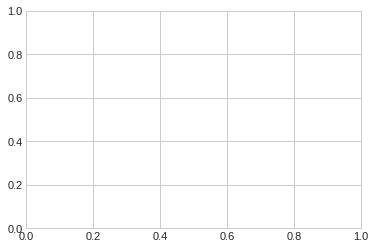

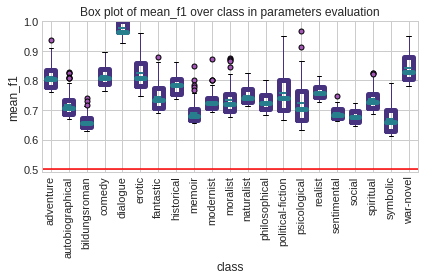

In [48]:
describe_data.boxplots(total_results_df.groupby(["class"]).head(100), "mean_f1", "class", wdir, "parameters evaluation", rotation = 90, figsize=(6,4), baseline=0.5, ylim=(0.49,1))


In [107]:
total_results_df.groupby("class").head(1)[["class","mean_f1","text_representation","MFW","feature_combination","classifier_name"]]["mean_f1"].median().round(2)

0.86

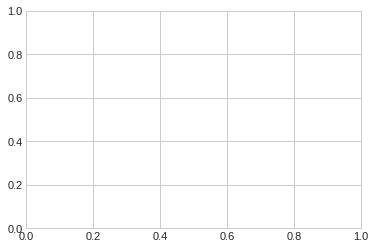

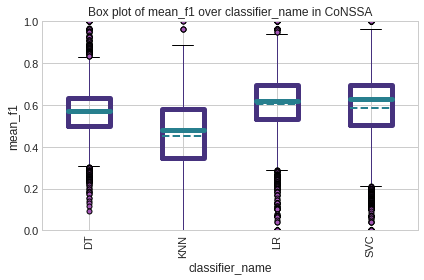

In [49]:
describe_data.boxplots(total_results_df, "mean_f1", "classifier_name", wdir, "CoNSSA", rotation = 90, figsize=[5,4])

In [50]:
total_results_df.groupby(["classifier_name"]).median().sort_values(by="mean_f1")["mean_f1"]

classifier_name
KNN    0.478
DT     0.573
LR     0.621
SVC    0.627
Name: mean_f1, dtype: float64

In [51]:
st_tests.test_differences_columns(total_results_df, "classifier_name", "mean_f1", equal_var=False).round(3).sort_values(by=["value1","value2"])

value1 value2  pvalue significance
0     DT    KNN     0.0          ***
1     DT     LR     0.0          ***
2     DT    SVC     0.0          ***
3    KNN     LR     0.0          ***
4    KNN    SVC     0.0          ***
5     LR    SVC     0.0          ***

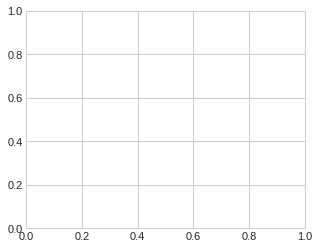

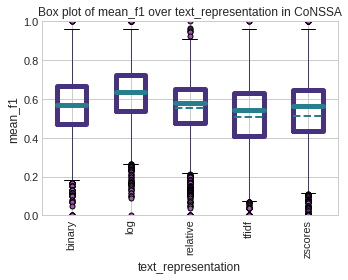

In [52]:
describe_data.boxplots(total_results_df, "mean_f1", "text_representation", wdir, "CoNSSA", rotation = 90, figsize=[5,4])

In [53]:
total_results_df.groupby(["text_representation"]).median().sort_values(by="mean_f1")["mean_f1"]

text_representation
tfidf       0.5430
zscores     0.5635
binary      0.5670
relative    0.5815
log         0.6350
Name: mean_f1, dtype: float64

In [54]:
st_tests.test_differences_columns(total_results_df, "text_representation", "mean_f1", equal_var=False).round(3).sort_values(by=["value1","value2"])

value1    value2  pvalue significance
0    binary       log   0.000          ***
1    binary  relative   0.034            *
2    binary     tfidf   0.000          ***
3    binary   zscores   0.000          ***
4       log  relative   0.000          ***
5       log     tfidf   0.000          ***
6       log   zscores   0.000          ***
7  relative     tfidf   0.000          ***
8  relative   zscores   0.000          ***
9     tfidf   zscores   0.139

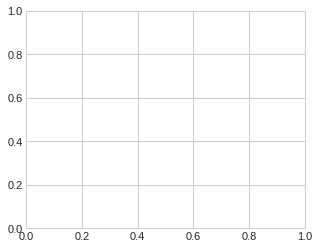

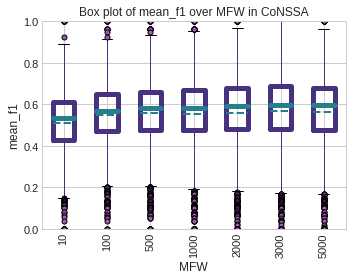

In [55]:
describe_data.boxplots(total_results_df, "mean_f1", "MFW", wdir, "CoNSSA", rotation = 90, figsize=[4,3])

In [56]:
total_results_df.groupby(["MFW"]).median().sort_values(by="mean_f1")["mean_f1"]

MFW
10      0.5320
100     0.5685
1000    0.5810
500     0.5830
2000    0.5925
3000    0.5960
5000    0.5960
Name: mean_f1, dtype: float64

In [57]:
st_tests.test_differences_columns(total_results_df, "MFW", "mean_f1", equal_var=False).round(3).sort_values(by=["value1","value2"])

value1  value2  pvalue significance
0       10     100   0.000          ***
1       10     500   0.000          ***
2       10    1000   0.000          ***
3       10    2000   0.000          ***
4       10    3000   0.000          ***
5       10    5000   0.000          ***
6      100     500   0.105             
7      100    1000   0.465             
8      100    2000   0.064             
9      100    3000   0.002           **
10     100    5000   0.015            *
11     500    1000   0.434             
12     500    2000   0.709             
13     500    3000   0.107             
14     500    5000   0.356             
15    1000    2000   0.281             
16    1000    3000   0.023            *
17    1000    5000   0.108             
18    2000    3000   0.255             
19    2000    5000   0.613             
20    3000    5000   0.526

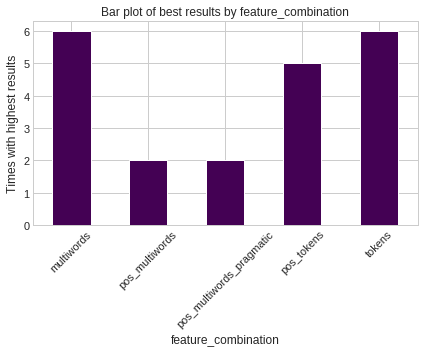

In [112]:
describe_data.grouped_bars(total_results_df.groupby("class").head(1), "feature_combination",wdir, "best results",rot=45, figsize=(6, 5), quantitative_axis_label="Times with highest results")

In [110]:
total_results_df.groupby("class").head(1)[["class","mean_f1","text_representation","MFW","feature_combination","classifier_name"]].sort_values(by="feature_combination")

class  mean_f1 text_representation   MFW  \
150          historical    0.864             zscores  5000   
331         sentimental    0.747             zscores  5000   
2298           symbolic    0.793                 log  2000   
212    autobiographical    0.830              binary  3000   
1076             memoir    0.849               tfidf  3000   
254       bildungsroman    0.740                 log  1000   
1720       psicological    0.967            relative  2000   
622              erotic    0.960                 log  3000   
222          naturalist    0.827                 log  5000   
122           fantastic    0.880                 log  5000   
1530      philosophical    0.802              binary  2000   
2059             social    0.725                 log  2000   
1240           moralist    0.876            relative  2000   
75               comedy    0.895              binary  5000   
1144          modernist    0.873             zscores  2000   
363           spiritual    0.826                 log  5000   
1818            realist    0.815                 log  2000   
14            adventure    0.938                 log  1000   
1576  political-fiction    0.950                 log  2000   
2436          war-novel    0.952            relative  1000   
528            dialogue    1.000             zscores    10   

           feature_combination classifier_name  
150                 multiwords              LR  
331                 multiwords             SVC  
2298                multiwords              LR  
212                 multiwords              DT  
1076                multiwords              DT  
254                 multiwords              LR  
1720            pos_multiwords              DT  
622             pos_multiwords              LR  
222   pos_multiwords_pragmatic              LR  
122   pos_multiwords_pragmatic              LR  
1530                pos_tokens              LR  
2059                pos_tokens             SVC  
1240                pos_tokens              DT  
75                  pos_tokens             SVC  
1144                pos_tokens              DT  
363                     tokens             SVC  
1818                    tokens              LR  
14                      tokens              LR  
1576                    tokens              DT  
2436                    tokens              DT  
528                     tokens              DT

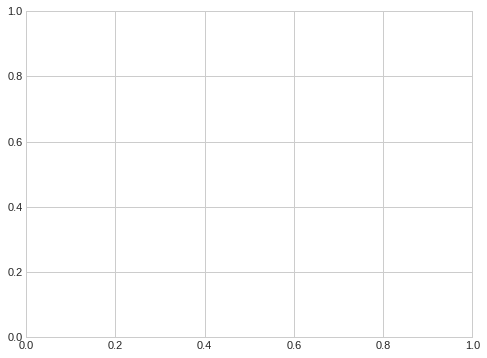

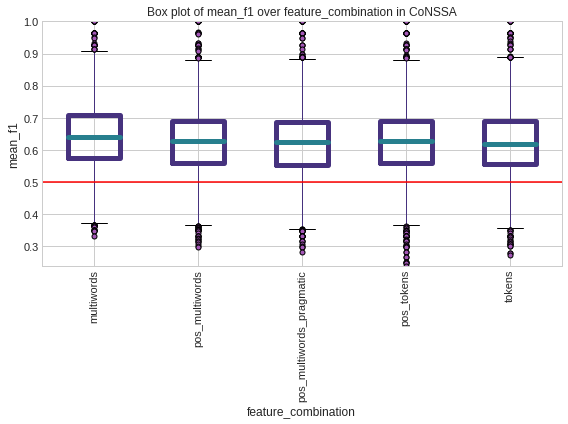

In [126]:
describe_data.boxplots(total_results_df.groupby(["class","feature_combination"]).head(100), "mean_f1", "feature_combination", wdir, "CoNSSA", rotation = 90, figsize=[8,6], baseline=0.5)

In [127]:
total_results_df.groupby(["class","feature_combination"]).head(100).groupby(["feature_combination"]).median().sort_values(by="mean_f1")["mean_f1"].round(3)

feature_combination
tokens                      0.617
pos_multiwords_pragmatic    0.624
pos_tokens                  0.626
pos_multiwords              0.627
multiwords                  0.641
Name: mean_f1, dtype: float64

In [37]:
st_tests.test_differences_columns(total_results_df, "feature_combination", "mean_f1", equal_var=False).round(3).sort_values(by="pvalue")

value1                    value2  pvalue significance
0                multiwords            pos_multiwords   0.000          ***
1                multiwords  pos_multiwords_pragmatic   0.000          ***
2                multiwords                pos_tokens   0.000          ***
3                multiwords                    tokens   0.000          ***
9                pos_tokens                    tokens   0.263             
7  pos_multiwords_pragmatic                pos_tokens   0.358             
6            pos_multiwords                    tokens   0.390             
4            pos_multiwords  pos_multiwords_pragmatic   0.509             
5            pos_multiwords                pos_tokens   0.801             
8  pos_multiwords_pragmatic                    tokens   0.837

In [38]:
total_results_df.groupby(["class","feature_combination"]).head(1).shape

(105, 18)

In [39]:
total_results_df.groupby(["class","feature_combination"]).head(100).groupby(["feature_combination"]).mean().sort_values(by="mean_f1")["mean_f1"]

feature_combination
pos_multiwords_pragmatic    0.621516
tokens                      0.621945
pos_tokens                  0.625311
pos_multiwords              0.626572
multiwords                  0.642584
Name: mean_f1, dtype: float64

In [42]:
st_tests.test_differences_columns(total_results_df.groupby(["class","feature_combination"]).head(50), "feature_combination", "mean_f1", equal_var=False).round(3).sort_values(by="pvalue")

value1                    value2  pvalue significance
0                multiwords            pos_multiwords   0.000          ***
1                multiwords  pos_multiwords_pragmatic   0.000          ***
2                multiwords                pos_tokens   0.000          ***
3                multiwords                    tokens   0.000          ***
7  pos_multiwords_pragmatic                pos_tokens   0.180             
8  pos_multiwords_pragmatic                    tokens   0.234             
4            pos_multiwords  pos_multiwords_pragmatic   0.252             
5            pos_multiwords                pos_tokens   0.841             
9                pos_tokens                    tokens   0.888             
6            pos_multiwords                    tokens   0.954

In [118]:
total_results_df.groupby(["class","feature_combination"]).head(100)

class  mean_f1  mean_rec  mean_prec  baseline  f1-baseline  \
528            dialogue    1.000      1.00      1.000       0.5        0.500   
483            dialogue    1.000      1.00      1.000       0.5        0.500   
576            dialogue    1.000      1.00      1.000       0.5        0.500   
528            dialogue    1.000      1.00      1.000       0.5        0.500   
531            dialogue    1.000      1.00      1.000       0.5        0.500   
483            dialogue    1.000      1.00      1.000       0.5        0.500   
480            dialogue    1.000      1.00      1.000       0.5        0.500   
528            dialogue    1.000      1.00      1.000       0.5        0.500   
508            dialogue    1.000      1.00      1.000       0.5        0.500   
486            dialogue    1.000      1.00      1.000       0.5        0.500   
486            dialogue    1.000      1.00      1.000       0.5        0.500   
486            dialogue    1.000      1.00      1.000       0.5        0.500   
486            dialogue    1.000      1.00      1.000       0.5        0.500   
536            dialogue    1.000      1.00      1.000       0.5        0.500   
491            dialogue    1.000      1.00      1.000       0.5        0.500   
563            dialogue    1.000      1.00      1.000       0.5        0.500   
536            dialogue    1.000      1.00      1.000       0.5        0.500   
490            dialogue    1.000      1.00      1.000       0.5        0.500   
584            dialogue    1.000      1.00      1.000       0.5        0.500   
540            dialogue    1.000      1.00      1.000       0.5        0.500   
495            dialogue    1.000      1.00      1.000       0.5        0.500   
495            dialogue    1.000      1.00      1.000       0.5        0.500   
494            dialogue    1.000      1.00      1.000       0.5        0.500   
495            dialogue    1.000      1.00      1.000       0.5        0.500   
588            dialogue    1.000      1.00      1.000       0.5        0.500   
499            dialogue    1.000      1.00      1.000       0.5        0.500   
571            dialogue    1.000      1.00      1.000       0.5        0.500   
499            dialogue    1.000      1.00      1.000       0.5        0.500   
497            dialogue    1.000      1.00      1.000       0.5        0.500   
544            dialogue    1.000      1.00      1.000       0.5        0.500   
...                 ...      ...       ...        ...       ...          ...   
1665  political-fiction    0.307      0.35      0.283       0.5       -0.193   
1640  political-fiction    0.307      0.45      0.233       0.5       -0.193   
1644  political-fiction    0.307      0.35      0.283       0.5       -0.193   
1601  political-fiction    0.307      0.35      0.283       0.5       -0.193   
1565  political-fiction    0.300      0.40      0.250       0.5       -0.200   
1589  political-fiction    0.300      0.35      0.300       0.5       -0.200   
1665  political-fiction    0.300      0.30      0.300       0.5       -0.200   
1576  political-fiction    0.300      0.35      0.300       0.5       -0.200   
1673  political-fiction    0.300      0.30      0.350       0.5       -0.200   
1630  political-fiction    0.300      0.35      0.300       0.5       -0.200   
264   political-fiction    0.300      0.40      0.250       0.5       -0.200   
271   political-fiction    0.300      0.30      0.300       0.5       -0.200   
1608  political-fiction    0.297      0.35      0.267       0.5       -0.203   
1564  political-fiction    0.297      0.35      0.267       0.5       -0.203   
1670  political-fiction    0.297      0.30      0.317       0.5       -0.203   
1648  political-fiction    0.297      0.35      0.267       0.5       -0.203   
1676  political-fiction    0.297      0.35      0.267       0.5       -0.203   
1609  political-fiction    0.283      0.35      0.250       0.5       -0.217   
1614  political-fi

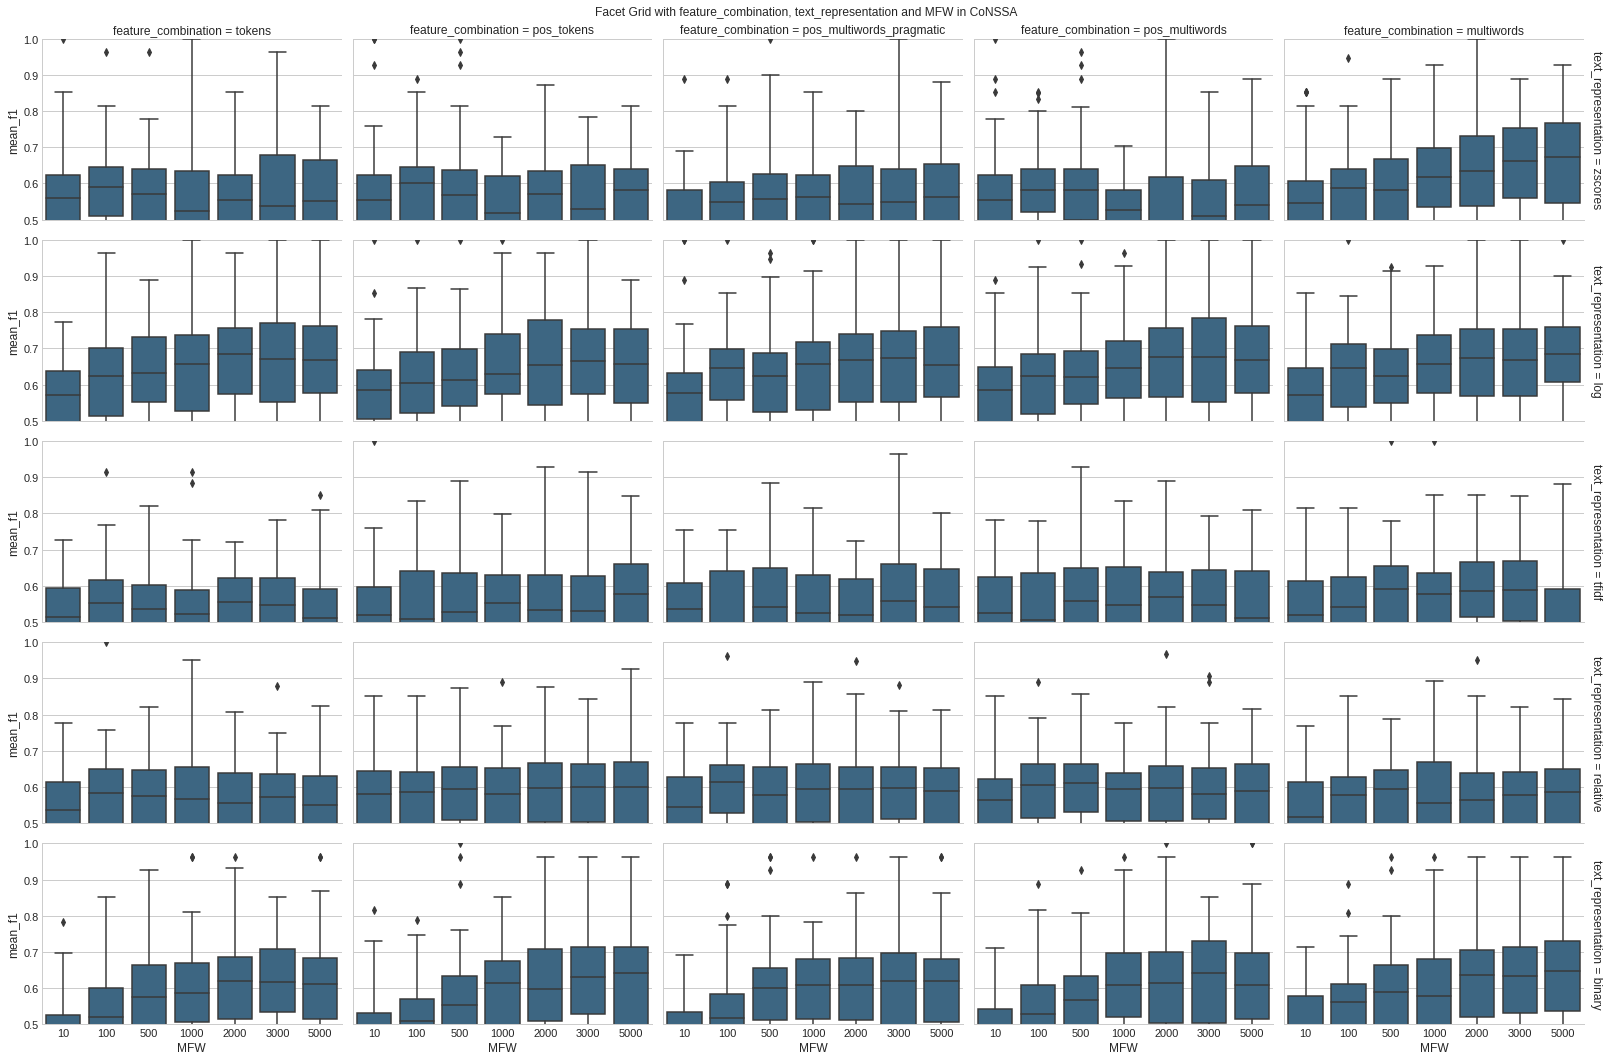

In [58]:
import seaborn as sns
describe_data.facetGrid(total_results_df,
                        "mean_f1", "feature_combination", "text_representation","MFW",
                        wdir, "CoNSSA", ylim = 0.5,
          type_=sns.boxplot)